### Objective 

To make a recommendation system that recommends at least five(5) new products based on the user's habits.

#### Context

Everyday a million products are being recommended to users based on popularity and other metrics on e-commerce websites. The most popular e-commerce website boosts average order value by 50%, increases revenues by 300%, and improves conversion. In addition to being a powerful tool for increasing revenues, product recommendations are so essential that customers now expect to see similar features on all other eCommerce sites.

#### Data Description -
Data columns- First three columns are userId, productId, and ratings and the fourth
column is timestamp. You can discard the timestamp column as in this case you may
not need to use it.

#### Source

Amazon Reviews data (http://jmcauley.ucsd.edu/data/amazon/) The
repository has several datasets. For this case study, we are using the Electronics
dataset.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
user_df_orig = pd.read_csv('Electronic_dataset.csv')

In [3]:
user_df = user_df_orig.drop('timestamp', axis =1) # dropping timestamp

In [4]:
user_df.head()

user_id     prod_id  ratings
0         A3L1GVWVJKWZZS  B0058UUR6E      5.0
1  A08831071BVKZMKNCPI5S  B009ID0VVS      5.0
2         A1SINU2I4IOPNU  B000GBO9IM      4.0
3         A3P3P31EEOX2BD  B00CDCIOHO      3.0
4         A3DBLJ3MPBJQMN  B000MS3VGA      5.0

In [5]:
# Rename columns
rec_df = user_df.rename(columns = {'user_id': 'User', 'prod_id': 'Product', 'ratings': 'Product Rating'}, inplace = False)

In [6]:
rec_df.head()

User     Product  Product Rating
0         A3L1GVWVJKWZZS  B0058UUR6E             5.0
1  A08831071BVKZMKNCPI5S  B009ID0VVS             5.0
2         A1SINU2I4IOPNU  B000GBO9IM             4.0
3         A3P3P31EEOX2BD  B00CDCIOHO             3.0
4         A3DBLJ3MPBJQMN  B000MS3VGA             5.0

In [7]:
rec_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   User            500000 non-null  object 
 1   Product         500000 non-null  object 
 2   Product Rating  500000 non-null  float64
dtypes: float64(1), object(2)
memory usage: 7.6+ MB


In [8]:
rec_df.nunique() # count of the Unique data values

User              448368
Product           130138
Product Rating         5
dtype: int64

In [9]:
rec_df = rec_df[rec_df['Product Rating'] != 0]

In [10]:
rec_df.drop_duplicates() # drop duplicate records

User     Product  Product Rating
0              A3L1GVWVJKWZZS  B0058UUR6E             5.0
1       A08831071BVKZMKNCPI5S  B009ID0VVS             5.0
2              A1SINU2I4IOPNU  B000GBO9IM             4.0
3              A3P3P31EEOX2BD  B00CDCIOHO             3.0
4              A3DBLJ3MPBJQMN  B000MS3VGA             5.0
...                       ...         ...             ...
499995          AT1DOX4N48TXJ  B000P3X7RK             2.0
499996         A224J6BHKCLMJM  B005CPGHAA             4.0
499997         A23WSQC26QEFLC  B006FLK1IE             5.0
499998          ARHZCDAH1UTPN  B006W5FHI2             5.0
499999          A9XU2MMIWGZBT  B001JJRBU8             4.0

[500000 rows x 3 columns]

In [11]:
rec_df[rec_df['Product'].str.isalnum()] # Identifying the discrepancies in Product code

User     Product  Product Rating
0              A3L1GVWVJKWZZS  B0058UUR6E             5.0
1       A08831071BVKZMKNCPI5S  B009ID0VVS             5.0
2              A1SINU2I4IOPNU  B000GBO9IM             4.0
3              A3P3P31EEOX2BD  B00CDCIOHO             3.0
4              A3DBLJ3MPBJQMN  B000MS3VGA             5.0
...                       ...         ...             ...
499995          AT1DOX4N48TXJ  B000P3X7RK             2.0
499996         A224J6BHKCLMJM  B005CPGHAA             4.0
499997         A23WSQC26QEFLC  B006FLK1IE             5.0
499998          ARHZCDAH1UTPN  B006W5FHI2             5.0
499999          A9XU2MMIWGZBT  B001JJRBU8             4.0

[500000 rows x 3 columns]

In [12]:
rec_df[~rec_df['Product'].str.get(0).isin(['B'])] # Analysing Product data
# there are 504 products which does not start with B

User     Product  Product Rating
2260    A29PY6JA6XATW8  9983891204             5.0
2976     AAE0R8ZINTPJH  140053271X             5.0
4798    A3OSEP52XHRBN0  8862935293             1.0
5823     AM37NBDS1QLCT  1400532655             5.0
6256     AOARGQDECYFJ8  0972683275             5.0
...                ...         ...             ...
496656  A2882GKKWYC8P5  5135000011             1.0
496898  A2UGCTTQKIVX9H  1400532655             3.0
497254  A20V25XPCUZFHH  140053271X             5.0
497913  A1GWA4DX7T4RWE  0970407998             5.0
499680  A16TB6KOY5OX79  8987029395             4.0

[504 rows x 3 columns]

In [13]:
rec_df[~rec_df['User'].str.get(0).isin(['A'])] # Analysing User data

Empty DataFrame
Columns: [User, Product, Product Rating]
Index: []

<AxesSubplot:xlabel='Product Rating', ylabel='count'>

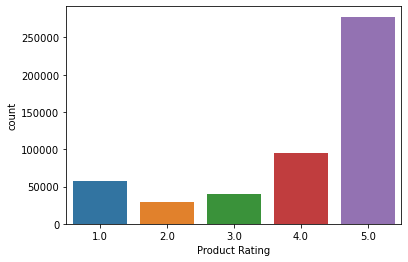

In [14]:
sns.countplot(x = 'Product Rating', data = rec_df, orient = 'h') # Count Plot of the Product Ratings

In [15]:
rec_df.shape

(500000, 3)

In [16]:
rec_df['Product Rating'].value_counts()

5.0    277826
4.0     95089
1.0     57452
3.0     40382
2.0     29251
Name: Product Rating, dtype: int64

In [17]:
rec_df.nunique()

User              448368
Product           130138
Product Rating         5
dtype: int64

In [18]:
# User ratings on Product
rec_df.groupby(['User'])['Product Rating'].mean().sort_values(ascending = False).head()

User
A1G7R0UD9JW9PK    5.0
A30YRZHUDGLEK0    5.0
A30YQBOZEHKFI4    5.0
A1JPRTW3MMXS31    5.0
A30YQKSXH97I1I    5.0
Name: Product Rating, dtype: float64

In [19]:
# Rating Count - User Wise
rec_df.groupby(['User'])['Product Rating'].count().sort_values(ascending = False).head()

User
A680RUE1FDO8B     36
A3OXHLG6DIBRW8    34
ADLVFFE4VBT8      30
A5JLAU2ARJ0BO     29
A2NOW4U7W3F7RI    28
Name: Product Rating, dtype: int64

In [20]:
# popular Product Ratings
rec_df.groupby(['Product'])['Product Rating'].mean().sort_values(ascending = False).head()

Product
BT008G3W52    5.0
B004AC52UC    5.0
B004AGJRMC    5.0
B004AGED3A    5.0
B004AFOK2U    5.0
Name: Product Rating, dtype: float64

In [21]:
# Rating Counts - Product wise
rec_df.groupby(['Product'])['Product Rating'].count().sort_values(ascending = False).head()

Product
B0074BW614    1138
B00DR0PDNE    1094
B007WTAJTO     883
B0019EHU8G     774
B006GWO5WK     770
Name: Product Rating, dtype: int64

In [22]:
prd_ratings = pd.DataFrame(rec_df.groupby(['Product'])['Product Rating'].mean().sort_values(ascending = False)) 

In [23]:
prd_ratings['rating_counts'] = rec_df.groupby(['Product'])['Product Rating'].count()

In [24]:
prd_ratings.head()

Product Rating  rating_counts
Product                                  
BT008G3W52             5.0              1
B004AC52UC             5.0              1
B004AGJRMC             5.0              1
B004AGED3A             5.0              1
B004AFOK2U             5.0              2

In [25]:
prd_ratings.shape

(130138, 2)

In [26]:
# sorting based on Product Rating and Rating Counts
# Popularity based Recommended models - Top 10
prd_ratings.sort_values(['Product Rating', 'rating_counts'], ascending = False).head(10)

Product Rating  rating_counts
Product                                  
B00C9TECFO             5.0             19
B002XN3OL4             5.0             17
B0045JCFLY             5.0             16
B004IZN3K2             5.0             16
B00212NO6W             5.0             16
B0015VW3BM             5.0             16
B003S68Q0Y             5.0             15
B001I3X3HU             5.0             15
B00EDIU5IW             5.0             15
B00ESYW40S             5.0             15

In [27]:
users = rec_df['User'].unique()
len(users)

448368

In [28]:
products = rec_df['Product'].unique()
len(products)

130138

In [29]:
counts1 = pd.DataFrame(rec_df['User'].value_counts())

In [30]:
counts1[counts1['User'] > 1]

User
A680RUE1FDO8B     36
A3OXHLG6DIBRW8    34
ADLVFFE4VBT8      30
A5JLAU2ARJ0BO     29
A2NOW4U7W3F7RI    28
...              ...
A167KPMW1NBZJW     2
A12WIG16XJ8Z28     2
A6HS7DVICCKDZ      2
A3KXN3XJ8CCLGK     2
A3RXO347H1BUZC     2

[37247 rows x 1 columns]

In [31]:
# Taking users who have rated more than 5 products
usr_ratings = rec_df[rec_df['User'].isin(counts1[counts1['User'] > 0].index)]

In [32]:
usr_ratings.shape

(500000, 3)

In [33]:
usr_ratings.head(10)

User     Product  Product Rating
0         A3L1GVWVJKWZZS  B0058UUR6E             5.0
1  A08831071BVKZMKNCPI5S  B009ID0VVS             5.0
2         A1SINU2I4IOPNU  B000GBO9IM             4.0
3         A3P3P31EEOX2BD  B00CDCIOHO             3.0
4         A3DBLJ3MPBJQMN  B000MS3VGA             5.0
5         A3DBD19DOV8NTS  B002TOJXIA             4.0
6         A2PIF6JQQYOGPG  B00007E7JU             4.0
7          A9QF7T2BLAU74  B00004T8N5             5.0
8         A2F4OUYS6G6LM0  B00D4FXFGO             1.0
9         A39Q0LE0OJ5PMF  B00269SXT8             5.0

In [34]:
#2 Transform data to surprise format
from surprise import Dataset,Reader
from surprise.model_selection import cross_validate
from surprise import SVD
from surprise import KNNWithMeans
from surprise import NormalPredictor
reader = Reader(rating_scale=(1, 5))

In [35]:
# The columns must correspond to user, Product and ratings (in that order).
data = Dataset.load_from_df(usr_ratings[['User', 'Product', 'Product Rating']], reader)

#data = Dataset.load_from_file('Electronic_dataset.csv', reader=reader)

# We can now use this dataset as we please, e.g. calling cross_validate
cross_validate(NormalPredictor(), data, cv=3)

{'test_rmse': array([1.76994117, 1.76431231, 1.76553777]),
 'test_mae': array([1.35991112, 1.35449251, 1.35330555]),
 'fit_time': (1.0638716220855713, 1.298236608505249, 1.292811632156372),
 'test_time': (2.898369789123535, 2.9447357654571533, 3.082012414932251)}

In [36]:
data.df.head()

User     Product  Product Rating
0         A3L1GVWVJKWZZS  B0058UUR6E             5.0
1  A08831071BVKZMKNCPI5S  B009ID0VVS             5.0
2         A1SINU2I4IOPNU  B000GBO9IM             4.0
3         A3P3P31EEOX2BD  B00CDCIOHO             3.0
4         A3DBLJ3MPBJQMN  B000MS3VGA             5.0

In [37]:
'''# Use user_based true/false to switch between user-based or item-based collaborative filtering
algo = KNNWithMeans(k=50, sim_options={'name': 'pearson_baseline', 'user_based': True})
algo.fit(trainset)'''

"# Use user_based true/false to switch between user-based or item-based collaborative filtering\nalgo = KNNWithMeans(k=50, sim_options={'name': 'pearson_baseline', 'user_based': True})\nalgo.fit(trainset)"

In [38]:
from surprise import accuracy
from surprise.model_selection import train_test_split
from collections import defaultdict
# sample random trainset and testset
# test set is made of 25% of the ratings.
trainset, testset = train_test_split(data, test_size=0.25, random_state = 45)

In [39]:
'''# Perform gridsearch on the SVD model to determine best parameters for the recommender
from surprise.model_selection import GridSearchCV
param_grid = {'n_factors': [100, 200], 
              'lr_all': [0.001, 0.005], 
              'reg_all' : [0.02, 0.05], 
              'n_epochs': [10, 20], 
              'init_std_dev': [0.05, 0.01, 0.005]}
grid_svd = GridSearchCV(SVD, param_grid, measures = ['rmse','mae'], cv=3)
grid_svd.fit(data)
print('Complete')
print(grid_svd.best_params['rmse'])'''

"# Perform gridsearch on the SVD model to determine best parameters for the recommender\nfrom surprise.model_selection import GridSearchCV\nparam_grid = {'n_factors': [100, 200], \n              'lr_all': [0.001, 0.005], \n              'reg_all' : [0.02, 0.05], \n              'n_epochs': [10, 20], \n              'init_std_dev': [0.05, 0.01, 0.005]}\ngrid_svd = GridSearchCV(SVD, param_grid, measures = ['rmse','mae'], cv=3)\ngrid_svd.fit(data)\nprint('Complete')\nprint(grid_svd.best_params['rmse'])"

In [40]:
'''from surprise import SVD,NormalPredictor
from surprise.model_selection import GridSearchCV
param_grid = {'n_factors':[10,20],'n_epochs':[10,20],  'lr_all':[0.005,0.01],'reg_all':[0.02,0.1]}
gs = GridSearchCV(SVD, param_grid, measures=['rmse'], cv=3)
gs.fit(data)
params = gs.best_params['rmse']
svdtuned = SVD(n_factors=params['n_factors'], n_epochs=params['n_epochs'],lr_all=params['lr_all'], reg_all=params['reg_all'])'''

"from surprise import SVD,NormalPredictor\nfrom surprise.model_selection import GridSearchCV\nparam_grid = {'n_factors':[10,20],'n_epochs':[10,20],  'lr_all':[0.005,0.01],'reg_all':[0.02,0.1]}\ngs = GridSearchCV(SVD, param_grid, measures=['rmse'], cv=3)\ngs.fit(data)\nparams = gs.best_params['rmse']\nsvdtuned = SVD(n_factors=params['n_factors'], n_epochs=params['n_epochs'],lr_all=params['lr_all'], reg_all=params['reg_all'])"

In [41]:
'''# KNN Model
algo = KNNBasic()
algo.fit(trainset)
# run the trained model against the testset
predictions = algo.test(testset)'''

'# KNN Model\nalgo = KNNBasic()\nalgo.fit(trainset)\n# run the trained model against the testset\npredictions = algo.test(testset)'

In [42]:
#predictions

In [43]:
trainset.ur

defaultdict(list,
            {0: [(0, 5.0)],
             1: [(1, 5.0)],
             2: [(2, 3.0)],
             3: [(3, 1.0)],
             4: [(4, 5.0)],
             5: [(5, 5.0)],
             6: [(6, 1.0)],
             7: [(7, 5.0)],
             8: [(8, 5.0)],
             9: [(9, 5.0)],
             10: [(10, 4.0)],
             11: [(11, 3.0)],
             12: [(12, 5.0)],
             13: [(13, 5.0)],
             14: [(14, 2.0)],
             15: [(15, 5.0), (26381, 5.0)],
             16: [(16, 5.0)],
             17: [(17, 1.0)],
             18: [(18, 5.0), (3410, 4.0)],
             19: [(19, 1.0)],
             20: [(20, 4.0)],
             21: [(21, 2.0), (1755, 5.0), (27066, 2.0)],
             22: [(22, 5.0)],
             23: [(23, 2.0)],
             24: [(24, 5.0)],
             25: [(25, 5.0)],
             26: [(26, 5.0)],
             27: [(27, 1.0)],
             28: [(28, 5.0)],
             29: [(29, 5.0)],
             30: [(30, 5.0)],
             31: [

In [44]:
algo = SVD()

# Train the algorithm on the trainset, and predict ratings for the testset
algo.fit(trainset)
predictions = algo.test(testset)

# display predictions
predictions

[Prediction(uid='A3I49F2C6UTOWJ', iid='B001VIF6L8', r_ui=5.0, est=4.014338666666666, details={'was_impossible': False}),
 Prediction(uid='A29QF5BOPDWR24', iid='B00BH1HI4W', r_ui=4.0, est=4.014338666666666, details={'was_impossible': False}),
 Prediction(uid='AQ54XIRX4T7GX', iid='B0038WFI40', r_ui=5.0, est=4.014338666666666, details={'was_impossible': False}),
 Prediction(uid='A1SLZJI44G7JB9', iid='B003ZSP0WW', r_ui=5.0, est=4.47754793061978, details={'was_impossible': False}),
 Prediction(uid='A1GAORSMSLAKAK', iid='B00A4I3AGE', r_ui=5.0, est=3.984487250808814, details={'was_impossible': False}),
 Prediction(uid='ACY17R3TABFGL', iid='B00DI2EDXC', r_ui=2.0, est=3.80232572160775, details={'was_impossible': False}),
 Prediction(uid='A2T89ASERB3BRD', iid='B0015V1H28', r_ui=1.0, est=3.791246450996202, details={'was_impossible': False}),
 Prediction(uid='A3BVCDVZKYNK9D', iid='B004FLL5BS', r_ui=5.0, est=3.883510964495534, details={'was_impossible': False}),
 Prediction(uid='A28JZSOL208CKH', ii

In [45]:
# get RMSE
print("User-based Model : Test Set")
accuracy.rmse(predictions, verbose=True)

User-based Model : Test Set
RMSE: 1.3399


1.3398659946124918

In [46]:
pred_df = pd.DataFrame(predictions)

In [47]:
def get_top_n(predictions, n=10):
    # First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

In [48]:
top_n = get_top_n(predictions, n=10)

In [49]:
top_n

defaultdict(list,
            {'A3I49F2C6UTOWJ': [('B001VIF6L8', 4.014338666666666)],
             'A29QF5BOPDWR24': [('B00BH1HI4W', 4.014338666666666)],
             'AQ54XIRX4T7GX': [('B0038WFI40', 4.014338666666666)],
             'A1SLZJI44G7JB9': [('B003ZSP0WW', 4.47754793061978)],
             'A1GAORSMSLAKAK': [('B00A4I3AGE', 3.984487250808814)],
             'ACY17R3TABFGL': [('B00DI2EDXC', 3.80232572160775)],
             'A2T89ASERB3BRD': [('B0015V1H28', 3.791246450996202)],
             'A3BVCDVZKYNK9D': [('B004FLL5BS', 3.883510964495534)],
             'A28JZSOL208CKH': [('B003VAHYNC', 4.424708079178268)],
             'A3NH1OYH7UX545': [('B00AH66948', 4.085398572529478)],
             'A1GHGLM4XSZVHN': [('B001EYV9TM', 4.509387590677547)],
             'A1EZ33502YUH6W': [('B003VS2RX6', 4.014338666666666)],
             'AK9I8GY4XV7K4': [('B001O4EPHA', 4.385724382505385)],
             'A2UP2UT3HQPDTJ': [('B007CE4H38', 4.081422550858761)],
             'A2GT39G026A3OD': [('B

In [50]:
len(top_n)

120696

In [51]:
# Print the recommended items for each user
for uid, user_ratings in top_n.items():
    print(uid, [iid for (iid, _) in user_ratings])

A3I49F2C6UTOWJ ['B001VIF6L8']
A29QF5BOPDWR24 ['B00BH1HI4W']
AQ54XIRX4T7GX ['B0038WFI40']
A1SLZJI44G7JB9 ['B003ZSP0WW']
A1GAORSMSLAKAK ['B00A4I3AGE']
ACY17R3TABFGL ['B00DI2EDXC']
A2T89ASERB3BRD ['B0015V1H28']
A3BVCDVZKYNK9D ['B004FLL5BS']
A28JZSOL208CKH ['B003VAHYNC']
A3NH1OYH7UX545 ['B00AH66948']
A1GHGLM4XSZVHN ['B001EYV9TM']
A1EZ33502YUH6W ['B003VS2RX6']
AK9I8GY4XV7K4 ['B001O4EPHA']
A2UP2UT3HQPDTJ ['B007CE4H38']
A2GT39G026A3OD ['B005B6O3LU']
A2O8IB4KMYW05Z ['B00FWZLMUU']
A1I99RGKPDWGP7 ['B001XURPR2']
AGX5QWDDC86H3 ['B005MHN6K2']
A2KTNDHADPRK8D ['B004SD1ZPY']
A3PON5HBQCZWC3 ['B003B5LB2C']
A2EB0HJGGMZO2Z ['B003ELYQGG']
A1VX82G224AUJM ['B0073HSH8U']
A319FKNR1MPEIU ['B004HCO4GI']
A26YLK5AX4DBCD ['B003O5I90G']
A2XD07QNW89ZZ3 ['B00BGA9WK2']
A27ZQ31GKQALWH ['B0011VJRMY']
A394R9L0EG1FR5 ['B001MQA8EE']
ABAYNL1S0DDDE ['B004NB0NNG']
AFCSI58THO4KW ['B005K21WBE']
AYGIMNCSXM1MG ['B005Y1CYSQ']
AQALXX79H3N4S ['B007EMOOK4']
AIPMILIN8IGX7 ['B003X0GCGU']
A16YX11R68WGLR ['B004W7DSG0']
A2598GE1CBQK1Z ['B0

A176I91EKBXT0S ['B00AWKC0JM']
A1UMAOS1XXKITA ['B0041HM3XA']
A10I6CVBTPABO8 ['B007M50PTM']
AGND98TS1KMQ4 ['B005DPURPA']
A2WTN70L6NOZXU ['B00196VHGU']
A1WEDVGJBC12FG ['B0073K64NM']
A1RHCZF59JL8UA ['B0015DYMVO']
A2VYW4LT0QVS86 ['B0037NX6JY']
A3UGKT0UPGYOTU ['B008NPANYC']
A589GE9NI2W6D ['B004S960AS']
A27YERDKCXI3I7 ['B00CSMYBFS']
A1LJXZC1RFW07C ['B00007E7JU', 'B001OJGS0M', 'B000TO1SMG']
A1GYV9FWP0HCE ['B0094R4Q6Y']
A3BK8CGG874LCH ['B00FDUHD2K']
A17IZYJHC7FV9W ['B001XW4SFC']
A792042NCE3LL ['B002VKBKD8']
A2Z9I24MN7671L ['B001V9LPT4']
A2VWH49CDMUJ61 ['B004SKBJUS']
A2GDTF5XZFVW2G ['B000069EUW']
A33VF9NWCYT8V4 ['B005P13INK']
A370QW49Y25BXL ['B00B3507Q8']
A2IB7S9NDTOIW5 ['B0000EI9VR']
A1OV5INAL7YGMZ ['B00814Z74G']
A3GC6XQ5W4RYG3 ['B00005ATMI']
AIYWNO0EC5ZJ ['B002BDTLWC']
A1ZOJHQESFHNUL ['B000E3DRZS']
A1UY70DPR5M4WT ['B00E7LVBCE']
AXJ8H00CT1TUF ['B00E3W15P0']
A1XELC22UCU22E ['B00B3R4W62']
A1G0N12PNJ1EMN ['B007RHNXL2']
A1I3CWZ5N07EL8 ['B00622AG6S']
A1WXXPWJJZTU23 ['B005T4HT24']
ACLPAGNF4CD3E ['B00

A1WTSDRMDG7QS5 ['B003I15AOE']
AHJ3Y5H9NAPAO ['B0024CV3SA']
A1H9MLMOD1FA9E ['B00FDXLM2Y']
A21SR9XXOS1XW9 ['B001QWX6RA', 'B00009WQS1']
A2R7BNAINGNNJO ['B008U25LI6']
ANOROH99NBJ8F ['B000A5TAT2']
A3LCXW0V3LBBRS ['B00726185Q']
A3CBBQQXA7VV6J ['B0009YJXMS', 'B0055P3KOI']
A1JD1NCQQ6M0O5 ['B003IPC22S']
AFOHY59UKWKY2 ['B00153EYTO']
AGZ4PL9TA9VF4 ['B003110OEW']
A3GPWAE297RB4D ['B00005ARK4']
A3SIHI2STAMEDF ['B00IKMHR3S']
A2FWVPQW4MCU3N ['B00005A777']
A1DO51T5I1HQ8U ['B007P4YAPK']
A3E4AXY6XXRN1E ['B0014HYD8S']
A1U2LBFBO1Y7IH ['B00BZBZZVW']
AYU1GV7AIQ5YY ['B002TU59FA']
AW3WCO628OHY ['B002AQDRYI']
A3L7HVGU8YIHYH ['B0041NFIBS']
A2OC1TOWRIUMET ['B00G9DDRCU']
A13338II6ATR04 ['B00G4JZ2T0']
A1T9MG5OU1QJV5 ['B005OFFH5Y']
A3V6HW8K8Z7DJ2 ['B000NM8DI6']
A3CEPNOOCR8IJL ['B00607JNIM']
A2NM5CG338BZRW ['B007D6UT7I']
A8KTXP1QWKZAK ['B0087NB53S']
A3HZM5ABB6XULG ['B0065FIU60']
A27B7NWCYVFAM2 ['B0052D3890']
A35PVYLHAYZ2AF ['B009USAJCC']
ANZHPMJLXBU9T ['B00009R996']
A3DQECW1PRP52C ['B00006HYP6']
AP3R1ULX5ZKOA ['B004O

A2TEOOTSGE0KQD ['B0037D51FQ']
A21IKD8DF475KX ['B000HWPUO2']
A3LXX9R7A8AKQW ['B0007QKXYU']
A1GYDSUVQE0K7G ['B00DR0PDNE']
A1Y6BT3ACYH30E ['B0002CPBWI']
A341A99NTSZE70 ['B002MTU5C0']
A2VUE8N13EP7YM ['B005LX15LO']
A1HYQIE1KIU6XO ['B008CS5QTW']
A3S9AQ781Y44TR ['B0040PCGQW']
A39PMV0NI7J8LK ['B0089ZV1WY']
A2BL4Q7G7J499K ['B003T0UX1E']
A2DT8GQZOFSUW1 ['B009IBXECS']
A38NLXAI3FCTZR ['B007RT2QZO']
A3KS4TC99FLN8T ['B0096YOQQA']
A232MCSLYS9FGF ['B005CT56F8']
A48USR3LHR9B7 ['B004X8AKDM']
A2OYCQPXNXPVZ ['B005CX68VU']
A20DDH4NT6Q1E8 ['B0096T7TQE']
A1ZUP8TPX8Q4VN ['B000050FH8']
A1X7M7CEM8D9KI ['B001CIREXA']
A3EUKMVCCVB6V4 ['B0016XIQ1U']
A2L0RH7T28YNU1 ['B004FLR4Q8']
A2YF2O9848I5OG ['B006K5LBA2']
AVFOYVLCIJ7WE ['B008KVUAGU']
A2XSJPF5Q7MKKH ['B008XTURU8']
A2PKE1OLQN8T6Q ['B009O7YORK']
A34FW5MOK3ZERN ['B001U3Y8QI']
A2YHINOIGX54ZR ['B001EYU6NC']
A1M5RQXH1CBZOI ['B00CPV9YOU']
A18E9REVL6H3IJ ['B0024R4B5C', 'B004U8ZDRI']
A1UP913T0AOJN ['B007SZ0E1K']
A2F4HP0J5VNOYR ['B0009YWCT4', 'B000PDQLF0']
A2MP1SXOBLPQMQ [

A23WQ65DJ4572A ['B00000J3NF']
A3UT8Y72H6NYX2 ['B000I98ZQY']
AO4E08K4X4AAQ ['B006GWO5WK']
AEBUI8X7034T1 ['B009NHAEXE']
A2XEOPZ0SK7TZB ['B00004X0ZL']
A3SHCNIL23YZ2I ['B006P88VSE']
AFI1OCQJL300N ['B004HHICKC', 'B00A3YN0Z0']
A29HH4LNAUBAM4 ['B0014CIBWC']
A7EJ0EDUOL0EQ ['B00004VX3T']
A2ENFY2X6JKBIQ ['B0074BW614']
A2P40KRI61PEPN ['B00021Z8UO']
A3JP75RZO7TVHN ['B008QW167U']
A2Q5R0X5IY3SBW ['B00622AG6S']
A2VC9CVEP6M5NA ['B00CBKT03A']
A24ADVM3W74P9Q ['B005U0M9B8']
A15VP2R2UVOM2D ['B004M8RWDO', 'B001RQ2YF0']
A1KLNVKSLVB9OF ['B005G89KI4']
A39H8B6CTVS93P ['B003CVOK28']
A3LH5HDCOO7JJ6 ['B001202514']
A36W6EQBKVLBKE ['B0026RCFZ8']
AB1GI1WH57CDU ['B00432WCIY']
A14SPDU3UYJLO8 ['B007B5WHTE']
A26663BT237HXV ['B002GHBSRO']
A3D31W5XADXKYQ ['B004I5BUSO']
A1Y4Y239S1GER ['B00ALSZNLW']
A1WIT1U6J4G9G7 ['B004L35FCK']
A3UT5K29LOYU4E ['B000NU6NHQ']
AP7TGS8TOV47J ['B003U8EKG4']
A3IKK7YHS391W9 ['B00945RAQY']
A1P2NY75K2HL4Y ['B003SGCO3E']
A2HP7N88NR7ZX2 ['B0038JED8K']
A30E6T14TTR01S ['B000KU5CN0']
A3LNYX4U0UMVQF ['B0

A3AJRP8Z7XLFKG ['B008C8LWYA']
A2ZBCBD0R8S72V ['B004HO58SO', 'B002RWJD7A']
AWMVVCB50HCGX ['B0033QQBZQ']
A2IAHAIQUC4U6D ['B007K80TGU']
A2C22GB4PGE8PS ['B005P9YW32']
A3UJUN1GK4FXA1 ['B000Q8UAWY']
A3S4VZXXFIS6WO ['B008VLOBCI']
A2H2FOIWINDBSN ['B0081K3M5G']
A37V7THU7DX93E ['B001A833JQ']
A2CTYWQBH9I2HE ['B0062GM0P4']
A14G3E0AJMK2SD ['B00EAK9Q3I']
A2NC6CRBG03H67 ['B0074FGLUM']
A3BNDARY5B0CAG ['B009D9KOQY']
A2DOOYMQE8POSS ['B008LURQ76']
A2DTNEOB7TM92B ['B0012Y2LLE']
AJJTW89HZW2YW ['B003KE1NX6']
A13C6V5VBNWG4P ['B002SXMRL2']
A30DJUHQUDUOK ['B001VICPCG']
A3NEUMJ8FPR623 ['B004B8GF7Y']
A1QLIUCBO0TPZC ['B005H9KVG2']
A1NX3QKK5077TY ['B001G7PIDA']
A2TSVFIJOKHZ2N ['B00378KMF0']
A1HBB2YG5XB4D ['B00BWF5U0M']
A3JMHHSUWVIE2V ['B003LPUWT0']
AEDOIEFJWZX9N ['B00DD8DPSA']
A1P8Y1R7WFM2MT ['B000XB9GOW']
A32UNDABGM0TWY ['B0009WPSEC']
A1DREMWTFJVOGP ['B003VZJ0E8']
A1ZHWL4L8NEPOW ['B001AO4MWW']
A39ANGL5T77E0B ['B002R9CQYK']
A34LHET0M5R7OR ['B005FE8VSE', 'B0031RGGGG']
A1J61M90NQX6KC ['B0018QQDII']
A205T6UTC9X0OP ['

A2ID6V85GJCWR8 ['B00AFCV552']
AUKLLB4J4YHNA ['B0014IYZDK']
A281JDXY1QQGIF ['B00AHMO8G8']
A2VVPVI9BGYM7L ['B002ODG5GO']
AU451HWPU8A85 ['B0036RP7RU']
A9P4Q7KX35RS2 ['B000VX6XL6']
ABU3X10MMYI4I ['B005GTNZUM']
A1VZ6HHFV8UWYW ['B007SXJ13E']
A1SNGHHZP373EX ['B0006PRMJG']
A2KFLH3V1MJRVI ['B00AAIPT76']
A1M7OW9D6ROP41 ['B004N6259G']
A204OC6ZO20UFE ['B005CLPP8E']
AQKLDVACJC82M ['B00CI3BISU']
A19YVHM4XQ7UUS ['B004TPJKEY']
A1PDH84ADXJAP0 ['B005DIBHA6']
A1L766POGSCXO0 ['B0055QYKQO']
A3RQ6IYXY3LL55 ['B004V6BQ3O']
AQGQTFELFXSHR ['B000VVVMQY']
A14T5AIQA3PTVK ['B003ZX8AZQ']
A20OJ6JLC1CN1E ['B00DW4LIBQ', 'B0073YHEZU', 'B00CTKS97K']
AUH6MQ4L8QSLN ['B002TTPC4Y']
A1FFAGBY0Y2RTT ['B005CLPP8E']
AGEFI7ZZ6SP1Q ['B0002ZH6Z0']
A279TRVQIZ4TYI ['B0064RY5PO']
A1KWTE0YZX1QZ8 ['B00FAVIB3W']
AB82IK0ANKU2C ['B005H3Q57M']
A2AXSGBW6G3URI ['B00AU0HMGA']
A152D7QKL1DUFC ['B002SGKATA']
A1LH6RF4UN9VI6 ['B000JTMJDS']
A3ESR9HVUOMJ1Z ['B00CF5OHZ2']
ARY4C44Q1724F ['B003BKW2K2']
A3IYX9TJTCWMPX ['B00AWKC0EC']
A15FJK8DLSOK9I ['B002P

A1MVFQJAFOR4SR ['B00006I5WJ']
A1S66P66WJ0WT7 ['B006G1OHE2']
A2P7FG40FI2H4Q ['B009EOJKEU']
A1D4GAE74D445O ['B0010383XM']
A116BVYAUQNOG ['B00032AVN6']
A1S0ZA61SPGDGH ['B002MYQTEI']
AARA6Y6F78JCN ['B004UETB20']
A224MVET1N6RTH ['B00CO07C5U']
A2NHUJAZARLNKC ['B006GM57MC']
A1ZAEC2FNP758G ['B00HRO37UC']
A27LJANV0Z7GAY ['B00141CTNK']
A116WPXNYDQEP8 ['B001Q6DQT4']
A1S7QXDX1KFZOV ['B002ONCC98']
AXDOFQ5A491D6 ['B004G6002M']
A3G4TP25D6EXAE ['B004EVPYD4']
A13R5DZ9UXOEM3 ['B00AJHDZSI', 'B00AZMLIWW']
A2AVQKTJCOA7DX ['B005HY4UPK']
ATWZ4YU3ZDTAV ['B000M2TAN4']
A1FSMTUCATYLJW ['B0035JKJ2W']
A388TEAIKLR39A ['B001B0APOO']
A2KLG9WYZVTD1W ['B0007WDIWI']
A2XLVEMQ0YYXPV ['B006P2SZ6S']
A1QJL6PWV0WHAM ['B008OCF8BM']
A2EJBYSVMV603L ['B004M8SU30']
A3MLWT9KEWUG17 ['B002YU83YO']
AQZAL93IK0GR ['B001DUQTYC']
A16ZFBX7GLT9DL ['B00009R6WK']
ABGLIPAFIMZT0 ['B002S53LJ2']
A2IFQYWZQK7N8T ['B004B8GF7Y']
A15VTN0PAT2J9H ['B001IOHAVO']
A1FJCSE3KW2DSE ['B00E1XI5ZO']
AZ32JKG0VO5LB ['B005VONPT8']
A2B90WWGOS138W ['B002Q5NKYK']
A1QU

A2OY8W2PWWOSS5 ['B0097BEDOC']
A37PQ64S07OPFR ['B001QTXKCE']
A36JBDEI2WY3V2 ['B003KLYDD6']
A2XIHWSLKBVW48 ['B00317CQVK']
A1C7EOGVGK7VGR ['B008C4JA66']
AL04WVPWUK6YP ['B000WEHJHG']
A3POPZNKBBFLXR ['B0090C7A3O']
A3DURKUAGHLAJZ ['B009NHWVIA']
AT05P6I0OU3KL ['B005CWIVYI']
A31WFHW9G4VC2E ['B00BCGRTFK']
A1WJ7C3XHJ11WP ['B000HGQJZW']
ASL2847HN15DY ['B0098Y77OG', 'B00CZZ4TLE']
A12ED04MWNBPJD ['B004UGJLT6']
AD9PP66X2ARKU ['B00I9K3ZQ4']
A1NBQP4JLWR1DK ['B001UDVUNW']
A27406OZJAVIV0 ['B00B7HLB1C']
A25I9VXBVB1EBG ['B00GXRM11A']
A1WA6G3WWLKU9P ['B004JRNY4O']
A3R5E99D4NSZTP ['B00D3Y475O']
A2P0497BEAE0EY ['B004V9F61O']
A1BW3A76VDL8R2 ['B004L4RHFC']
A37IBDBJO3MDY0 ['B000E9WBF4']
AL32QJ1U3XCWG ['B005455PW4']
A256NZRCDNI848 ['B000QUUFRW']
A1JN4QQ07L2UAC ['B00823RNUC']
A38U70P7G17CF8 ['B003VJ9RP6']
A2WE8AOK767TI9 ['B009BVK1YO']
AZYQUJGXX6FV7 ['B001E1Y5O6']
A33MYHNWYEAGTS ['B006LW0W5Y']
A39WALMR3G46FU ['B001EHNG36', 'B008BFXOZE']
A1U58P5EBZFM7H ['B006JRI61I']
A2CEZ563Y0UWYS ['B00EVVGAC6']
A1EBHMLZUZSP8Z ['B

A1OZIL8P43X3A ['B0012Y2LLE']
A1EXY1GZSJXJSR ['B007F7N11Q']
A1JHGW9I4CA0TR ['B007F9XHAY']
A1U63ZC7RU9EQF ['B008UNSPO2']
AWQ20N9GPMA2U ['B004D9TGG8']
A1A6JPYCPDL17K ['B0013FRNKG']
A1A023Y1F6G9VC ['B00HNHCQIM']
A17US0Z91UXNNO ['B001RHQFYU']
A1F05MLUF2O524 ['B000I5PGOM']
A9FPJTBII15O9 ['B001FFYVQS']
A1JQ3JIFX8ET56 ['B005L38VPC']
A9BNPPEXLHTLX ['B000FBK3QK']
A2S77WSROQMBLP ['B009AJBWJA']
A29D8WBJ973WJR ['B0038W0K20']
ANWRZBZEDI0N6 ['B004GV0JPA']
A32FJR9BXP7AFI ['B007BJHETS']
A3FWKUU3DHEGU8 ['B00434WQVU']
AJB4F7Z3H2TJ7 ['B009W98CXM']
AT5BZDRVCC8CL ['B002VPE1WK']
A3DYJ6KRKILV06 ['B00844N5OC']
A2EHUCXDXM8A0O ['B003CYKYVQ']
A18TDFODALWKVM ['B001ELK2NY']
A16MQW1E5XDD5I ['B0023FTRUO']
A13U9CR841ORHS ['B00F2ENU92']
A1XFX5GZIECFY0 ['B0000DIJYQ']
A1BOSH8QTZBZ9B ['B004E9SVD6']
A3W59IMC0C2E2I ['B002BZXAFE']
A2JHAMDY4H8HH4 ['B00GTGETFG']
AE9ZPX6BDW803 ['B000JDKFXK']
ANC36RGFR9HU4 ['B005IGP736']
A1ASWDAEDTTY5I ['B004PX8ERY']
A19AES1P5OJ6I7 ['B002HWRN9U']
A1KBUFT1HC1W6B ['B003ZUXVR6']
A23PBBDOVSZFZ ['B00

AN9RQT73ACFEP ['B00707I6TI']
A1GCY31TISCUS8 ['B005PCOKEK']
A124VTVOFROO6M ['B00449NU3W', 'B0050CNVXG']
A6YR854121VPX ['B000IALOX4']
A137K8KUJ8DNCV ['B007NCWL0K']
A2Q9BWDOAR7DC3 ['B001V6PVY2']
A1G777HWKK06MN ['B00568BV68']
A21HP5H5VFNWUJ ['B005SCYFPQ']
A18WSLWAXUZC1Q ['B0058NN6CS']
A2G7YC89EHUP2G ['B0019EHU8G', 'B007136A1M']
A3DRCXHKMS0GED ['B00BY3XOSW']
A3UBFAVZYYMOAH ['B00499Z25G']
A30T49R72ZS8P7 ['B009AEPJ8U']
AEP2J3QI2WNGZ ['B0035P2ISY']
A1JFNZ4UAMEZN3 ['B001QTXKEM']
A2LJLY9TK2W8HN ['B0089E5R0W']
A1RMXZPU5KJT4R ['B002TZUOC8']
AT43U3RHAP6QX ['B003LVZO8S']
A194D0XS8WA2EW ['B002S0O7KO']
A14TPBBWA8OR69 ['B00168LWPW']
A2T1MN3GGEZUQC ['B00164822W']
A1U6NB4WILLRPB ['B002MONKZE']
A2X5S8UZOMM1UF ['B00C8ORVZI']
A2MPSIV972T4FS ['B0073FE1F0']
A2GLFAI1LVPNQE ['B001CJOLBW']
A2S1GS8C4TZTRR ['B007ZW43IQ']
A2HL6I3GU3ELGQ ['B009UKZV0A']
A20N75LTM72UB8 ['B008OKW5FG']
ARRD8L6KB56BX ['B001J8V7CW']
A1T7TXUEVBIKF3 ['B007P4VOWC']
A1A2VXX90FYSB4 ['B00BUCLVZU']
A10FNVHQMEN0KW ['B003118250']
A2C12XZ66K7DD5 ['

A3M2LFMQILL3V5 ['B00609WXCS']
A4WZFQZS2M6DR ['B0059PDNP0']
A2FHFT5KM7XZUE ['B001QD3OOE']
A21WJO2CLQVC71 ['B004CGHDEO']
A394HRV80ROLDB ['B0000CEPDF']
A2Q5HZR704B6CA ['B00G7PPM1Y']
A32KLN2X749ZAL ['B004Y6BIYI']
A1TXTEF8RDBO19 ['B0074FGNDC']
A3RM5FW3BOEDOG ['B000G7WZQY']
A21Q142B5OAWO1 ['B0041PO18W']
A3SDCD9RREF2E ['B001E2KAOO']
AKZDKPEMJCV8B ['B001D9IWIY']
A11JGI7J7F3KJ0 ['B003VOW5WI']
A3MQW84NCLOUXJ ['B003HKE6H8']
AJPO57SXIJ6DE ['B0007LFU9I']
A1BN36SAWCLCIK ['B00J585ORC']
A3MJO9KYLRRYVF ['B007WTAJTO']
A2GWVYF9IDRE2Y ['B004A2VEX6']
A35DNQMZE0JA7Y ['B00310PJM0']
A3SPQ2ZRX6FO7Y ['B005B28DOM']
A1OT7X7PBO5N23 ['B000812QC6']
A5QGYYRLRFLD3 ['B0000XMV7C']
A2ZZEGKPFRLO2K ['B00GUF9V5Y']
A1B4BVEACWRDCJ ['B005ZFFG5O']
A1FUI58UVC4N26 ['B002WCOZUU']
A28XLV8BP8DN4H ['B00511PS3C']
A2DTIW6RST3LC ['B0052YFYFK']
A1HLJ3D1M851X4 ['B0038JE07O']
A1B7VIQNHATB67 ['B003BKW2K2']
A1CILWJAU9Y1EF ['B003U8K66W']
A27CS1MF3DR3V4 ['B001VAAJ5E']
ATLX5DR6S1H7L ['B001AW8W7A']
A19M6142WHDGBT ['B00B3507Q8']
AIU93YMNWEKI7 ['B

A1I4IA38MBRQ26 ['B00DWMPM92']
A22IY6LS98C5J0 ['B003IEZBLS']
A19XMHRB3G4DIR ['B004XC6GJ0', 'B001UVEZFE', 'B000KBHTG2', 'B001DWI1F0']
A1SLV33WDWXA27 ['B005DIBHA6']
A3F4ZFQWVJ09I3 ['B002MRMCKU']
A2KJYDOODOIKJ6 ['B00AAKLE4G']
A4U6KXZVSVN3 ['B003IS6JYM']
A2XXV8291EITLW ['B00CF0TJXC']
A33BY3PTPPX4OQ ['B008L1OCF4']
A2NTBYP1E9YTEM ['B0007ZGXO0']
AKF71R9EL0UVQ ['B006L404KU']
A1M2G8QEP7N6RT ['B001G7J0F2']
A2ZU3N5DJPNHDH ['B003UU88O2']
A35VPIBSFO4Q9X ['B009OBCAW2']
A6K28EW0WQTNY ['B00EYW9DSU']
A1MYZVGEWJIVH1 ['B005DSPLDA']
A3104XYWGE2R99 ['B00A8OWALU']
A2ORVI812C7PWW ['B00DUGJQD8']
AZAJAVD2KRWYN ['B001ENW61I']
A2XWLDNOEUQ8N6 ['B000I6N6M0']
A3C90XWDHV0AFJ ['B00E055H5O']
AUFBYQZ4B4YQ0 ['B000051WW9']
A35CRDUAD634VT ['B00H7PWRU2']
ARWYA4F5002T5 ['B003U8CRGY']
A1N9BJ6SOFFYBE ['B005DM9BGE']
ASSM595Q2MUDF ['B00746W3HG']
A1HUSDC28D0Z93 ['B000NLSGA2']
A1CUDWGX03Z2J ['B004TA6Y8O', 'B0037NX6JY']
A2CU3ET7TQ9RHH ['B004J3Y9U6']
A2TOUTL6Z74SMQ ['B00763WTXA']
A1LNS3E8NGP312 ['B0038YWLCA']
A30SRTIE2MXZGY ['B00CID

A1J0WC8PUFR9B2 ['B007G95FJE']
A2IWWL4XDEJWL4 ['B003LHISR6']
A17W0GMB0YY83M ['B0043T7FXE', 'B00004Z5D1']
A234DOKJ6S7OEJ ['B000S5Q9CA']
A3GJK6P7HQSZVU ['B007VTVKW0', 'B0092SXCUG']
A3O2WKIHUX25IL ['B00009V332']
A17C0GMHB68WKP ['B006GWO5WK']
A1E6MI2887OYB0 ['B009FUF6DM']
APSIW7GHEWMR3 ['B00028DM96']
A6WRPTC5EKCFM ['B00DVH265G']
AOL3GQV1OFP39 ['B005TCMW7S', 'B005J7YA4G']
A1B3DXQBRWUQM5 ['B004S7Q8CA']
A12I67KLB5FB8W ['B0001YGIB0']
A2Q7UT55A0WB8X ['B000ESLD2M']
A3CW2RZLC9KNMG ['B00B1928FE']
A324XHWZ9EU0T4 ['B002YE7YI6']
A11N6KYPQPIZT6 ['B005KDY756']
AOSTE5VX334DR ['B00466ZAOA']
A3F1U12VWU6T5E ['B000N7VQDK']
A3706V5TBU30XA ['B00EYV8Z9Y']
A3LREIM3Z45FE9 ['B007R5YDYA']
A25QQ9L54F6GIA ['B003FSTAGY']
A2HPQMGYC866D9 ['B006FILNV6']
A174UFFQQ3JEI9 ['B004UL34EY']
A1O43BZZCTFISM ['B003BWAKJA']
ASAHLR56VUIPI ['B008LCYIEI']
A2HN0Z2DWXWKY6 ['B00B7N997O']
A105QLLZK7Y7Z3 ['B000UP840S']
A1TRBVUSP3499T ['B002HZW6EY']
A09161912RX2TJ6FKAD5M ['B000JWNYPC']
AO9KZ2D5EH0N4 ['B005KQ0S8S']
A2N042G1AGRUVQ ['B0041A3JR6

A14W4IGIBGA6T7 ['B00007EDM8']
A28HQOK1JYI4EE ['B002L6HEA0']
AEPQCH9WH0TRT ['B002JCSV5I']
A3SK2TSCGFEGOI ['B000HWNGX4']
A7BUPURWP7AB0 ['B0073Q37QS']
AVU9A35EUAXI6 ['B003KH9BF0']
A2TS3NBWL89GK0 ['B0044LRVEY']
A3KLJUOYOTLZX7 ['B008NPADYM']
A39C7CB82SL7EX ['B0007L8BT4']
A28RNWZNJRDX36 ['B000EPLP3C']
A2KK3PL7HAYD9N ['B00CO1I29O']
A352VPHNXJOGF1 ['B0012M1JL4']
A30BS9TY3LAXVW ['B004RDWVUS']
A3BBXXNHDPY3Z ['B0007NIJBC']
A20JWPEUI288TW ['B007Y8N19S']
AS044PKHK39UW ['B00DR0PDNE']
A3W1PR1Z7DF12R ['B002P56BO2']
A17IDP1IQFROTT ['B00DQGIIM2']
AFW4GBEONBGQ2 ['B004PA8706']
AQ92RAJ2JU88K ['B00757DT04']
A2YLUISJFAY01A ['B004TM1JBE']
A14H45P131MLSQ ['B001LK8P14']
A1V1KN3T2IXCH3 ['B002MIS8V6']
A2JAS2CYGSCRGV ['B000EUGX7A']
A351QGZ5S8PTBL ['B007ZHXFJY']
A118F5KR491JCA ['B00A3VFIM6']
A2WWZAKU82F0WK ['B002SQK2F2']
A1B6RHQU5MGXDZ ['B004N627KS']
A39WB79DE1XFFF ['B002GYVZ2A']
A21YZ0THW55G97 ['B0007M0VWS']
A1N2UUGKB6LXXI ['B0009YDP7W']
AYKDXAQ7QXQAN ['B00140DBRY']
A1053FVPAZUKMF ['B0050MM40C']
A2WEPY79GT7HJ3 ['B

A2WML5QB6GAKH5 ['B00A7BGMSQ']
A189KYHJ0C36AG ['B0015EY5RE']
ANVB3VLJKYTQM ['B005LLS3Q6']
AENBN02O6LC08 ['B0095QDUPM']
AIQ19JWTDE9UJ ['B003YOD286']
A2IV8YSB7F3OGA ['B0036R76R4']
A152419GA05GXU ['B002FFZGCU']
A134GEVVYMG41J ['B004RJJMBI']
A1ATXQNJ4FU6DC ['B002XJZXM6']
A1LWZZOKMO0GFO ['B000R94QMM']
A3UZLBFV9DHLN ['B001FA1O0O']
A1697OPHCPUXIH ['B003VRN22W']
A3U6G8VDXEO7VR ['B0096T97OG']
A3N5IU47P97LH ['B0035JKJ2W']
A3A38DCYFW58ZE ['B00IBS5RZ6']
A1SYSRIS5558OL ['B000IXNEI4']
A3R2Q3BVLWTQFM ['B001N2CNW2']
A17Y88U2X280KW ['B00DIL234Y']
A3AKMKIKLVQRKC ['B008714LJ0']
AYN74CMMXV78Z ['B00019068G']
ATGLA1LDUYNWD ['B001NIL0AW']
A1QI09LV067P29 ['B008VGN75U']
A2BVM1B80SYLQO ['B004VCVTPI']
A23FMG0F70HL14 ['B001DDWAAQ']
A3H7T17NKA0N7L ['B002TLTGM6']
A3EGV153LB7BTE ['B00009R6TA']
AMOXREQFUZU1A ['B000OFWJO6', 'B00009ZWC8']
ACOUTNZ835YFD ['B00A9LHLQ6']
A1EYF2RGA0Q7IP ['B0048IATQ0']
A2NAWJ6H6TF6TR ['B00005115S']
AOMFLU8QDOTMR ['B0023FTRUO']
A374POWERPF1X3 ['B000B8JGYM']
A339NQAZJJYXJO ['B00819XT7I']
A1H91O

A1XSMEXCJFEKPX ['B004WNGI1Q']
AW877O4UJKN3C ['B003UU88O2']
A2VC48WIMY6L6E ['B0063705PE', 'B00570UQIO', 'B001C1UEBQ', 'B00HWMKHIY']
A1GWIONPEVAOOC ['B00518M77U']
A2Z2ZBO6A3FKF2 ['B000BJUJSS']
A1DT77ELN0A716 ['B001C1U7AE']
A3PMFLNDR2U4C9 ['B00005QXWI']
A20D6SLO0YQZEB ['B005FJ7OF0']
A2MKLJSG7IG796 ['B000WYVBR0']
AX0LBOG3SJMOX ['B003VJ05L6', 'B005E0CMQQ']
A35GXVG0G7RSAT ['B006P4QZ1S']
A3I9FNQYZ3AYR2 ['B001W26SGA']
AYL3CH1Y1DOB8 ['B001VNQ0M2']
A13M9XSQ4O6NLY ['B00AJHDZSI']
A1MN103ENJ3DPJ ['B007GJR7GS']
A37QKFJHPLU8K0 ['B003DZ1684']
A18S2VGUH9SCV5 ['B00318CG5U', 'B0054JE706', 'B008ULPD0S', 'B00064C53K', 'B006RG0QC8']
A2DWUP2CYA4XRJ ['B0009RH7E6']
A2TP1GFEXQA48Y ['B0051PGX2I']
A2SWIU0U2BDHYC ['B00ECKG706']
A244PJWK8UHBE ['B0032FOKNS']
AAV4JWFTWVEIN ['B001158BFE']
A2RKLKP4PQFZDL ['B002VKR050']
A1FKH87QX647VY ['B005B28DOM']
A2LTROP5QS02N9 ['B007IEF4OS']
A3KVK37YBUS26T ['B00007IFED']
AK4RTNBXPJJVJ ['B00FL7LLZA']
A12F0GXX00TUO9 ['B001UHMVC2']
A90KV8C7CRB6Z ['B003LPTAYI']
A2A3TD1B8P4UZ3 ['B001FA1O

ARWKXFSG5DAFK ['B000JE7GPY']
A14HX90M4VJNC0 ['B007JIBAVE']
A6K6N2LXDS32B ['1400532655']
A392GN6UVWHA4P ['B003VWY0VY']
A1AHEF5EXA51VX ['B001FA1O18']
A3C8BFKRGW0SH6 ['B000LP4RNK']
A245O9IWAFUKJX ['B003B2GTY0']
A3QLLPAH9FAI7Q ['B000A4AVQO']
A30IS2G5D0L689 ['B002R5UK9W']
A2J2C86S2NR089 ['B005JY7V40']
AVEZ9WYQI502J ['B007KEZMX4']
A2DB0XATL3QL9M ['B007IMPMW4']
AW2LMZOO4QIQP ['B00ASLSQHK']
A2AH7NQY11RX1O ['B000OEP3F4']
A3VDENMGJ96Q41 ['B001YQ9T8I']
A1KBVIS8QAB64C ['B0051BG48U']
A3GS01NR1GPDLZ ['B00B7E1D7W']
AVF72WV1L2YXY ['B00H1YPYLS']
A2BXUQWWZATG4I ['B003SGCO3E']
A3RXD7Z44T9DHW ['B005DKZTMG']
A176GQYKBWFKWO ['B001FWYXD2']
AZ0TR32C8SD9E ['B00728ZBA2']
AWEN1OBUUKL8W ['B007A9UUJK']
A31KX5T82PXPEU ['B001EUG3II']
AZLCGG7LGTIS2 ['B000PEOETO']
AAVB498HNJ6RT ['B000E6G9RI']
A4AMQGZ3DLFD ['B00DR0B7Y8']
A2L68RI5TWFJ1D ['B006GLBH0E']
A15UDYZDCT1KOF ['B008UY5WL0']
A1D3GNK14RK25Q ['B0016L6VOG']
A1PL1Z14AMQGNY ['B005QBK63Y']
AUFIYPA76WENY ['B002RM08RE']
A113QMS7MS9FZ2 ['B001GD3Z02']
A2F70GPJ7BOFQF ['B005Y

A3AH88R6P4LVR4 ['B007BY3PBO']
A2VZRE4BYKQ412 ['B000GBGPAW']
A2WSAHN7WDC726 ['B0001FTVEK']
A2MXH0YK7IEQB8 ['B006MGPIVC']
AVTZKO5691FGA ['B002SOZ5RY']
A1ALI8SIOE6PLO ['B005N6ICXS']
A2NKEF6FQ8KOO5 ['B00093IIRA']
A3PP8N0PBRS34E ['B001KB21KA']
A39L4TAVVP2OP9 ['B007ZMOGXS']
A2J126B1MJ4MFU ['B004ISSZ84']
A5T161R3QQ7J4 ['B003HGBL1Q']
A3A3F5N7NZCVMT ['B00CR3O4C8', 'B00CXK70EO']
A1BI48XT5Y7PUM ['B00FFZ9DX0']
ASS04V0TG93WL ['B00ASLSQHK']
A3786O16LY485H ['B00366KE3I']
ASRVQFQ0PDVIV ['B000VWOKRG']
A1WAZKDIBNXOWD ['B004IB0SI6']
A1YCIS5K31VLRI ['B004MFBH7O']
AWG70YSZTEYZ4 ['B001TOD3KU']
ABN0QX1DUK0M8 ['B0072XQI2W']
ASEJPSH8UMJWT ['B005APQFPY']
A1O9JMLGKST6T6 ['B00DNJ8XAO']
AVNMIP9X2OBHS ['B002OEBO6E']
A27P7AZFY79PG5 ['B0097C57GO']
AKBCJ2J6KA4K7 ['B0074BW614']
A1BXNCHCCACXV5 ['B0029SHKBS']
A265XQA8HYK9XP ['B0057OCDQS']
A1HBI0CVZY177C ['B007EKXBUA']
A279GJNDQCSFB ['B0015EWMX8']
A2Z80K0L0IE9TF ['B000L4D42Q']
A3F1RW8JJ8D60O ['B001KN8V2U']
AEE9BUUZ7MS0C ['B0007WTF34']
A3TKA8JV45TTN9 ['B0052YFYFK']
A3HCM83

AWVTY3OBV3RZW ['B002I01T28']
A3GBXDRZSJIW58 ['B001DPNQ7K']
AIA1O11V3TDWW ['B000EZV3T8']
A1JDDNYP1083T8 ['B00DNIIE4A']
A22YQA0ILCKRDH ['B001SER460', 'B00427MIOI']
A1RTBRNP2TRTJX ['B004GCJEZU']
A2IDFBG8KAT97R ['B00HIT8PVC']
AX9S6BOLN75I0 ['B00213QEHC']
A1A7SIO8MOYHNH ['B001AZP6O4']
A31EVMK1YGYS57 ['B004OL06IW']
A2QYN7GBLK07PR ['B003VY4M42']
A2527Y0PIVGPO9 ['B002R9CQYK']
A2UD61VLLB9XAW ['B0019EHU8G']
A3OHV1J3JGC56O ['B000XQHBEE', 'B009F1DT80', 'B009V52440', 'B000OEII06', 'B00AKT96GU']
A3TW0R6BJ5T6XW ['B004ZDFVLQ', 'B004H1N2JO']
A124ZGKQNTK3UE ['B003MT1T92']
A3FYJAFHTXVFWL ['B004TQQYGK']
A202USTEYLS11D ['B000FHRQ7I']
ATFE1SCZ4JWMY ['B003UNHHC8']
AGUWRXFBL7X33 ['B002BH3I9U']
A39659549738ST ['B0034ZZ4UY']
A2E0NKGYZVAWB5 ['B004XC6GJ0']
A392A5IF16ZGIJ ['B004N85YAQ']
A1Y5JPJFQ4Q64X ['B0090C7A3O']
AO2X2F3M5PWCU ['B0011NVMO8']
A33L2J9OER7O6L ['B000MUP69I']
A1ASEZSAJBL10W ['B008DZIHEK']
AX3GWKHTWUZI6 ['B008QZTJH6']
A1KQY7ZWEY0VOZ ['B005K22JSO']
AT22KAU67HMTS ['B006R2N8VS']
A2L733JCM38E3X ['B006ZA8

A2BB4U7LEJW6P1 ['B0032ANC8M']
AOAUCQZHADZUA ['B00BGA9WK2']
A1T7OOJMM1ZIAY ['B000LXZYKW']
AVLOOXD5OJZ7M ['B009B0MZ8U']
A1XOL0IC4BQQ6Y ['B004FA8NOQ']
A1EVTOGG5BLVI0 ['B000RECQOM']
A1F4TWJ53N4WXL ['B003IBB9CG']
A1BZIM4WGZ6DZP ['B005GJC01C']
A141RCAZDRZHAA ['B008PPV2PO', 'B0045VSNAY']
A1PPXJB5K1GZ0H ['B0091F8F7A']
A2V9ATQDND0SUX ['B002FMLJ3S']
A31LO3AFI3XHXA ['B004NP1E9E']
A39EKIN6O2GBZG ['B003RAE19Q']
AB73NON2FR00E ['B009YPS9Y6']
A30H2QCY66IL5W ['B00ASE6SJ0']
A39E4C255FN8AP ['B00413PEYE']
AARA8N72MJMEF ['B000FONSEQ']
A1HR54DMWZP0II ['B00D826PU6']
A19KDIJXIVGLPV ['B008HO9DK4']
A2LUDI2PC7A9FZ ['B001MEDXU2']
A216R96XC95WUI ['B001DT2FD2']
A2X4FWK6MDB929 ['B00478O0JI']
AVDS6YFIFG986 ['B005JGJ8V2']
A1RSMKD7UBUC9S ['B001TH7GUU', 'B003IN0M2W']
A1JOJ6Z8WCC7FR ['B005DIBHA6']
AB9PPFQFTULH5 ['B007A2MLR6']
A2T3EGXEHX6P7N ['B007740FNY']
A1IU2K394XAF3N ['B0091QUJR8']
A1JQDPS7NRJ5C9 ['B000C46OCC']
A29P7I5HLTSOM4 ['B00INNP5VU']
AAYEDVIQC8T1E ['B004U5TS90']
A2V12SIX60ZK1S ['B004SBI2MU']
A3JUQPXKXI42FU ['B0

A3NI92URG2CHGR ['B002GNLUHQ']
A1CV10C05WHRF2 ['B00BGGDVOO']
A3RVAOB3A94JAZ ['B00006B7D8']
AF7G9O788IGDD ['B0047XRVWQ']
A1ZO42UR6FXJMC ['B001CPHGF4']
A1EF2WVPSV7S20 ['B00356SEMM']
ASEC4L1EP6TJ6 ['B00CJ74S0K']
A15FSJDDFRFA0M ['B00EQAXRRS']
A2GEW5G8942LH3 ['B0080YBH8M']
A1AOR91PHFEAVL ['B004APQP6Y']
AWYOK26FG5GME ['B0041FV0B8']
A2F6WZ6REJB5SY ['B009OLHG30', 'B009SKNWM6']
A3BO3HIDI4QMK2 ['B001C4UYBI']
A38QGVOTI0A3Z8 ['B000RMPNYO']
ALLW08KZFRXWA ['B005GTNZUM']
AN2OFSJL7IF0V ['B004LQ1BWK']
A381F2SFB1EIF5 ['B001S14DYO']
A34WAVLXL59YWW ['B0006I09OS']
A3UWL5GXSVOQ41 ['B001DHPEBY']
A3HQLVPDKNFJAO ['B004Y3WHSM']
A1OIREO3OCLPYN ['B00BWTLZ5C']
A1VJWG0MMLXXIJ ['B0084J6XZ0']
A1UKUJEBJ5P78M ['B00AQPHKDY']
A2YBS4XD66UL28 ['B004GZNPHA', 'B002Y557UM']
A2C4PPM013NHEK ['B002BDUAEK']
A3DISB2YO1K2GN ['B0009P8BLQ']
A6FXKBN81EQGF ['B000NMFCIA']
A2SGGYFOPTSU75 ['B004YDUZ22']
A1LFXANQMMNXSU ['B00ESYSBQ4']
A14O0BENBHDUN9 ['B00EZ3SPCI']
A3JMQ7NFSO7MO1 ['B008PC7OYA']
A14WWXIRIQU1FI ['B009T61DX4']
A2FTZ62DHLVS6W ['B

A3R7R5D17J3V54 ['B008AJNF78']
AB39UO500J4EP ['B0098NTF8S']
A3LU9380H72E7Z ['B002HZW6WQ']
A1TKZDIY0PIBFY ['B00AHBKW2S']
A38HB8QLI5MFJW ['B0058V2126']
AZ7TG2M07ELZ5 ['B00HFPW114']
AB97OMPI4V0ZX ['B00C2HQWWE']
A15F0OCG98S7Q3 ['B008JGR9MO']
A380WAZCHQZL4B ['B0012Z9OOU']
A2UWWOLZEPNPYF ['B005EIGUD4']
A1ONEMDMGVAT1J ['B005DOKIYG']
A2TD561XHM540M ['B004B4AXO4']
AS8BA1GK3CSLA ['B002Y0TTHY']
A1UQ89MA7G8EZY ['B0054K8W9W']
A3HKSO4N30GTSW ['B003XM9774']
A3EUPWFOPVL813 ['B008VP254K']
A27M18RREZO0PO ['B001TH7GSW', 'B004D4917W']
A14S6DTJLFT57O ['B008AY9XE2']
A2AX892Y5MWFE8 ['B000VEP3XO']
A1WURJF3NIMU1O ['B00FEE7B1I']
A23C7D30S53PPD ['B008THP1DM']
A17E3TCJYTA80A ['B003ES5ZUU', 'B003FO4UHW']
A1XFNQLYRZGA8A ['B00HZWVJUQ']
A1DRR9J75VW690 ['B004KA8Y4U']
A1QRO5MHAN03DL ['B00A1D3W6A']
A183LDIAWLF1YW ['B003UE52ME']
APLT28ZKQ91FN ['B000O5N5AI']
A35JMUHFDKPGAS ['B006KITAFM']
AMD28YLASLEMM ['B00ATSL7LE']
AR3FO9YY2IQUV ['B0001FV364']
AFH55LDONYBZ1 ['B0002IP2TY']
A15XI2BEGGFEOW ['B005X64MN2']
A3RYGF0B7WW44I ['B00

A16PGSJYWU13QN ['B003DMH938']
A3QGP941J4HY4K ['B003GAN10W']
AQNE8LWGJRISC ['B006OCBW1Y']
A1HKUCINZO0V2Q ['B004QKM5MG']
A1VIHMMCIVPQB7 ['B0019EHU8G']
A2WEBD5MPWD4CC ['B00EARTNKM']
A1WTWWU7XA5RZY ['B000I1ZWRC']
AJSNE61711SG0 ['B005C31HC0']
A35MNKA0VFZSW1 ['B002YAOS7A']
A27H0T39U3FZB5 ['B004RSCL4E', 'B0032ANCIW']
A43XSDXC7GVS4 ['B0019EHU8G']
A33N8CALJVUZAG ['B009AQTOP2']
A1VSSNTWJFWYIM ['B000JFGAUU']
A1MMFSW19AM019 ['B004NBZ976']
A1SRWVS5MZBG0A ['B009613MVS']
A2A4EXPZHLL574 ['B006QOWHEG']
A2K5AJK0ZAWNUE ['B006FLOMD4']
A1PMT00DF5IIQQ ['B002Q0WMB2']
A2140WYVQDXP7K ['B005WYJ8AM']
A1EE4PMEYPD796 ['B000NJH592']
AC2IWMCGG70MD ['B00EZ9XLC6']
A15TY1G19YQ1F9 ['B000SZAKNY']
A2865XS51T7JPS ['B000F7VKL6']
A37S9ZDASU0DNG ['B00005MEN6']
A3LGXTJZUCUC8N ['B00H427LKY']
A3B0GT3NV52V6K ['B0007WTHLY']
A26VLEQXMES86D ['B007YXA5SI']
A2K9U2Q139LJ6H ['B002BU0DPE']
A35WWA5IBR36DW ['B00DR0PDNE']
A1U3ZUMV0IB1AM ['B00006I5O1']
AXX108UOWY67N ['B001RHVS8I']
A1E8INW9XE7HEQ ['B001BEV1H0']
A2O5FDWL0H1BDO ['B0067TDU3W']
A

A3JFT823XR6UG5 ['B004U4WYLU']
A2YISIKMSZAYAZ ['B000PCVF3E']
A2WHCUBAJNC2GZ ['B007X6FCWA']
A2KQCLC883XIBX ['B001196MG0']
AHBFW9GEAJNPN ['B002L6HDTW']
A25D8SZUIVXQ21 ['B005C3CURQ']
A2R2C92RUFU6ZG ['B0001IXUEE']
A3AVKAPX0BVZTX ['B0002DQUHC']
A2L4SC79RIUDBE ['B003ZSHKIO']
A3CZVHWCZACLM ['B00144KS6W']
A1ISUUSJK56TY1 ['B00305N48C']
A1G4HOHX1Z1UMP ['B002HKFYDY', 'B004HO58OI']
A2YZLFXHLVWLDO ['B004YI9NTS']
A27Q30L6I315S1 ['B009AEPJ8U']
A3N9UJQOQEK5YE ['B0002SQ0AE']
A3P19UMDJQT9MK ['B004N85YEW']
AVT15PHGNL77M ['B002TUC64W']
A2J9J2XQMSG4WL ['B002E9HHYM']
A1WXA9WW9BI9C ['B00763WNAO']
A2YTD4ISC5MS4S ['B00CBQGRW6']
A2NKKVYI4MIO4I ['B0053OLY9O']
A3RH1LNELQLBNA ['B004I5BUSO']
A7YA6O2IAQG06 ['B00CRQUKQ4']
A2IP72H6CSJD4X ['B007IMPMW4']
AKYEMP7YQJOD ['B006HNFYAK']
A28B0HAIDP6I7J ['B008MPVUK4']
A1A2N1ZGS1FF09 ['B000FOKELQ']
A1MG49XLP3A3ML ['B001BBS76Q']
A2PG8LBL42U9OE ['B0018O9JIG']
A3LEP2SGOA1KYM ['B003ISY34U']
AD3IJ557T5UPL ['B009LM3SFM']
A4YB5HZJR3P3E ['B00GTGETFG']
A2IUIOFOUUGA7E ['B007ZUDOKG']
A1DB7

A62CMP1X02SDD ['B001V9LPT4']
A1ERLE48TJWUCA ['B00A9CN7H2']
A1JZOM7DK8FYFA ['B0030MEJ8Y']
A5JAMD8FSM9FL ['B00005MIS8']
A3BZYBZ2Y6UW8M ['B000UBSY48']
A2Y86O52Z1HB8G ['B00316263Y']
AVVZ7D293EEQI ['B003ZX1ZG2']
AGR1XCW5B3U1G ['B000CHTHDC']
A1IQBRS5VNP4KF ['B007P4VOWC']
A3FDUEY2EW08XL ['B003ZBZ64Q']
A3EGH6OR3R2YYB ['B001JT12GM']
A1F3SGSS5DOSVN ['B0036AWR8E']
A1JVOG0G4DQ69I ['B004ZVX5GG']
AB3DB9Q6YYTW8 ['B00CIWIXMU']
A16LGNL4EM3WOG ['B0054JJ0QW']
A2IKQUPA4FM5EF ['B000FQ245I']
A3R2IKZO5HIQJD ['B005FM8UL4']
A2RN59TEZP9U3W ['B00004Z7F0']
A2DLH8L024FPJ3 ['B005FXYJZY']
A2TA40MV2H4O6F ['B009UW7IVS']
A3STFS6HN32C3W ['B0035PBHX6']
A2JEX1Z84ELM0X ['B0084OIY0M']
A32QVT8ZCYNI1S ['B007B6YPAM']
AJ0795B670NLO ['B005HMKKH4']
A8PAN2K244H3H ['B003ATKHW4']
A20PRNHOYP9LCU ['B00AQRUW4Q']
A2IXV91B2P56AT ['B002XVUTPK']
A15UUNXNVOGJZY ['B0012QN3AA']
A2LWSQUTU1NASB ['B00H4WDVTY']
A22UC5KPE64DJ3 ['B003DZ167K']
A2YTW168NZ490 ['B0040IUI46']
A3NYN8HCA5DFOT ['B004GK0GKO']
A2WT6HYW5CXFH5 ['B002RM08RE']
AFEHVEQKUHY0G ['B0

A2FGDOH100YECN ['B0006TTDF8']
A1EO9ZRK6W9GHQ ['B00EZ9XKCM']
A1GJB6FZPG441V ['B005KBB79C']
A3RWXR8YDSZYLE ['B0002TPX74']
A35HRXB9797C5U ['B008PO5CSI']
A2K3D7X2RJV33Y ['B00DR0PDNE']
A3Q4TYJVAM4IRM ['B00009R6WU', 'B002WE4HE2']
A2VVB85M8K13ZS ['B009SYZ8OC']
A1UZQ092HVDPBD ['B002614IEK']
A1FENL1SU5L9DE ['B003GSLDSQ']
A1E6OI28UR1TMD ['B00ASBC6NU']
A19UFC03LAZB6N ['B0041PTB9G']
A19PVJMQ4369J5 ['B00KFBWJSU']
A2ZTLS1MU6DOH8 ['B00GQDBZUY']
AJP89EY0JBXZ9 ['B004FVMKV2']
A391B1Y9R2GPHY ['B00BGA9WK2']
ALYDGS66ICYT7 ['B00007AKDL']
A3KW5Y0HHGP2Y4 ['B0040ICGWI']
A3LH910GHKYGG4 ['B000N99BBC']
AZWLYBOGZNKA9 ['B003ES61EE']
A13T8830VGRE4A ['B000F2JUOK']
A2T11DSGGT83ZP ['B002Y3139I']
A2RZBZHLB5EE01 ['B003YMHJDC', 'B000LU8N1M']
A3HODN6ZOUN24G ['B0036WS4D4']
A306ZY2NWF4ZW9 ['B00HZ26X34']
A21RJ74JLAZN5V ['B00966IOT8']
A3QLZVC7VDLY5C ['B00358RJGW']
A1UGT0LD7WNHIT ['B000RQSGYO']
A20INQDBAJG3TT ['B0042BVSF4']
A3UIRYWLO4B10O ['B00AVIPNAS']
A1WKQ94M45D8MG ['B009YQ8BTI', 'B003VNKKTE']
A20H453K3T2W6I ['B004X28I0A']
A

A2FRC5MQHYUQ3 ['B0002MPMAE']
A3RD2215FZGC59 ['B006VFQ74G']
A3RS2ZSK75NHJ9 ['B0036ZE6V0']
A3V3JVJ9NJYBBI ['B00004ZB57', 'B0054I53PU']
A3EI816PADT6A6 ['B003Z65VF0']
A13QC6XMIAB5KW ['B000JE7GPY']
A2GX9FLWYKCDI ['B0006JI3CC']
A3FVVPHEWW48ZS ['B001JICZKK']
A3597VJK03XZCK ['B00ER5MXTA']
A2RLA7DPO1RQDE ['B000EFIJVI']
AIH4K3KUIO3CB ['B002VGWFF4']
A2BZ16RKE13PKV ['B005HEUUEA', 'B00005NIMJ', 'B00ARB5FLQ']
A3JTAUXHZQN092 ['B0007LJHVA']
A36WTM8U7O40OU ['B00001P4ZR']
ALYTT4QJSFV5F ['B004RDWVUS']
A1BEDLCKJ0O5ZR ['B00011CS30']
A282BOXCNEDK6E ['B004NY9UV4']
A3D8TA0RQGLAU1 ['B0002OIZJC']
ATCT4BLPH8JDM ['B0038W0K2K']
A3SOGYU4P2Y25H ['B003LBNBOM']
ABYO704I30D2V ['B005U2VAW0']
A348XFP870Q4O6 ['B001EK5NXO']
A21P0QVUV94FZK ['B00622AG6S']
A3NJ6BKPP7IUQ9 ['B0004HPV58']
A1G8BEWV2FRSRJ ['B000XO2S9Y']
A30YXB3UBGROMK ['B002DPUUKK']
A2OYRL3ZWNR6UN ['B006CV0AA6']
A276O7YTSFFQB2 ['B0094IRV88']
A2DTM00SRZTP8R ['B005DJ2G46']
A219DOXFZUDT3 ['B000OE02G4']
A37DL7JS774LGD ['B003P0PWGE']
A1J2EW4MGJI54T ['B003SNJ4TE']
A39YG

A3BKQY4K8ZOA1R ['B007M58WWO']
A3E230C3J213HK ['B0097BEF1S']
A15N61AWG1HY30 ['B00COUW0GG']
A54EO6A2RI2VT ['B007Y8N19S']
A1AH87XRKUG3O5 ['B001CCISSQ']
A3U5X10080KAOD ['B00DI3W4NW']
A28AHI180H69GK ['B001762LE4', 'B003GIJTR8', 'B0039ORBLK']
A2L1XJIXXK2HOU ['B004HX5OFW']
AZKENMUO37EP9 ['B000CKVOOY']
APPQ8Q7TXL4OY ['B00006B9H6']
A34DQINHT6NYJU ['B004HKJTT2', 'B005NFG1MS']
A30ENTNLFCLU7T ['B009NHAEXE']
A2NG0XAXWYHXTZ ['B00981YEBS']
A2YT80TQJDB59M ['B008HBUC7A']
A20AXZ39CROU8A ['B008FRPE9M', 'B001VSR9SG']
ATBZLN8157BTZ ['B00744R5G2']
A2G2A7VY8D0LJ5 ['B00FL9ECK4']
A1BJ1XNDEIMHIT ['B00CC5GSP2']
A3TDUHEBFJ53NM ['B000OGX5AM']
AAOSZS5LZW893 ['B00DE0EPCM']
AVWLYIY0TBQWE ['B00A5QUOIC', 'B00CD8ADKO']
A2STPVYGJTYO3D ['B0007MWE28']
A386VAHJ69OLA4 ['B008VOGZPQ']
A1X4N97RQU37XL ['B003ZC91VO']
A31XTX18V7Z4KE ['B0011UK35K']
AWQY7V6872WNY ['B003YNRWQA']
A1YTJ0K17ONGZ ['B000N53TDM']
A2MA60XDJI4DHG ['B00A39PPCG']
A1D5U9KM69MA0G ['B00KHKUBLQ']
AW451LB4L95D1 ['B003ELYQGG']
A2OQXQ2QRR2CBU ['B00EQ2FL70']
A97LI2UNZ

AS4VZVJYUUAI7 ['B000WYVBR0']
A2CU4AZXP52945 ['B00622AG6S']
A9WILCQ5X9E3N ['B002EVP8RS']
AN6NZT4ZMEN10 ['B000I23TTE']
AOLJSLURMPB35 ['B0054U6CEE']
A2QI1GE82K0PMH ['B002NEGTTW']
A1CPRP3VFJRS1R ['B00014M2U6', 'B004EK9ODG', 'B002M38I2U', 'B0001CVBRI']
A2ZSTMJR9V6XO9 ['B003WRP9ZO']
A2AXM1W89NRSI2 ['B0000UV2AW']
AWAM5HSEI370U ['B0017XEGCM']
A1UI86346JWS3L ['B004NQMCDK']
AEX8HIT291CQU ['B0051GN8GQ']
A1SUKDU72ZD57R ['B0044O3PZK']
A3KUCM257MU8TZ ['B009614ANM']
A26PEGXTHPZQEE ['B0000A2QBP']
A3GOLW3H6SND2M ['B004VTAVLE']
A2YU8EE1CFXYM6 ['B005BZNDHQ']
A195XG1690D8SF ['B005DLDO4U']
A3L4UZ6RU66UUL ['B005HMKKH4', 'B001CB0RSG']
AH33QJ31AQEC7 ['B00005OT5X']
A1VKZ2GQ0HRC9S ['B00006IR39']
A1L1WIB1SN0AZ3 ['B00CO8TBOW']
AJO3IVPURCQQT ['B007PXI60G']
AV0YENTAMLJJL ['B00EHDZMG8']
A1DZYSOLKBI00 ['B009XJZ9VY']
A2V1JOKZKJR5CD ['B005HPSFWI']
A1ZFBGZ12NLBZE ['B00FA4Y7N2']
A20VG5W98SX99L ['B006K550J0', 'B00HSQAIQU']
A23Y80FC3Z1PR7 ['B007FOHU5M']
A11LKE169DPXID ['B00CJ0X704']
A10L1G9K1WRJWR ['B00005B2PA']
A3HZ83EUW5

A1W33SFH1KKEEZ ['B005Y1CYSQ']
A3KOZGS2PRM3Y8 ['B0027VT6V4']
A1VRH0EOKGCFGP ['B00989QKA8']
A2LVBOSI3JQ57V ['B00005QVMB']
A1WKOCDI3IFPFQ ['B003DZ165W']
A38XLD6VQEZXF5 ['B004Z0S6RU']
A1V3J6F9LVZI30 ['B003HB6XPU']
A28KO19MNSIA29 ['B008BYXU72']
A37UKD4CQ6IQQF ['B001JDNTGO']
A1D1WFNHTIZ0DC ['B001V5J7Q6']
A1I3KEV8OPUJEV ['B00003CWFE']
A3SEG0X4TM5UBX ['B0015AM30Y']
A6J8GV68H2AIJ ['B009UQZPA0']
AFRDG6T9XHHB9 ['B003ZKG10K']
A11HAC79AIB8IC ['B000N35A0Y']
A1ODEWV8WIXYRQ ['B007W71IE6']
A13RAOO5GPWD7U ['B003OBZQYC']
AJTLOJS3275VF ['B002V8C3W2']
ANQ5401ZLE2F5 ['B00175VDY4']
AQ7XH48MLBCS5 ['B0007OV46S']
ALXFN5BF1H691 ['B003M36R1I']
A2VEKDYQ53FE2O ['B00CGIVV2K']
A1LL5BBFPLXN5C ['B002HWJT1A']
AIDZ3D2WUV0TC ['B002I0JDC6']
A3O63PDBJHFHYB ['B005EWTKSC']
A1U1GUJSPSZP7 ['B0055OKHKE']
AGGT3EYSQAJA4 ['B000TFNLAW']
A451CZHYGE2DS ['B000NDA5E0']
A3KIWYWHBUTZZX ['B009IBXECS']
A1PLCE2TPSOHCF ['B001SER47O']
A1UKKLS1E58CID ['B00435EXNI']
AXTOO5H2LG03N ['B00GDJCQE0']
A3SVNQXLAF0QCI ['B000203PBY']
A1KL5G1S6CA1CM ['B007

A2Y9K206F1QZXE ['B005NJXY7O']
A1K2DT944CLINA ['B0049S6ZUS']
AWPITOUX1ZCVI ['B006M99D88']
A2KWMRZ0T9PIWA ['B008L0AXYE']
ACHVTPEO43VZO ['B00614HDMW']
A21OUC0G08EM6I ['B0038KR8WM']
A29WOQQ7GQWEUV ['B0019EQ1RW']
A2HF97O48PIMOZ ['B004XJPAGI', 'B00264GKVQ']
A38X7HNEG8KXM5 ['B00008A91B', 'B000MXNIJA']
A2TA66OQBF05D0 ['B00BMYQTYE']
A1D80EWT5U6AWY ['B00CRFNNT6']
A7V8AFYZML6LL ['B008MQN6IW']
A1VGY4QMMC2OLD ['B003N19784']
A2153BVM8FBFQT ['B0000A1EH2']
A2VU34RP1AICYW ['B00B5HE32I']
A2DOTTLNG9LC9Y ['B009ZVF9EW']
AJK62K776LDOU ['B000X0VWU4']
A2KGWYHOK5WSBE ['B004IYBMWE']
A2FM47HZ3OOLNR ['B001ELJER4']
A1P8N22XCEC704 ['B00A3YN0Z0']
A30LCUU7UBXWGA ['B004MMEI8W']
A2WD7FZ1TDQWA6 ['B00CAYAIL0']
A2M3FRXO5DA9KI ['B00946XHI8']
A3R5H1C29XBGMW ['B0002Y5WZM', 'B002WE6D44']
A3TE23G4RVVT9X ['B005LMPN7M']
A3HWY9AU5UVV6G ['B005GD9SXQ', 'B002S3YL3Y']
ALFJTNYGZE94S ['B0017HF3XO']
A33SW238J98KIU ['B004MJ9MZE']
A1VG47OFAQPHEN ['B000IBROQE']
A76QA8ID3NTCC ['B000VA0BL2']
A15NLI3USTQRSK ['B002VJJKV8']
A341GU9URRXM22 ['B00

A3HRKPLDBTQAUI ['B000P3Q0YW']
A23YU11LIFB9PR ['B004S3DZ0W']
AKVAUMOB0YJYV ['B0009YYIQE']
A1NYTS6VR993P0 ['B009D78IVO']
A1FF0KZ7KWFDDH ['B00001P4ZH', 'B002C3TT0U']
AWD35R59C9FN0 ['B002AQ9LWA']
A1CXI2MRBQVJUN ['B008OGEA0S']
AUPX0NC6C4RSM ['B004T2A7PI']
A3RJZ5NZ2AY1RE ['B007X6FCWA']
A39W3263A9HCMN ['B00005T39L']
A3G6YBKJSRCZQ9 ['B003NE5UWI']
AH4D8W8HOHOGZ ['B005B28DOM']
A2C6WBM5FFI4VP ['B004JZ4I46']
A1RPIOB7AVRTA ['B006YG8ZNI']
A32NS65U5JR4WO ['B005KDY756']
A1Q7HN6ZVH5H22 ['B0047QR8WQ']
A2C5LCVTHITXFY ['B0045JHJSS']
A3CKI6VEH0HBMJ ['B000V0BXLE']
A1P9Y50HOW2I4Z ['B0002HVIBG']
A10KXDKY7X66LW ['B005CLPP8E']
A2PGD02DHT15O4 ['B00D02AHEO']
A3S9U13OUYA6MX ['B0056IHYF0']
A7P2OHG3DAKII ['B003MWN4RO']
AJPZB7J88IOAV ['B001U5U3HY']
A3EW2ACBWXRECT ['B00AAHTQ30']
A21LQASBESVRIT ['B00005RI9L']
A270ETAZ65R538 ['B006SOLITY']
A3TB3CP3PU3AMY ['B0050D1XMG']
AGXJZUNUHG57K ['B001CBKJGG']
A3S3E0HVCWJUWU ['B00004ZC8Y']
A2UOHIVF9S16AO ['B00AQ2BWP4']
A1J8MBO6EG1CRM ['B008N06I2I']
AKPVY9WW0SZ8I ['B0074BW614']
AM553

A2XPPQZM63HU4X ['B0050D949U']
A2SBP78K5K58FG ['B0007XH71U']
A3LFFE815KJ504 ['B000X24ISU']
A2KLEURT6JALX4 ['B00B3VSQY2']
A2CCGILWJ45L8K ['B000UMX7FI', 'B004N3EXGM']
A1M30010RMJKLO ['B007SLDF7O']
A3C4692KE4G6TD ['B0084OIY0M']
A3HOJ8PNWVNTK3 ['B002WN21IM']
ASV4NN9K85ROY ['B002HHLOWC']
A3UBU563FW0WXT ['B001C17OJQ']
A1SEGKCL3JULLI ['B008U4PLLG']
A1RAJLWF9LY6TJ ['B00EURB8KK']
A2Q4L2C50889XN ['B00HPS4AFG']
A1ZFJGVMCOHRFO ['B0038Z4JFQ']
AFIQNN6B0WGEJ ['B000V1MLBE']
AY66ZXMJDYZGF ['B00CSJIQFC']
A2M02PLMHB3DBE ['B0079LE43W']
A2KUFVB2MOUW8L ['B000065BP9']
ANKJS0FI9X02T ['B008X8RV7Q']
AMR5FTKVLJMCZ ['B002HU629E']
AGWNKUKWZGP65 ['B005I643XG']
A4WUBX3LGT8FY ['B007TYUUY6']
A2SMH1AB92TP00 ['B000UY1MB2']
A3E3R3F7276VA5 ['B000PQMXJU']
A3JZJIPXCY4LAQ ['B004Z0S7K6']
A3AXE3GLCKO1BU ['B0025ZUF8K']
A1ILX58ZO6S8YF ['B000V2SEX2']
A6G5JNSKA7X2I ['B007RIFKTY']
ADMK3YVV78TEB ['B006W41W7S']
A2LT6T2ZER81LW ['B0093HCIQ0']
AIM8Y8EF24CKM ['B001F50UHM']
AXKVTFA506HA1 ['B000FMJLQC']
A3K6AZJVD33RZY ['B00B7IR426']
A1RLN1H

A1PYSZGYT2A324 ['B007BG65FU']
A2D1VQWKESMZW8 ['B006P88VSE']
A3MP9WHGNYHUY8 ['B004CMH20I']
A296A6HRQBEUG ['B002YU83YO']
A3ADS63RHJOB78 ['B0010DIK3U']
A2LRVHW1X8MSPM ['B005QBK5V2']
AM39DRIFW4DXJ ['B00BW6LTG0']
A2KBANE2U6JTJ2 ['B0080JQY4E']
A3F9PIJ9OTF7TT ['B0045SZALW']
A3R504YIGWMMU1 ['B007KGLPJM']
A2YXA973FPKFXJ ['B00CECMT10']
A37YK9DGJIM8MK ['B00007BI0E']
A1PNWK1WLVDWLI ['B007ZHAYL6']
A2YM9HNZV5CZ7Q ['B002IC0YLS']
A629I7RO6YMQ6 ['B000YLKK0K']
ATY769PX8MF4E ['B0002OZXGU']
A21P5EWLSWRFIC ['B004J3V90Y']
A1Z7BCRACADAZL ['B001W1TZTS']
A2PDO5I0KT1ZJ0 ['B000LRMS66']
A3R3T3EZAESI08 ['B006N3QCIW']
A25JKWRWVA6D2F ['B003MCSVI6']
ALNFSJGDIS5DU ['B00BXE3II8']
A1SPXNUEOZE9LM ['B00E055H5O']
A2GMZZ6TDYOHY7 ['B0039L3P86', 'B0009QZDL6']
AHR2E9TC9IGEP ['B007XZG7H0']
ATG3QKPKKCPBK ['B00499Z25G']
A3TU7GUP9U1FGG ['B001E1X67I']
A16AK62J066OFR ['B0034XIM82']
A2WI98HT5IFZTT ['B0009S5HQA']
A4CWHYMNA9QB4 ['B004TLIVB6']
A116Z5ZQBN726B ['B0012CJ99S']
A2TQBZP4YJHENX ['B0026PTO1I']
A15LH0T87H59K3 ['B00G5AEZOQ', 'B00

ACMZFVXDXZKG7 ['B007RNCLBY']
AMOGJFHSKMWJ9 ['B0019EQ1RW']
A3U6OL4LBFCP6J ['B00488M4TU']
A2P8V6ESUTYCSN ['B003CKC8W8']
AOD2S6TR5F8S3 ['B00062NHTS']
A1O4UYY65CJAVM ['B0041CMNBM']
A20HI4NOCQ92ZQ ['B007G92ESE']
A8371PWLNWNIR ['B00006JQ06', 'B001BHUJ5M']
A7I6N7L6XA3FF ['B0001MAB06']
A3B0XMZRQ1SXBV ['B00CQLIQD4']
A2I39UAINNHXE4 ['B00AD5KDQ8']
A2CTJ47TEJM54Y ['B00366KE3I']
A3US7ZXX0XB8JT ['B008X8RV7Q']
A2MPKE7P1DFYTK ['B000FPIUBQ']
AKVVQYVD3DP42 ['B001DFZ5HO']
A2XGZS49TDI90O ['B003VANOI6']
A2SXS1IC14SAZY ['B00B1V0Z16']
A2JXQKIQM3YE82 ['B000FIQBM8']
AKAQNKVSM72JD ['B0089OG84Q']
A7QLUVAWPL0J9 ['B004OPXIWY']
A3D4VZ0CZFS0M4 ['B002YOENAS']
A8OJNZJDNZHTW ['B008I62BMI', 'B005CQ12W2']
A2CG8AL65GEXED ['B0076AYNXM']
A1D2UZFI8NXDWW ['B004NBL9WK']
AIJ5UAGBVPSY2 ['B002JQNXZC']
A6323H4T64LX4 ['B005LFVEJA']
AUBWYEB6IP97N ['B00AGABISW']
A2AHIDULBWBS5H ['B003VTZE30']
A3Q95M2E4XDOLJ ['B006PWGESY']
A2VGEPVBTMPUDU ['B0084C38EQ']
A3A6VN1HTOB38M ['B009AXYA2W']
A2VI4T2BE79UL4 ['B005H4GTFE']
AEO637OEC31SO ['B005LDF6

A1561UZN0O6USS ['B007IRBNRW']
A2LBKIK6WC71AK ['B007W5B55A']
A31TCG4F6P2SQH ['B004GF8TIK']
A309FW5XGW5BYL ['B0006GD9CE']
A9Z19EF64CM7 ['B000Q8UAWY']
A26MWFH6X9IFMJ ['B00HXTHFI6']
A275628FBS6PRM ['B00BDU7WGG']
APTH0OAM9VVFI ['B004YADU4A']
A3CSQWLYGHR2FH ['B005518J6Q']
A15J2ESU6EMNTE ['B008MH9DFG']
A1A2XCC5EVZS1Z ['B00D53M9G2']
A28UY4TT1GUNCD ['B0009VU7TE']
A2QVJWJJSZ5XTN ['B004LSNF04']
A2CR67FPH1PW8L ['B0093ITXOE']
A35AXFP45VUHBY ['B000JQJG32']
A1VPW5PP7AW8TI ['B0055D66V4']
A13UDISDE2WUBX ['B00GMGGZQE']
A36SQ0G205CEP2 ['B00B1928FE']
AKT4O5PB19IVJ ['B000HM1GUY']
ADZHJUZ50OEYR ['B002QEBMAK']
A3H8KJFU83B1YG ['B000Z8SWLG']
A35S2KCN8YDGE4 ['B003E476B0']
AC7983EJPE7Q4 ['B00004SABB', 'B0052ACAIS']
AAPO9MMI95UD6 ['B003UOOTCS']
A1BUTC7SYXCU4J ['B003ZX8B2S']
A35DCM2NQ1DNER ['B00426C57O']
AXY9P7R883MCA ['B003AADSUG']
A3R1H5AK0DLFUB ['B00AI4CLTQ']
A1SA5U8GEODKWB ['B001AZTABE']
A2F0XZJ8SPTCPG ['B003D0WIQS']
A2540F33Y5GQON ['B0023B14TK']
AKVS7EZKL9S4K ['B0057ODG6Y']
ART3RNKR5AS5K ['B0000CD0F4']
A2IVPU

AUW1OKL27N0U2 ['B000HECIYU']
AWS2IHHBM1VM4 ['B0054JJ0QW']
A1G1L7QM3J777A ['B00I2ZBD1U']
AIF0JFTCDHU45 ['B0001FTVEK']
A3B8579NZMGY77 ['B009JZ09PI']
AETQIN7OH0RL9 ['B00622AG6S', 'B000E65HXA', 'B000QUUFRW', 'B004E4YGJO']
A3ECB052NSUS9B ['B005OFFH5Y']
A2RNBEDP0MJ2Q5 ['B002VJL0OS']
A3FIVN9H0RPNR3 ['B003S5SOLG']
A3LF848O0ZY1MC ['B00CHJ34P0']
AIU0D7SRA7JUB ['B005DJ2G46']
ARL9AFQJU4P4 ['B002JQNXZC']
A35GEWDC14WGPG ['B001JT0CGI']
A79Y7NCVPX4QC ['B00ENCE49Y']
A381HM3XAV5SA ['B001UDJURU']
AGDU3JEH6D3O5 ['B00B1KKK2G']
A36XWMWY2YNNT6 ['B005H9KVG2']
A1DV8XAE9C846N ['B009DS6OFU']
AIKXJAS2V75YG ['B00GOI1HJA']
A8P2LP0A0UA ['B00BB0ZSIC']
A3ICUCIAURQ5LK ['B0009WKBGC']
AHLT9SFZH88XR ['B000JMJWV2']
A2OOPJJP9WK3CT ['B005X1Y7I2']
AEPX3DRTTC265 ['B001K9BEIW']
A3FUZEXO3DNEU3 ['B00B2M70WG']
A1R61X5NISXD9L ['B003WIRFDW']
AJG71MIX82GVB ['B009JC7T8Q']
A3LNVP9DGN46FB ['B000N254LU']
A2YBBR1JRHD0JN ['B000FVZKV8', 'B000E849UU']
A1U2Z885FKF45Q ['B003WLY24O']
A2PZEMVV3NI4K ['B004G6002M']
A27CQCC3LQHWY9 ['B000T9L7W2']
AA

A2AEDCDKQFGWK7 ['B00140WGWK']
A3H4E53EYN8QXG ['B0001FTVEK']
A9RRPR9ZBI0WP ['B004WYV8Z6']
A3DOZSSNBDA399 ['B0038W0K2K']
A3IVUM4YRO1W2O ['B008AST7R6']
A3QTH3R16PYVKR ['B0049XD4WK']
A1FET246254Q2 ['B00006B8CH']
ADMB4I7PMB6SG ['B004MF4RNK']
A2VFN33XFSDW9C ['B009AEL4PC', 'B008KVUAGU']
A38WKIMXE7W58O ['B004GAR91S']
AYRP6LYB2JQXU ['B00DYQQSSK']
A2GJQJETGPQKUT ['B00BYOE4C6']
A3NFEOQGE18WQD ['B00GXXIKIC']
A3W51W0C46DAHC ['B00393KNVQ']
A11HD68D6QXXQ6 ['B00DR0PDNE']
A2T3MSNYPKEWGD ['B000M17AVO']
A13SOY1HS45K0N ['B00G46RLYM']
A100SYN7K12BHT ['B00FOS9P9A']
AXLTOHZJUYZOZ ['B002W2JMIA']
A3VFOXL0WWAJB4 ['B004QK7HI8']
A25H2I5R2JL357 ['B00EPIWXYY']
A1D4NZ2O44ZIGG ['B005EQSB2E']
A2YR9BNYBIY3AQ ['B008JGR44W']
A25VV55JXHHEMF ['B004TC4TVQ']
A2FGW3EE3AAWO ['B0043WJRRS']
ALKR041ALZNTP ['B000M4KXK6']
A20E7115GEM1F1 ['B0002L5R78']
A3NXN2XK3S4HN1 ['B0015IMZVS']
A3AY333WHF4H3E ['B005KSAG3S']
A2TLMFKQJU7IP9 ['B005I2YL4G']
ATLE9SM22RK4J ['B000BMXJR8']
A1PRIXT90GAJVH ['B000F38IQK']
A3QBPSSOH12ZZZ ['B005V1XJU6']
A3AK

AY200K3R2TIR9 ['B003GDFJUO']
A2OS07VPAP49OJ ['B000BSJC8W']
A2ZKXLF9VQRR3J ['B0074BW614']
A2FJ9GP6S2T7TC ['B001H0BA24', 'B0003NNFJ2']
A3LBQVMR6P83SB ['B000TMFWJS']
A18R5NCMJEGKK6 ['B005PQ1V20']
A1DX4NTSC0M1NO ['B005755U0I']
AGS8FS4DTRVJU ['B0041LDKQK']
A1EBN1WIC5ZF3Y ['B007X6MVZQ']
A3IYD6VYF4G0A1 ['B002HZW6WQ']
A9D14M9BZET1V ['B007OWHACI']
AIMX2ZNRGCV5Q ['B002I00730']
A3KE0ZRXSDUIC0 ['B001AH8BGW']
A22VIIBDPVRNPZ ['B000069K98']
A5UV6WS7RFP7W ['B004RKQMCY']
A6MIEQJ4A6O0C ['B002L6HEBE']
A26CKCCLHIGEQQ ['B000I94FLS']
A20QWZMNCFYCON ['B0002A9U7M']
A34YWYKWFI5CIV ['B0002L5R78']
A2II81OYLXGZLS ['B0035WTVZA']
AHVVDZGRR4NVJ ['B0055WP3I2']
AE4PYPKKQV65L ['B003GSLEE4']
A2M1DVWRM5EL2Q ['B00004TDMX']
A2RDLCUI3UMBVM ['B003493NJY']
A245S3E26QAALZ ['B007WTAJTO']
A98AEC8H91GPD ['B004PNZFZ8']
A1SY86X9HJHUI7 ['B005C95ND8']
A36OIL44VJT1JN ['B00G45L0KY']
ARY0NWFR89Q89 ['B003BERYLA']
A2LF3PKV9XE91J ['B004I4YOME']
A24QJQYQNGXQ89 ['B00BYE6DXO']
A2POCRSDN3WFSY ['B00066EK2W']
A16QUH2MUEZXI0 ['B004SBI2MU']
AQH6G6

A23GY2BFXCYHSD ['B0011FQURK']
A3MUZ20Y43C8IB ['B004VBEI0M']
ACK74HANGXIFF ['B0045ORC26']
A2NGOXMI1B125W ['B000652M6Y']
ANRO0I3GPNO0R ['B0091Q34EI']
A2D45ZF2E3819G ['B000U6AHZW']
A3KKOSZFCI65K4 ['B004RRU368']
A21RRRHNH616JK ['B005HMKKH4', 'B000QBPUKS']
A1EW6OIQ120VL2 ['B000HRYV38']
A38DAHKECK7ZPI ['B00H4WDVTY']
AQ3PBGR5AXDJF ['B008FVWZE0']
A2PAMCJUC1UQWL ['B001U3S5S0']
AULM1QW8VMW4Q ['B002P5HZLK']
A2S6JTIUAPESLP ['B003SQEAY0']
AUVOPNJZFB09C ['B0036J1S1W']
A1I2HSGGXP3HDA ['B0007TJ5AK']
AJJ4MAHBG8BE0 ['B00157DOFA']
A1C4X8XMES4X4R ['B0007W717Q']
A3SJDNYFNTP1VD ['B006TF37H8']
A1VWL061V0J6GH ['B00AA6CS86']
A21FU1HDUJXV3X ['B008QTN1E4']
A3CI2WOHKKZSYM ['B002JPMN72']
A3GM6SZMCUNYPS ['B000N35A0Y']
A3J3WCV3COI0HX ['B002CSRFD8']
A1L3HL7RUO0CGA ['B0054ZLLBS']
A12H1LEF331R3A ['B00AWKBZ16']
ASH8UJBTM810J ['B00CUSZ9NI']
A208FBQVJYEUK8 ['B003IHV6XW']
A2KKUQOLS40B8M ['B00BRMXN8Q']
A2BM910VE78WTP ['B001B7PXOY']
A1KO6FM2PGCYC8 ['B001MS2QK6']
A1ZV6YCDULCJ5T ['B006BZ5OHW']
ACIGL7KKT2WM3 ['B00FRUYC48']
A1SP

A12L0VN18MO2Q1 ['B007QXLIWI']
A2DQ5YJREIG1TU ['B005OTPVMY']
A1F9F9P6ADDLEV ['B001S24MN0']
A28SBXARW1WLVA ['B0051BP4V8']
A14139QPWN4964 ['B0001656FW']
A3O3LWWC2WO5IO ['B006R2N8VS']
A2D0HOP0COV2BZ ['B0083QH146']
A3CTKCVZVYSTZA ['B00F41IBTM']
A33J6IZ6LGV12Z ['B008PV81KC']
A25TQLMIAPI1T6 ['B004EMZ1X6']
AJF256V6L2RI5 ['B000FJRKJU']
A3TJIEJFLPTBKG ['B000H6AY6M']
A3IR44CEX8TBIB ['B0058DOWH6']
AUGXK02BJ3GP9 ['B008JJLW4M']
A154D7TU2MO128 ['B002SXMRO4']
A22C8ILEOPSOZT ['B0062IPIPQ']
A3CBMLM8IGAFY5 ['B00D856NOG']
A1HWJ67HTSHUK ['B002BNMPCA']
A3VS6BIXQC9LYD ['B004SHC16W']
AV8MW2DUQBROL ['B0052FL4O4']
A2B1AL929DDB62 ['B00GRZIF0O']
A2QRWTEAR9WBVB ['B0088LYCZC']
A3HGG5T0E8UOXD ['B003B3P2CY']
A3EFHXEF9SC7DG ['B001I1KU6O']
ARNSAZWFQQ1OB ['B008H3B736']
A2A3Y2QMIV26HL ['B002BH3Z8E']
A3GZVIF8H2O7JO ['B00G2J0XUA']
A3ITSKB3W66U8C ['B0026SKZO0']
A3TQ0DVJ3MXZR0 ['B00HPQ09GM']
A3FC3M1TSIV6DG ['B007G5NNOW']
ASI8O23YMQJJJ ['B00CMEN95U']
AW5QL3WVZGK45 ['B00BGA9WK2']
AU61LXSZ2JFT ['B0000AZK4G']
A20Z0BPS4P55O9 ['B0

AXRQNSWVPTAES ['B0032JAG4G']
A1R3FD8OMHEYQJ ['B003M5IQLU']
A28QV5MBLP66Y3 ['B001DHECXA']
A1QF7SUD54HPJ4 ['B003VNKKRG']
A3DTZ84PNV94AT ['B007U1X28Y']
A16LYFSENGCBW6 ['B008C7C5OW']
AZ5W6D7YJ34OY ['B003EO1H7E']
A1UTIWVVU38XKU ['B0035JKJ2W']
AYHHC9E3NTXQT ['B001ULCYHU']
A24Q491MMB39JX ['B00FF6J532']
AVAYO1EDB84KY ['B00I3UTUNW']
A1JWKI4K72B2FO ['B00DH5WDE6']
AV7OPVVJ1ZEIU ['B00B588HY2']
A1Y2SN93FUX2UI ['B009I5YJ1Y']
ALG7RHN1K973Q ['B00004TDN4']
A1GMFHOCYI4C8V ['B00005TQ08', 'B000RK43HO']
A1RZ6561OKCQIN ['B003U7KXI4']
A1Z61411YTP0M7 ['B0051XPD94']
A212DTJ4RYR99V ['B008BTFDCC']
A2134EABBSTVAI ['B004UJNLLC']
A1Z4F49A506Y9N ['B000BYCKU8']
A1I4RXOW06NLW0 ['B009FC5B6C']
APX46N99MGC8O ['B00330OVIG']
A3UHLPATUDI22O ['B0062IPIPQ']
A2SD9ODBXKFNCY ['B0001FTVE0', 'B008F4NL04']
AUOL9KZNYWBCH ['B004WWNDR4']
A203CDM6XSTYP3 ['B008YG8TK0']
A1K9MWAQRC32PS ['B003VYEYE0']
A22QD0WMZJJUJZ ['B002IVVBZC']
AXFH6NC6KOYKJ ['B000LGCQXC']
A1W66CDQMK2KP9 ['B002AVXDWE']
A3JD27LW74T4W2 ['B001QZATZY']
A3MI80AD3RZOT0 ['B001

A2NXAV1SNXWA9H ['B00AW48DS0']
A1LBT6IBDD6D0O ['B00DIOALPE']
AH10RNCXR2PFZ ['B0007P4G6M']
A3ONS3EXTDCDB0 ['B003U8GHVK']
A39ZDHNDWPOAYP ['B007IV7KRU']
A220BV8ZG8845W ['B002J9HBSE']
A2PKZ6K5KRD7RI ['B00B4OCW7K']
A2LBGQ6I9BC3Z6 ['B00B7N997O']
A18MH1LG304L7M ['B001678KO4']
A2ICSIFHPZWZ88 ['B00176F2RC']
A12H5YBZIKNT8Z ['B0031U1J2O']
A2VPUGAVKRO5S7 ['B00CDJ6KUA']
A16RPDUX9WEOCR ['B0018DKODQ']
A3TZ7POUCGMVIP ['B007K7LVMC']
A2KZUSACOJ0QT1 ['B000FMXKC8']
A9SRF2BGSY6IC ['B001MQ2ZWM']
A21IQQ04U74AFV ['B000093URP']
AZ30WUM6912JI ['B000I6PINA']
A28RN67I3APDYB ['B0045FBR94']
A36VYJEM1R51UT ['B007RG7WTW']
A27072NW36KU0R ['B001CE5LNY']
A3Q2HLYSLH97ZE ['B003Q6CU12']
A2BGFFGR1726L3 ['B000FGZG8U']
A1D82RXHN7WYP6 ['B0057OI448']
AO8GYYDXYF3W ['B0037P5CAI']
A2PWJCEOABFRD3 ['B001TYRYHS']
A11Y851ENRWADT ['B005DIBHA6']
ADCOHN4VR7TW8 ['B007W7VFD0']
A3MXAHGAJKMVLV ['B00001P4ZH']
AF3FS6JODWXZY ['B00A6EV6TY']
A1IILFFC2EUXFC ['B0002UM0JW']
A22OXA8ZNFB55X ['B003VAHYNC']
A36DPEFIJZYZM ['B007WTAJTO']
A12TWUP92WJJHB ['B

AK1Q36X8QY4M8 ['B003TFEHMU']
AB4UXXD6GZAVK ['B002GXIT6Q']
A29C5Z6QARXBKO ['B0013G8PTS']
A2QZJV5QBLQDY9 ['B0052SCU8U']
A2LMENWHUWE5DV ['B00658AS6M']
A2VP5JQQURJJC7 ['B004MR6IO4']
ALGHT6MIDZR7A ['B003S6AXVO']
A2AY39ER2XJMLI ['B000068O3T']
A1T5MVB4Z1SLJ7 ['B007701NJ8']
A1KXLIAQRI1ZU3 ['B001TIG36C']
A5D57J12V687G ['B00F5UCGF2']
A3I2FLOA3130ZJ ['B006M49G80']
A369QMOFXDNIN ['B004HXGJ3S']
A1TZPAR0UWJ2U3 ['B007B31IAK']
A2KKBDCD1CUKFV ['B005KG44V0']
A3A02B7FGVIUGI ['B007WAWHD4']
A2YPMN4XXKN46Q ['B001VYTCDK']
A34DC2Z96S6RLQ ['B001D6ZACI']
AK2C8N927XPJH ['B0045JHJSS', 'B000P3Q0YW']
A3RXSKOPNOPZQA ['B004K61QAS']
A2HZCFECLCWALX ['B00829THH8']
A2Q7RE5EXDY6NH ['B0042X93AE']
A2OSJ8U06BUB2 ['B004C9P9TM']
AARF7WIK857NW ['B004N80E9C']
A3QZ0AF3EN7Z5E ['B001SER4BU']
A3HD1Y9QMMHZXF ['B004ALMF6C']
ACB2CYFBNB091 ['B000BYU62M']
AJ86MYUT3VJE5 ['B00829TIA4']
A2YUR6IMPPXI2Q ['B00006JILW']
A2N80F2C1HGQJK ['B0007VTU9O']
AJGN52W58TXWH ['B00CH643A8']
A353BK90I1FSXT ['B004S9NQV4']
A16US4YDSHP1NF ['B000QFIS12']
A2LN03B

ALZPKX7Z3FSO8 ['B003U7CUXA']
A2VGWTOGN90LRT ['B00HG1L334']
A3UBX1OJWFO421 ['B0049P6OTI']
A27I5PXW5RXYJ9 ['B0042A3LFU']
ACTCI9Q0OQPUF ['B005CMP2ZO']
ASO3AO9RRB0T8 ['B000WGSAAE']
AMDFRLVEVT7S2 ['B004ZJDNQ0']
A2EG72A54RGKL ['B001068T5Q']
A1CWAA8TDA9LGS ['B00825BZUY']
A3V4EACTFBCX2V ['B009ZWT6UY']
A150TTIZWLFS4Q ['B00DBX371C']
A14E1TK8RZEZMN ['B00083JRB2']
AUZJJMUVD44AD ['B008X9Z7N0']
A3RS5K3W5EU5S1 ['B00AAIPT76']
A1RV4V72JUGTWD ['B000W74H5A']
A1EHUEZNHMD4FU ['B009AOCNXY']
A1LA0OD5T55PBT ['B000M3GIJ2']
A17O4ZTN6Z64U4 ['B007XZG7H0']
A2VFH3JQ3JKNNY ['B00001WRSJ']
A2QQPHF5F3JKQW ['B003WLZ7I4']
A20DREDK31ONZZ ['B004799SJY']
A189ON0IYK1806 ['B009V59MYA']
A23DM73M2KGVD3 ['B00G3MBXUU']
AL61HUJMHCGG2 ['B002GEQDK4']
A2ES392P0RMXCT ['B00IZEBL8S']
A2BUU7ULLU05A ['B002VC2OW2']
AHEZ9SSH94J8Q ['B00144KS6W']
A1NYDUW74GZZPB ['B002MAPS6W']
A2WWETN8HRGYVM ['B001OI2LV8']
A20EBNHX4XY8U2 ['B000TG4BA0']
AFQPCQKEICC1Z ['B007P4VOWC']
A1OAIOQQS1UJE3 ['B0041A3JR6']
AITJEE1W71ZX ['B000VIHFZ4']
A1CCWYFH3DC9XJ ['B000F

A2TFMI8GCTNWLF ['B008C0VAF4']
A5P384K7HOZA1 ['B007FZN53W']
A38NGRPF9ESB1H ['B000ARAPQW']
AZG3HY4YMNDBB ['B000CSWCQA']
A1N9ANYDGICMGU ['B006522LF4']
A2Q7HS7H14U08Q ['B00A7BGMSQ']
A2VSI9LYBAI71R ['B002DPUUL4']
A17NCF8QXCKM1P ['B008NP7TY4']
A38XSP5OLK3EFW ['B0090XWU8S']
A1WYVBCBGUCDMV ['B000WZ43BA']
A2MMO0QPJS6SRD ['B003V8G6VA']
A3HNWG8B9AKTQW ['B000IAR91A']
A33FIU4CC9SH7P ['B000BAX50G']
A3LN1TMW2GGISA ['B001J8BG64']
A2SB0ROZFXGZZJ ['B000FH2W22']
A1274YSRIK3JQY ['B0059AK8HQ']
A18DWQ28WHZDWG ['B001PA974Y']
A2YY6HSHMO9176 ['B003VANO7C']
A19NRAFUZ8T5FV ['B0002L5R78']
A28RSYQZMIAA57 ['B004L9MCE8']
A38N8NWZ8JLQQ ['B00009EHJV']
A29SVM7D68YRFR ['B004F3DMHQ']
A31LE5DX6XY7XX ['B007YKUWN4']
A16L1LGPMLNAZU ['B00004SC3G']
A2T3MRQKJHXDIA ['B00B4W34T2']
A2U6QPIH7115J6 ['B00APP6694']
A3862IUPP1QM3S ['B00483WRZ6']
A3SKEHFQEQE0A6 ['B009FD4UDG']
AINIUBVXB7QLY ['B0046SUPQQ']
A2Y0RKGX9G5BIU ['B005FCY49Q', 'B001VYQG16']
A1I8W8CYAU3BXV ['B007GFX0PY']
A2HQEYU99NJSMP ['B002RWJGIG']
A3HLGE3YQ8SMR0 ['B000A3WS84']


A2LCE1D0TW2XY0 ['B002W2Y8PC']
A2YMIOVLW7MI4 ['B002GYTPAE']
A1F3DJP3306DTM ['B007IV7KRU']
A14OXLGSG3RQR5 ['B00466X9SY']
A2E09NM6EYCA5S ['B00GHY4OI2']
A3LWIN043QVVUK ['B003H394V8']
A2BXJTC10FHRT3 ['B009SYZ8OC']
ALXL4CZGYMDIY ['B00E4B5V6E']
A3PY55WY3FZYXL ['B001VYQG16']
A30NH8HOEMFBZP ['B005OTGFJC']
A1UEI034RP5SHG ['B000EMWBV0']
A28HZOHUUP1QX7 ['B0036RH93K']
A1NBNULIMWYXND ['B001WM73P0']
A344RYV66YSWBB ['B0039BPG1A']
A3GOOZFJLZE7GK ['B002TR6KZ6']
ATFXIXS6ZHP3I ['B00GN1TFHE']
A10GSQO0MR422W ['B001W0Y260']
A3DI391K4GAI7Q ['B004Q3R9AQ']
A3M7PMUQC1OTOX ['B008BMWPKW']
A1ER4040U0DYAG ['B004Q0PT3I']
A30RFVDF33XJAO ['B000JG88JU']
A28M74DM2T4VF1 ['B008TX0RC6']
A3ICO5Y9G43HIJ ['B003Y2KCG8']
A17D69W9QYUAIT ['B003F69JBW']
A2VV6SCMZUL2GZ ['B005H3QG4O']
A3GYVVW7UCXT8B ['B008R7EVE4']
A1IL8I2ZD6QVVC ['B00CS9AYBQ']
A3T7XORXI16U1M ['B005FVNGRI']
A30TXROTFN6NHN ['B0047FW7LE']
A2EHHDPFP9WJIK ['B0045C9MOO']
A1TF6OA14G1AXG ['B002RL9WDQ']
A2K854GNCNDTM9 ['B000IBLB8G']
A19MQK549ULHFQ ['B00CM1BN5G']
A3LAVC5YGFNCV

AVAZ9C972THGJ ['B0078LSTWU']
A1Q19JB1PE2V5V ['B006W41W7S']
A39KFTAC6ZYESO ['B0025VKUPM']
A31FKW6KQKWGRZ ['B009AEPIPE']
A2JW4Q39IXGHHB ['B002U558IM']
AAAATHLIS7VAL ['B006NNF0QW']
A3E68EBGXTWDNP ['B00005LEN4']
A3GLO97UEME6GQ ['B00C5OSGTQ']
A1HQ0D4XD058AN ['B0074BW614']
A2BJGDGQWT1YKE ['B000X1UKBU']
A1R8IZGBANI94D ['B007VL8Y5E']
A16DAYJ57AB5DG ['B00BJ8U3OU', 'B008H7MGC8']
A11BIQYXUNDXG7 ['B007HO548U']
A3E56IRGH5MO81 ['B0042J7FU8']
A2G36THAH9IIQS ['B0001FV37S']
A2LV9V4HV2TFJT ['B00F2CWRLQ']
AREREJA1RM5CK ['B004JMZPK0', 'B000IJY8DS']
A13F5ITJS3MIE1 ['B00AIRUOI8']
A24GM0Q57FSYAF ['B007HO548U']
A37C1G9D4KPXFW ['B003LR7ME6']
A1NJNHX4YXMAED ['B003SX0O2K']
A1ZLMDLNAABN6A ['B00CJRZP9I']
A31TP8ZXYFN196 ['B0007MWE28']
A12PB9321OE6K3 ['B003S4ZJW4']
A3KLVJ1WAKNCTA ['B004YPJR06']
A19VZWOTD0NLQT ['B0084JFM34']
AU2PZBT5LBM63 ['B00G489XDW']
A29XMCU3LHV9NB ['B00HWEWIDY']
A3EKVCG0APUD1U ['B0057KD028']
A3LRHA9EKZS3KM ['B002RM08RE']
A26GSQ2PCI3RPY ['B004IIFBYA']
A2N53YPREY3IPU ['B001F7AHOG']
A2WOCCS2BOZ2AG [

ABPBJAWJOOGCP ['B002W3IXZW']
A3QKOFJ91Y3MFI ['B0074BW614']
A1OF8ANY07H976 ['B008R77ZCO']
ALT8SZETBDS3T ['B0077G7QDE']
A28QLGP2ABE8UD ['B007W1QBO4']
A1XTDXTGIUCUEO ['B000HVRQQ8']
AC44IQ1098VXY ['B000U9ZCS6']
A237Y304XAPHCF ['B0007QKMQY']
A20UV5RQLHDSDU ['B000FPWVFW']
A16EJZLJG7H2JW ['B003393AAC']
A3D6Y7IRBC7CR2 ['B002KANX2A']
A19BMEWVDH7WX ['B009IBX7Z2']
A77A0B6MHVT3E ['B006ZW4H4C']
ABU5AVJ05TWXW ['B00000K13L']
A3OVLONLJCQWEN ['B00104XCVO']
A2EVSFBETB081P ['B009GF0J2Y']
A1YGFFOGWJK332 ['B00BGGDVOO']
A2HM9N6ZZ74NF2 ['B000COKR2K']
ASEEZLZNW19OU ['B003LX8E1K']
A2SS2U1H5Z2082 ['B005M21TBA']
A14F1TIGVSR7P1 ['B003VAK16O']
A1MD0JE2XBMQGT ['B000UKSLV0']
A3PECZX773ME74 ['B000067VC5']
AJD9K91A0A49H ['B0013G8PTS']
AEWCXVUJ2EX07 ['B0047PVVRK']
A2DHZDX3XF3V0C ['B00BGA9WK2']
A2LIB2KHOF007O ['B00005NWR0']
AN0VTBLCUF29X ['B0097BEFYA']
A1GIZDICZUC3AA ['B003O8682Y']
A1HRPP98N2HSDM ['B001UEBN42']
AK3WC66LV4KSQ ['B0055E0JMA']
A3FQU13D8AWYW9 ['B00113PUJQ']
A1SN0ZXZGNNE5R ['B0078LSTWU']
A18RJ659VPO0F2 ['B007

A1OP88P95H660 ['B00F0L61G6']
A1RXNHVPYSV90M ['B004CLYJ0K']
A10I314O90E05N ['B000HAOVC6']
A1Q3LX2FY5CU9C ['B004CS3JVI']
A34PFFLKPFBNOP ['B003VMB5TY']
A1MXO3A5W85MGD ['B008M9U3BM']
A1HOSH5NWKINGY ['B004LCKZJO']
A15AE8EOPIYLNM ['B0011U65F2']
AWNDPUESOHIA4 ['B005J7YFLY']
A2RKWFPR9JPC6N ['B007X0NBI8']
AUC83FDEGPQLP ['B0017UCTX8']
A30VXR0X0B7U4Q ['B003ES5ZUU', 'B0053OLY9O']
A2NRK8IAESIGBZ ['B0013LRLUM']
A1NH5U9SDPOE22 ['B0078JXDOG']
A3QPE3BD82IQT5 ['B0019QPBUS']
A13L61WTJLYTMB ['B009358744']
A31IJ4Y785AC14 ['B00269VU0W']
A28W8GLCSX3QQW ['B000FIAYIA']
A1G2J4TL29S2YR ['B0001FTVEA']
AQMB9D0FS07XP ['B00176BDD4']
A11ZQCZ8EFJ6F7 ['B00ACPR3AS']
A1PD9MXI8QGJW9 ['B0049XEE88']
AUMLFJP22X5SJ ['B004C867R6']
A39RAJHWE0D1DL ['B002ONCD4M']
A23QKBF16HR5J3 ['B001MQA6K0', 'B005ESSL8G']
A1L9BYWRO2XEH0 ['B0015ACXXQ']
ADLWQVMDL9D7K ['B002NU5UW8']
A1JELOFH6YGICH ['B005DOK8NW']
A1FQPPRGG6HYLU ['B00438MWAG']
A1V0P3EEI499NN ['B003OBY7T2']
ALDXDW2GKOR1F ['B004RCUIQI']
A162OGX0RB0WMN ['B001EAWS3W']
A121XV2GIMHRKF ['B0

A3MSNY6TIKKPHA ['B000CSWCQA']
A2I5AU5QPLCDUQ ['B00865O8PO']
ALMMK7JPL9ZA2 ['B0017XMN7C']
A3IA5QCEYHIXB2 ['B003N9PJDI']
A15A3V18WZW9DZ ['B0077CRX0O']
AW6A4PPENVZY3 ['B002R5ABB4']
A1NV11HKIQMU5T ['B00BMYQTYE']
A16FXIE3PZS421 ['B000HNJ6U0']
AEJYZINIFJALJ ['B003ZHV70M']
A1TLM8OZ84T0L0 ['B004I1NDVK']
A36OZ0Z1BGIYAL ['B007R5YDYA']
A1QK7OZ3OJ0F0H ['B00D5Q75RC']
A3SP8DIDAHTA73 ['B0006FV75Q']
A2NYK9KWFMJV4Y ['B00HZ9GPTE', 'B00FDLHNHO', 'B0065B44AU']
A13Y4YT76CLNS2 ['B003ELYQGG']
A3RXUJEXGQAY01 ['B00F4A8FQM']
A1DZC9HFGWFYAM ['B006ZN4TZS']
A1M6E9D609U8SA ['B00CFX7SE6']
AZQGJ5CEAJGXB ['B00B7FLPBU']
ASPBARIDEDHFV ['B006BU4TQY']
A1A3GESBJFRGHZ ['B002WNUREM']
A2Z2LARX7PTKW5 ['B008XLCUF6']
A307S64WMVNUR ['B0007XJSQC', 'B00JJNQG98']
AKD7X1PGVOK5Q ['B004BFLL4O']
A2NQ7GZZ9DXSRY ['B004H8FNFI']
A1YRJMMZZ693PB ['B00BQH8UEY']
A3CCI9B7O9Z6W ['B007Y2YVH0']
A30A9DSH0SAAGK ['B00081A2DQ']
AV5J6JLBZ1AQH ['B003OU0EHW']
A14V5RFW94TJN ['B00009X6PH']
A32AC0ETG5F6S9 ['B000OH26OM']
A2YM2Z8FS11W1Q ['B00004TZFM']
A3SPU7YP

A3VI2CKAICPZQP ['B004QJ3ML0']
ASCVVVP27ND9Q ['B002K8Q2SY']
AMJI73EVK9CCL ['B00004T8R2']
A1N2STNIG7DNQ7 ['B000ETXOC8']
A2NM0JRWSNQFO3 ['B00946XHI8']
A2BZVLOI7ZHX0C ['B0073FE1F0']
A1DI4IX6CYKV3X ['B0021L9C0A']
A1JFXYB1T7O8K3 ['B005KDYBIO']
A23DM3US60E876 ['B00009UU18']
A1B0Z06UFCM1VT ['B0062CBCGG']
A24WQSI4QF3Q8H ['B004V4K4SO']
ANZRD5F04ORQG ['B007R67FNA']
A3LVNBTO9J363D ['B000ZMYRJS']
AQLO4MTSWOICR ['B00DUKJ5CQ']
A2MHSUJNKRI1AL ['B0043WJRRS', 'B007JELFWM']
A1BGT64KJQF1HU ['B0074703CM']
A175UVNZN9HQUD ['B0084RORHS']
AXCE74DZJ3MIB ['B007KCNKP8']
A3CPIQ03R1IWQ3 ['B003MN1LTQ']
AZGNEV4WUGLGK ['B005HIOP0G', 'B008TCW2LG']
A2QF6P2W4PX2AJ ['B0032FOJM0']
A1Y2V1IQ2COBV9 ['B004N19SIM']
A20D7AIXC4SECL ['B00B46XUQU']
A298VUGFNNT7OR ['B001RCMRYM']
A32OKDKPS1DAO6 ['B004RD4KBG']
A1O7WRVLM70OI0 ['B00BKXCKP4']
AGHJNILZI28NF ['B006H06TVG']
A34H34LCLM22O0 ['B000WPDKRI']
AQRPN78X7NKEX ['B00906E03I']
A112QVAI69SY1N ['B0043D2ICS']
A1K952D6ZJWZO0 ['B00DYZW3QC']
A14OOGAKN4TYAV ['B00932TQ9C']
AFYEAAUFZHG4H ['B004

A198WJL9OY3DQ8 ['B00KA516GM']
A2CZ3HPDUHT82L ['B00AWYN0BU']
A1IDQGESPSPC6E ['B00BIP816Q']
A34M3ZF3BACKF5 ['B003P2UMR6']
AT6CZDCP4TRGA ['B0039NLS4C', 'B002NU5OBK', 'B000222YSM', 'B0006TIEZS']
A29V4NFLX22GAB ['B000EXU4YK']
AR7AZKSV19BE0 ['B00BT7RAPG']
AKQOF71V29CCV ['B00020S7XK']
A3KQJG1PT0L5O5 ['B0014DLA3I']
A2LQWTSADSVDGP ['B0007N8RPU']
A4T7FA0TQL96N ['B005KP9ZQK']
A3O04GYIWUEURX ['B0041DZTWG']
ASHFHM8EHTKX0 ['B0012QN3AA']
A5KHPSPMR1TSU ['B00083JPW8']
A7DT2U1LE5731 ['B001F6YRNO']
A17QBMR3956401 ['B00BOZCUG2']
ACVD5BXOEKRO1 ['B0002AHRVI']
A236OX46LN2TDI ['B008V99972']
A78APYADQGNK5 ['B005BHA91W']
A16G3QM73FWMZZ ['B005GHH1RW']
A1XLGIFFGB01EU ['B004763IJ8']
A3SSDQFBBVDGRS ['B000BI7NGU']
A22W4PCI49I46O ['B000RZNI4S']
A2V02P5GQOAZLW ['B008C4TXMC']
A2OHL1AUOHD8NP ['B00FEE7B1I']
A1U360OMVQRPUB ['B0033PROLW']
A79WHEWX02VY6 ['B003ZBZ64Q']
AQCKW6A1N3VT8 ['B004F9LF7E']
A8EALICITYTVX ['B0026P3CFM']
AQMO22IMRNOJK ['B001U7SRI4']
A1V33M9LUZW6OY ['B000KKKDAC']
A1UXGV226S1P7Q ['B002L0VNXK']
A2LWHJFBNP9

A2BKHEV4XTF3XC ['B004FTG0JC']
A32JQL72Y7T92Y ['B00081A2DQ']
A1AJPXI2AQX455 ['B006JWMOOI']
A31QC44RMKDOIG ['B004QK5N5W']
A2STRS3KDMUNUL ['B00DR0PDNE']
A3415B2P04PVOY ['B002TLTGM6']
A2PKNKV0NTN77O ['B00E98GB0M']
A1DEWT0Z1WZPZ6 ['B000CSWZ6M']
A15BD1NV92HB6S ['B008OEHV6U']
A18NLJC100O6L4 ['B008QWEE24']
A3HU6U4GRTW7B3 ['B002AZ3D3E']
A32GPZ2QNMA69U ['B00470ZTUA']
A2M5VV7HQX2ZH7 ['B000A6PPOK']
A1WT46PFP0637L ['B003ZSP0WW']
ADPBS93M3YPYR ['B00COY4YWK']
A2BI40L87PO4FY ['B009GF0J2Y']
AARTYIHQDUH0N ['B000EPLP3C']
A3S8H0GAQ4XBMW ['B000PXQ5LU']
AAFJXHDGUGI1U ['B0058V2126']
A2L5JPDGBPGRDA ['B009USAJCC']
A2W96PZ4YJNOCW ['B005VAORH6']
AUQIBV7840O2S ['B003FVVMS0']
A3R61AUEJKQBKL ['B007IV7KRU']
AJWXQZZI1Z9PK ['B00005LENO']
A227PNRRDZ1WKC ['B008IVXPZ0']
A20OLXEO911A74 ['B006JSMBZE']
A1JKC7RHEW7KOF ['B003M8HWDA']
A1QQSJYBX8AVQ5 ['B003JOETX8']
A1519DCINNZIUQ ['B0060NOYUI']
A21BBFUEVSAQNV ['B0031J399G']
AMN184X3POZPF ['B001U3YK52']
A2TITFMI3PMI6T ['B001L6LG5K']
A12FX9AZVG0RD ['B009A5204K']
A19SXJXONXJPSZ ['

A1Q5HYS17I8DVT ['B001L1H0SC']
A1ED3YIO0L284U ['B006Z1J2JI']
A3DTU4F535ZOFK ['B003LL4UR4']
A1ZEC9W4KZ0Y4J ['B000EI3W8U']
A3UL00RH3B9MMC ['B007MSBXW2']
A156N4OME3CPVC ['B001RNO8ZC']
AOBJG9X5OE5UE ['B000MD8XKO']
A3K0BPK3YCHKFP ['B003E8GQ62']
A32IU45U8P63Z9 ['B005XUEMK6']
A23NUJQWIYN3IM ['B001AK1DOG']
A3QY05XSZM632T ['B00005LWLW']
A3I45854J7Y6BN ['B0015DYMVO']
A1O2C6GXPIMY8 ['B004SBBD8U']
A2SKE39OB96IPF ['B00B7E1D7W']
A2OMWLZ4SGTR0V ['B007TGKMW4']
A3TQ5DAE650KNG ['B003N9PJDI']
A1RWU7X454L8JW ['B0007N55PA']
A3BMNV6XES862N ['B004IVEP6C']
AS0UW8DN32RIB ['B006V72AHC']
A4JAV9D2HC8ZT ['B003Y3BHF2']
AJ3ICVOFGJWNW ['B008THTOKS', 'B00081A2DQ']
A1JB2ANR18JOYC ['B000TXEE14']
A2C7QNA28P5073 ['B0058UUW00']
A1ZGL0Y6NK79CN ['B0096TKA7E']
AF5024HZTTS1O ['B004VM1T5S']
A3GBHLJTCJMJOT ['B000OZ7YEG']
A1PZ354UPNT4VJ ['B001FA1O0O']
AT80VJLXFZ5HC ['B005EQS9KS']
A2PE3E33BUVATV ['B000069K8O']
A1EB7V2N0WU73A ['B00079PNT2']
A2YZ1AA5ZZT02B ['B0019RGQVU']
A3PEIU1R0O38LO ['B0009A1F6Y']
A21PBFWI2KV35L ['B00CYARTL2']
A39

A2NZ13MTXGFR1Y ['B00B14E4V0']
A0650199GOVGT2NS4JJW ['B009W49ALA']
A2KIJBT9HRIOM8 ['B000LRMS66', 'B003ZW316U']
AGD1XG1WXYI6X ['B0082YNR0Q']
A1DQT2DC93Z9O9 ['B004I5A9NQ']
A2CS5QHHBD7EUB ['B0062IPIPQ']
A2YFKDAUUFW8OA ['B004ZBMYS6']
A1L4YO5O3G0VW2 ['B000RT8CM2']
A1GUX6R8DV3ZLY ['B00EYTM3DK', 'B00DQZRKY0']
A3R9OJS69TBYQU ['B00COR4Q2K']
A3DTXD5ZJYJ5GQ ['B0061R1XI4']
A2LGRDCXA491XA ['B000165F26']
A22QBV07L0JM72 ['B003UNP0OK']
A24EFFLAWRA41N ['B00AV4HJCW']
ANSMMQ6QDQPWM ['B0069OAHUO']
A1H2NJOBJIWUG8 ['B00B8P8IVO']
A2CQ6I6L8ENH2P ['B00DMS9QRU']
A3H5E44QYEW8H8 ['B002LITI70']
AHZN59RCHVL7I ['B0011UK2HE']
A1MNK88NSAYE46 ['B001GKE2RA']
A2B05C1M54A80N ['B0071O4EZK']
A2GPLTOBMHMHC8 ['B007IV7KRU']
A33QL7STLP15NO ['B007PU2Y4S']
A1YS42V0ZRGYFQ ['B007Y3FYWU']
A1QA844AQQ05AD ['B004FRPEAK']
A3BHYS8WUP9OA6 ['B000V07N9U']
AK6897CCRWJ3Z ['B000V5P90K', 'B000VVXO7E']
A3SK9RQMIM57F4 ['B00GM8793A']
A38JU6HCMPR07Q ['B003BKW2K2']
A33CCTF24DMV0Y ['B0009Y8I42']
ANTY74UI4WBOY ['B00B1928FE']
ALXQOYMZQUUS8 ['B004FRU252'

AQ4QI2L3XDP1U ['B005USRBVI']
AMQ8FOK9C798S ['B00004ZCNE']
A11U6UZH1DUS7A ['B00752QXZ2']
A1PW07GRQYE01X ['B000233WJ6']
AWSTZ44MBJDLG ['B000UC5YSQ']
AVUNHCSJHTIL7 ['B003OBZRPU']
A33HZENT054ZUC ['B0064JMHZW']
A37OAKJU3V3NND ['B00005B9AK']
AQG6JA70TJPB9 ['B00GTGETFG']
A33EIZD6GMJ1WL ['B006GWO5WK']
A2ZHKXG8S2DE5Y ['B008THTRVO']
AKEP9SA0MYU2B ['B00006B8X6']
A31X5U9OZSOCOA ['B002WPSS28', 'B001XURP7W']
A2OTP5KY8CWXYF ['B005LJQM3Y']
A3724TGO8TW9GB ['B005LJQO9G']
AVIBGA7SIJKHU ['B00BGA9WK2']
A3NNM295B5M7T3 ['B0001M2AXC']
A1U766GTVYO9K6 ['B001E7XWE4']
A5JSQ9OGVETZ5 ['B00E3CDNRI']
AYWHSOY4D58DN ['B007QWIA52']
A3K7MHHC4N0CXY ['B004NY9UV4']
A4LPBFLH4T4HT ['B006C2GNDS']
A25YPQ0YT0D9C5 ['B000MJ31TG']
A2V31BLMBZ7Y7R ['B000P6J79E']
A2JJLWFMHJTBAR ['B001QFZFS0']
A1B1LNTPTCRNJQ ['B00417KW24']
A3MNAKXVTX50HA ['B002LB42NM']
A2NAZ6EX7YIA7N ['B003E2HTIC']
A38FFIG80GTSJK ['B0031PXJW2']
A2B2F5M8LRT111 ['B00C249OZ4']
AZSLRLOFE5HCU ['B002L6HDTC']
A1FIW46JETA1XM ['B00DJ654LM']
A1MUG2L3XFRVJA ['B004GWUYYU', 'B009NK

A13ZQEG6DSUW3H ['B00GSK46D8', 'B008JGU3YA']
A1OHSJGLPLKTCJ ['B006XE4SSM']
A2W6E66O0XMDVP ['B00AZU08OI']
A35PKBMHVR1B2R ['B00AF7SEQK']
A1QVBXVP04FWG7 ['B0002AZNKA']
AMVN34H6APVDG ['B000067RT6']
A1AY6C3E3BY347 ['B004H1PMJC', 'B00BGA9WK2']
A7XHMS39TXC8 ['B0055MBQOW']
A3A5799CMPM0WV ['B009USAJCC']
A34ZEN5TY98I1W ['B008ATLJGC']
A24UWYDMRZB65R ['B005IHAIC0']
A1D0PLAD8CNQT3 ['B001J85BS8']
A18JFA72PU7J9F ['B003S5SOLG']
A1LWCVW030I91I ['B007R5YDYA']
A2Q1N1LP0FYQ7Z ['B002SQFZ90']
AJDQ1ZZWV44RR ['B0001M4E72']
AU5UGJZWIDEAD ['B001ELJ9QK']
A3TAX2DLIKQULV ['B0077AOALQ', 'B0097BEFYA']
A1R6ATADTIR3EM ['B007KFLV9W']
AYZ5ETYTJW53Q ['B001MSU1FS']
AN2IZAZT5GHEA ['B0079O74TK']
AGW2M662O8DUO ['B00AD5KDQ8']
A1UBBLXOATV8GA ['B00IFS3HMC']
A3TER595V7FEBC ['B002UT42UI']
A28DSM71NT9JXB ['B003XM9774']
A1ZC0MA4HVXU5L ['B00FOTF8M2']
A2VDVWA2TYAS4J ['1400532655', 'B008F4NL04']
AXF64P16X3I3Y ['B002WE6D44']
A2HOPYNO8PMUHP ['B008GVL9YQ']
A1TWMPU5TPZ3LK ['B00AWMUYZC']
A3NM0K75DW1UL5 ['B000CRT07U']
A3LIWI9NGIIVFV ['B005O7

A3QTX0D39APNZ3 ['B001D07YUK']
A2HX1OWXTWQB60 ['B003GSLE3U']
AMR33EJYB0MXY ['B0045F5CXQ']
A3GCQYER8FJ89W ['B000JJM8XE']
A20QBUI4U1KNLQ ['B00081A2KY', 'B0008GMHEI']
AI4WAD58OAOFL ['B002CTV060']
A1GPKAJTOR0QXG ['B00194CT7I']
A2HLP8FCQ8XZLH ['B004J3Y9U6']
A1ZDNPML1WPWPE ['B004NYB67K']
A2L3OUGY7OTR3N ['B00004SPUY']
A1QDQ9R3NJB8R8 ['B0019U680G']
A1X73H4HH98JGU ['B007P8I3K4']
A1W9NCCVETFB8W ['B000FKKWVM']
A2TQAC0BD8QH6X ['B0056J9HDG']
A3P9R4SNJRU42J ['B007BF9Q5C']
A2PJ89LEZ4QH5V ['B0030ZZ6TC']
A2MRJ9NL8BOL62 ['B0068MSGZA', 'B002UXQKFY']
A1GJBXIM2MYWIA ['B004J3ZV62']
A2WOR6Z0M47JA0 ['B00006B7DA']
A35OSUIJR2F4YU ['B001WFLJW0']
A2JSIRI3EJF8CQ ['B000BPHNAO']
A36CKJRQHJBS3T ['B0096YOQQA']
AI01HV7G98FJP ['B0035ERSA8']
AA7TUT7H5KMW ['B00BQ5RYI4']
A1ZEIOL9D522I3 ['B009JHX2L4']
A2IZWA1A5EGY2Q ['B0001MQSB2']
A2NGDYR0CEA9M3 ['B0041O5YHU']
AQ2OOCDCDIBB7 ['B00BLW5NNA']
A3QNH8FEC5HZBO ['B0021L9HN2']
ASZJEYLPYKKI1 ['B00COR6PG0']
A265HL839LH1YN ['B00D77EG6M']
A8OJ34I8BJEWU ['B003XU6H8I']
A282N7W22ONHCI ['B00

A2EJXGP2LUWFJ2 ['B003VF4O3A']
AGIW4PW9UD0RV ['B0053NBLFW']
A1Y7TOMTTFZY37 ['B004C9P9TM']
A1RECT74VFIIXR ['B004JRF2FS']
A1WOH9H65UIKM6 ['B004FOR2RG']
ACL0UCV3PMCWB ['B003DKL57G']
A2SR3DWJR1PYR6 ['B001F42MKG']
AUI5LJZWV9INE ['B000H96IN2']
AMWVIPGY5DCG7 ['B0042I3J1I']
A543RH1870X1L ['B007JF8FD8']
A2N22E02P9JKGY ['B002453K5G']
A3GKB1BC5T6JSP ['B005FJ7OF0']
A2UXDB9WIQ01CD ['B005HSDL4M']
ANN3E0XKHMPEG ['B002D4PEBG']
A2PQV4TAMLTDQZ ['B000NW0Y9W']
A2AO34XQFZ1NZ3 ['B0009ORXE8']
A2BBABUFJYBYLO ['B004GLOEAG']
A3NDUBKYPI47N2 ['B001HBH1B2']
A780ODC102CRD ['B003BQ9PH4']
A2XR1YHXR4FFI2 ['B007Z1CX0W']
A3IDD9WT381FPZ ['B005E7KMH0']
A1C80G93XX3P2M ['B00DB9WCR6']
A2E7LXSVJ4FMV ['B00BCGROJG']
A3E9T7UNC3JLIM ['B0002Y5WZM']
A2N8Z0E6R6IZ7M ['B00637T97O']
A2Z1XHTY0DYK4J ['B002VPE1XE']
A1XLCQVGWBU6UX ['B002J9HBIO']
A13AB46N9XKZO5 ['B00BCPGOD4']
A1CBHMOU255MEC ['B007WTAJTO']
AO80NCYZJD43G ['B00AJHDZSI']
AORV3DATUY3IC ['B000RZNI4S']
A1E2M6TPUO3O43 ['B005N4QHEG']
AO1JBR0UK4ZIV ['B003S4ZJW4']
A27B7FD2NASQTK ['B003

A72GG4J0VYUXD ['B0034L3G8U']
A1UMQSJ7B2XK8J ['B0036E8V08']
A2HYF74LAPIEBR ['B0027VT6V4']
A26MTSRFQJTABT ['B00083LFW6']
A20IOLNG0OXCR1 ['B003ZSHKIY']
AIPTYGPKD32TR ['B00IFEK6DY']
A7WTXD2K1PL45 ['B00F1CLGVO']
AJ4B8VYFIUQLA ['B0078PY0E2']
A3IWOURFWK2KOZ ['B0017GRL80']
AZ2VR3KJOIFAT ['B001HBCXT2']
A2G6AVFMX15TL6 ['B003JNA1EA']
A267JWK2H591T4 ['B00BQ4F9ZA']
A3HM42YYQ4TZT ['B006ZH0KVG']
AGGAQLXPVGM5D ['B005J2KKFO']
A3U1ASMD3B5INZ ['B004RDFXAI']
A1CM0XG8OLUX72 ['B004H5E9BK']
AOMWTUOJK7IGO ['B004V9F61O']
A1WQYA6ONQU8EY ['B000YDSX7A']
A2DEEX54C039L2 ['B004WNZWPO']
A2P1YKW4LUG4QZ ['B00AWKC0EC']
A23F6PB0DUQV1 ['B00005N6KG']
AIEKMRGVZSY7Y ['B002MYQTEI']
AC84B1C14QWM9 ['B007B31IAK']
A16GEHBKJQN5FD ['B005S5P78C']
AFQXILK889SQU ['B009R1I9MO']
AJBIQTFLH0XFZ ['B000VXF2I6']
A3BKLY2B5K7E59 ['B0049SCB2Y']
A81IJH39KG128 ['B003NTSS3G']
A2Q8BT0EFRDVO0 ['B00962CHHC']
A1L502U2B1DV37 ['B0002GFORQ']
A1CUQNTU306NJM ['B001KB6Z2U']
A1XDFG29M1F74C ['B000F97FRM']
A1SQR1JBJ56ZK7 ['B0019M7WFY']
AJ2E6F2GE4DMY ['B000COZ4

A2JGB8WDAZW7IU ['B005K7192G']
AVYAEM8TC0PHS ['B001IAMTZK']
A2550T3CK6H257 ['B0009SCMKY']
A2H7KHOL5W3QQY ['B001F8TG42']
A3TVZNA7E8TQ33 ['B007Z9EB0O']
A2LYQB4I00EGN2 ['B001GSB2XO']
AIBFHC1WKVVQE ['B0014QQ8I2']
AVJZOACSYUFPW ['B0006BGV2Y']
A3A93BTL7WOP5E ['B002XVBAKI']
A1HABRKXNHLX0T ['B001HAER88']
A1CSE4H9HZA9BK ['B000T0C46Y']
AHPT3QE3CP9E9 ['B005ARWQAU']
A2GK96RQ8Z83RZ ['B005XSYHEY']
A17VCL14MPBCRF ['B00887SBEE']
A1Z9CIU8G1SNNU ['B00247HGF4']
ANX8CRPUXIXMR ['B000I1ZWRC']
A29KPJZQRNAF5P ['B00FGMY4JA']
AHRXP5IS3KZH5 ['B00064O1P0']
A14YI9PH5I3K7D ['B00C6PWVPE']
A34VM7SQCZI0W4 ['B0058J1QII']
A3MUBTW1GT9L3V ['B001K5UQX0']
A2XGDFDU4IVCHY ['B005F0BP1I']
AUOZ1L1Y60XLZ ['B002FU5QMK']
A3IB92ACL9LLJ3 ['B007I5JT4S']
A8GAT01QCD1FW ['B000WHDGGQ']
A2KOK1WZSD1IRK ['B001S2RCWI']
AX92TEARFSLBS ['B0063K4NN6']
A3EVH7XJ8KWOK2 ['B00AQDG7YE']
A1Z4P38OJJ0S7G ['B009OLHG30']
A1XK9EJ4F8GNHH ['B005XXHOTO']
A32J1K9WLCPJ7Q ['B004XYEXX4', 'B002OFWQ24']
A1R94SC1A6P4K3 ['B007S642BW']
A2YI4WRHX5F74S ['B002WE6D44']
AKMLL

AZXA8895S0B69 ['B00007GQLU']
A2CRCRBB4OJI7X ['B00166EUI0']
A23FI7X7WEVWTY ['B003V70P1I']
A2XLDQZABODWZ2 ['B00FJCNWYA']
A6X4KEKYDTQ13 ['B00BCGRRWA']
A1B02AZC8KCCHH ['B0064XAIZY']
AAVGGMWPPIZQX ['B00GHGMCN4']
A22HEEI5NQJA53 ['B006JRQXPO']
A1QPHDKVEVIUQS ['B003ZBZ64Q']
APVSRU7AOSPPP ['B00012F6A6']
A3UHRTSOGUY57C ['B00KAJ9444']
A2LFMP89XQTTQD ['B000MCGF1O']
A146PZ9VT122OY ['B00198F89A']
A3TM8NKYNFGFO6 ['B009B0MZ1M']
AYHT81R9UQRXT ['B001UCJVJI', 'B003RRY8ZG']
AXZF24L75WEV7 ['B00BL8URWG']
A272OGXCZMP0G ['B009GKH5Q2']
A2ONRSQMRUVTMY ['B009GU8J62']
A34EGTP76DA6I5 ['B00AE0G27G']
A2TIBXQUANI7WE ['B005FMLZQQ']
A2SEELMJB89015 ['B0042SRJHS']
A12P4ON4DHIJH6 ['B000A6NUU6']
A2KZWL4NQ65C7P ['B009SYZ8OC']
A36TYKQJGGF59I ['B0002V240G']
A32ADODWZPFIPM ['B00005N5XM']
A2OZLF92O1K395 ['B004J3ZV62']
A260ZPWOUUBJ2S ['B009YDQ53U']
A2IBKGZG72UMF4 ['B00192KF12']
A3LC7UFWJ7PPG0 ['B002XK4M4K']
AT8OMGDZ4GW2B ['B003FMUL5E']
A1D1HA2JPAUBM0 ['B003D8OS7C']
A1EZ9KXA357S9F ['B000BFNOT8']
A3O26NKCANQ0KV ['B003DZ165W']
A27F

A1DU99IGL69SZK ['B003ES5ZUU']
A13TVI2AQKBKC9 ['B00126V3EI']
A23KWY9G05VC5A ['B004VQCY3U']
A2HX7ZFGZ8ESR3 ['B008RDI0TU']
A3KVIIN5WPSJCB ['B0031GGQC6']
A2PBK9P0T5FNEI ['B001GTT0VO']
A185I6WJPGHHYO ['B0035ERSA8']
A3IQ9SX24HRYH4 ['B0018ZDGAC']
AFIGSQ7XDOJVG ['B00AFGHFI4']
AOKCVN5F5FL4D ['B000B5SLSM']
A37PDTWMO3IG3S ['B002JQSJ2O']
A3KDTUGUJQCSJT ['B00068MWUM']
A3OUFYM60DTLLW ['B000LYF1E0']
AU5SM7IPPXKBG ['B0007LA9EE']
A39L4KG5L6MJJT ['B006OBGEHW']
A2QT2IEUJ2CA5U ['B0083QH146']
ABLTB04FBLHB2 ['B00BDS3N1G']
A1XHCVPUBA6X7P ['B001FWYXD2']
A3T26F0782NIVI ['B001PMTAEY']
A7ONGP7ZAGO8J ['B003ICXCZM']
A1BTFDHWT6Q4AY ['B00DPC015E']
A3BYPR9HFYB03P ['B003LRY9Q0']
A33K4P9POSYP2J ['B001BAJLD0']
A06045134WNIB7SJKTW1 ['B0055QYKQE']
A1SNV0V24ND5DB ['B0001FV3C8']
A3NTBQHZIEQU ['B00C97AF16']
A3OO8VJ9NGKXD7 ['B00DR0PDNE']
A3ODU0VM86MXPA ['B00I58LPYO']
A3AEA07M85LVMW ['B00B9DQ2QI']
A1D7RO7M3PE7VA ['B002DUD1RE']
A2UDWD71E64DXO ['B0002WTK48']
A39KERXYJ994N8 ['B0047PB0Z8']
A155TCFBOV9IR2 ['B00BGA9WK2']
A2F2THCCEYS

AKREIBH9K4EP0 ['B001UI2FPE']
AX8NFSVG589PK ['B005JK63AC']
ATX172WHXDMZG ['B0077BYHYU']
A2K3AR1W1RDC8Y ['B00009R86M']
A3RU68K9QVQTFM ['B00511PS3C']
AS88SJQ1AJ69I ['B0043M668G']
AHPH1L46OHNE5 ['B00B7O1CY6']
A1J8HSUKTL9O60 ['B001V9LPT4']
A1V6LRITVEH2E6 ['B0015F0AB8']
A2WXVPQSFP9K57 ['B004GK0GKO']
A4T6D930Y93ZE ['B0000BVYTV']
A2FKIS97AOGCX4 ['B005LF3MLS']
A2B1N7PMQL1XKC ['B009L88JQY']
A1P1TAORSPNCH7 ['B007OAFLOY']
A17Q1SQXKDRIQQ ['B00ESJ0NVU']
A37GCDTOZRJMSF ['B005DOKG70']
AR0J2QZUR5ZGK ['B00AX979AW']
A25YH33WL4P3VN ['B0001AOGA4']
A3CKRRVCJOFW9Z ['B008CQVWN8']
A2UAU8FV6MLRU5 ['B008NMCPTQ']
A11RB5H3JKXOEW ['B005KOZNBW']
A2LL15L7K3ATI5 ['B001QTGOPY']
AJ2MCPOPJA6EY ['B00365EVW4']
A2KHFLN4DI96VO ['B00G1NC0Y4']
A12N50U1NOX46N ['B001F51G16']
A3NMSE09MF0UKT ['B00DR0PDNE']
ASBF35IZXZI00 ['B00IJ1H4VK']
A17YTS4INHC7ON ['B000M2GYF6']
A2IJJAG0WX1D0U ['B001F9DJOO']
AT01HJJAB0TTC ['B003SN0IL2']
AFXE1SL1TST46 ['B004GCJEZU']
AUEB4OLLWGU42 ['B007PEJK78']
A2DP57ZE30Y4OH ['B003V70LYE']
A3P95KM65RH5ND ['B006H

A1FCQI065T3HYH ['B009HNK272']
A1H2PE7JZZAU3U ['B00BCPGOD4']
A3VH43QCQDFC3V ['B003AIL2EW']
A330QS7VDYKZ6G ['B004QBKPJK']
ATL4PZE8M3BC6 ['B001GLUJIU']
A29L37RUWXOWS0 ['B004JQN670']
A23U82UFPNMTIR ['B0039BPG1U']
A2G2COCED32389 ['B0002ER5B6']
A2SFD8GNGP79U0 ['B0010XV0G4']
A3URE9O1QUC2C9 ['B007M506WS']
A187JA7XRK26NP ['B000B9RI14']
A1YMO4KKDI97QC ['B005KDYBIO']
A10IW3QO3OS4UY ['B005LPLFF8']
A281KPQL6G20QU ['B001PBYQHG']
A2XOS0D485JSMM ['B00212NO6W', 'B00BGGDVOO']
A3L4ZLTAS99TGT ['B002IVVBZC']
A2YXMN40D7WTGP ['B009F1I1C4']
A2LGXRWZZE22LK ['B00A2VHALY']
A15Y2L0D9W1H5 ['B002UHADYY']
A2V21R7SP6PQIX ['B000VKUZDG']
A3HEV280QDDG9L ['B000V1MLBE']
A174H9WBL4G29U ['B000SAIRU2']
A3TK9IAHJGCONI ['B004TS2AO8']
A1CAZWTDCMJWS6 ['B000NHZSHK']
A5SSU9VPSQEIV ['B0098FKHA6']
A2BXIKOQ69A4Q9 ['B004SBBD8U']
A18MJ7CY30YT0A ['B003ES5ZUU']
A2Y6Z6LV7DF9NL ['B00BI22U3O']
A2CWHQRF6I3UD2 ['B00GNK08B2']
A11AGFBFD45EHZ ['B0012G991W']
A1QA8CFOV2I62J ['B000OTJV34']
ADFZGLCDVL0Y8 ['B00328HR8A']
AL8405VJX10A7 ['B0028Y4H1O']
A

A1O3QFJUGH5YOW ['B000SOFS8M']
A2AECU5K4PFONQ ['B0002UDTQK']
A3D2P6FNJ9XS0V ['B0044YU60M']
AW9WEG1MYVJLX ['B009EAQ9GQ']
ADFCYW0Y0U05B ['B002HK5AW4']
A1JLFEZJEK7HC6 ['B000095ISG']
A2A6TK88AG27DU ['B00AAIPT76']
A9I7ES8SO4T4T ['B0013M0NQK']
AHEYRGH6NBYTH ['B00006IBLQ']
AYINNKPX9D60N ['B005NGGKPU', 'B007CS9WYI']
APNBY35PM76YQ ['B004LEAYXY']
A29DQN3YW9GLMK ['B00004Z7F0']
A20ZIB99KY6TB3 ['B009SYZ8OC']
AP40TYT9X7PZU ['B0018BTPLK']
A3TWVKX4GYHKMD ['B0036WTWX0']
AX57EUPNMKPI9 ['B005S6XUXA']
A2WWH64QUB60B8 ['B005B4AJDS']
A1MDEQ0GNM31FD ['B004N85YD8']
A31M581VY5J4RP ['B0045HKJZU']
AX8M3Z1SNTWJD ['B00CDOWJ0K']
A3W6IWPFH6UO9 ['B0000BZHEK']
A26M8MT3OQC89Z ['B000SSUHO8']
ATZ9OI4K4G42T ['B0045FM6SU']
A3TQI0VC3V3Y1R ['B001TE0MXQ']
A3500Z479KGT73 ['B00BQ5RYI4']
A7IJ1V9D5Y5L6 ['B0077V8930']
A2OGQM04LH5RBT ['B00083Y0YG']
A1JX695CZ8WVV6 ['B00A2ZPZ7Q']
A1DDUOWHMBFBQD ['B000BV7ZPQ']
A1DYSQR0DD4KE8 ['B007E8DIT6']
ALMPIA33W9YXJ ['B0074FGWJC']
A18BRGUEQLTX69 ['B0045XFJ1S']
A308G6954FFEAN ['B000261N6M']
AD6OL3UPI

A1HQF6WHEVXUMZ ['B00DR0PDNE']
A3P2KFZGMZNTME ['B007VGGIB6']
A3ECHQ48J48XUS ['B003TUHWDG']
A1K3DTLCVOLY3S ['B000ENRQ3M']
AJIAKR36U6ROA ['B0037NYKW6']
A3LB2S5RDX9JFH ['B003D8I25G']
A1ZZ99KNK96V7R ['B007Y2YVH0']
A28R631TO262U3 ['B00387G6R8']
A3MM9NX9NS92FE ['B005LJQO9G']
A6NQB7EP4RNCS ['B0018CJ9LA']
A3PPUDBQF7KF1B ['B004VCSURS']
AJ9308BTBO55O ['B005552WVU']
A2AQE6G3IXY1A7 ['B009BVDV5A']
A1HZZNT7791FI9 ['B007HBLXI8']
A3DTEFDW9EGEQW ['B0083SGKCS']
A1V9YBTA2GZ2B1 ['B002SNB5TC']
A16K6ROG8ELEE7 ['B006GQIIEM']
A3NMWZH0ARR7WL ['B004JXVOD6']
A7ZPOEBQ6QOUU ['B004G8QOJS']
A3RMDNH9LPV9BN ['B005PC7VG4']
A10F129LVKMBN5 ['B007MTNBSK']
A1ASQTLRJVQDKV ['B005J22OLC']
A1F27DZQJWB9U ['B0001PFQ08']
A1NXYQPK2A5K92 ['B002SI6TKW']
A3A56RM01WKRUO ['B005ELV3HE']
A1MS7QPP0E5QD3 ['B0000TW3RE']
A2WVZ9Q0972US0 ['B0037VVWBK']
A1H5GP88QKE6GO ['B006YNKR3C']
A2BFGEBMK134SM ['B008OHNZI0']
A2EG6PT45NLSJ1 ['B007WTAJTO']
A343596NWTO84W ['B00632SOD4']
A3SGS53TIO3HJU ['B009UNGTH6']
ASNIQ3RJK7WDA ['B005LDLP8W']
ASEVKZEEZP5CV ['

A3SC5EYQQ8KQ1V ['B000UWX70S']
A1EQRBHPE8OCAN ['B0013PS6W0']
AT9X1L6IVC4QL ['B00GR30SW4']
A1O5W8C324SSWC ['B004GCJEZU']
A1LWVHO5RXMTV0 ['B001UFYFYG', 'B0032FHEV8']
A3644XQXFQSI9X ['B007N77MAY']
A29POEKARA0X29 ['B00746W3HG']
AX329NHW6B7BA ['B004TKTOWC']
A3U9CADH4HQRUN ['B002UG1PZ6']
AZ9HK30RCYE8I ['B004VK4X26']
A31WGFABFNAZFD ['B002UV8PLI']
A1JJGVXE6E3LT7 ['B007KZQM9Q']
A14LD6P9C3OU5R ['B005FMKYIQ']
A35B9LY0PO3PU4 ['B004WZVO68']
A3LU485CJL7BT3 ['B003FKI9EG']
A2ONZBCQ66YDVG ['B0046E47IM']
A30GRTCRXQZ18B ['B0080E1SP4']
A1XUA4924ZGP72 ['B001DSYNB0']
A1AE9LT7THJ0IC ['B00HHYHVKY']
AQJGAOODP4EK3 ['B00BBQDDXS']
A80PO2B8GN3K4 ['B0003404RW']
A24YBOH0NR9ZL0 ['B000V6WASS']
A3CFXD2NM0F3R0 ['B003CJTQNI']
ANZ6YVXV0J85K ['B00BIFX5JE']
AJ7MCFBBNASJZ ['B000E5VQTK']
ABW5OPIG3P3MR ['B00428N9OK']
AFFN0KPLXBHMY ['B001PKTR94']
A2RV4HD179FOGE ['B00CEB5QU2']
A1G5VI458JC2ZH ['B007B31IAK']
A8HK3RS2BTML5 ['B007S02F1W']
A2V7HLJK0YD989 ['B00093IIRA']
A3RFJHCOGE0Q9K ['B0010WG2H2']
A1QHIPE8S5PAC ['B00E6LILGE']
A2OHPPN

A2PC6KJ50P32KE ['B00408K36Y']
AKSFZ4G1AXYFC ['B0015TJNEY']
AXIEBOGPX023 ['B00EN27TCI']
AM2JGD52PCILV ['B0099QZ2BI']
A3SJMUBIXFAXF5 ['B00932TQ9C']
A1FHBK8S4RXRQ9 ['B002LITT42']
A04397083DZ6XQE8SIRSK ['B009PK9S90']
A1DHBZBX5D7290 ['B008CPR5GM']
A208W97HF2Z1ST ['B0056VMDGW']
A2JOVXTWPCSESD ['B000N6WR6G']
AYC6E9QCQU2KR ['B0056BPUQC']
ABVICNVL3JMUA ['B0027VT6V4']
AHQUJFGGL1XE9 ['B003726322']
A2K5HB6RP0X85U ['B000066R6M', 'B006T8JZJY']
A4XA48HFD04F ['B00109Y2DQ']
A37L3LT2RRZ987 ['B003FVJYF8']
AA1KFPB628BU9 ['B002YS1BHM']
A3JHP8VR8UAUCB ['B009WU5XUG']
A2K5BBRM8C0GOK ['B000FSVZF6']
A10PREJWAAKEZN ['B0009GZAGO']
A2Y0KD8N9UEIQ6 ['B00CBQNB0C']
A9F0ZWX9YL9SJ ['B006OFZPOG']
A1EOITE6KWM7G4 ['B004HCO4GI']
A1AV9PHH16B1BO ['B003W1W42Q']
A1GX1KGC3IO4PM ['B008OO41P4']
A1ED11V433J0QD ['B002L6HDSI']
AQE6SZIUAPH4P ['B003E2O3TU']
A3OMFHSIUNGHDH ['B00B5AH9O4']
A2K573T2I27LN9 ['B004S60G0Q']
A25W5QTOZKDY4A ['B00FNPD1VW']
A3R55FBVFY66QP ['B0007XCT18']
AN64S34UV64O9 ['B001795LDY']
A3IEAZN3UIL50N ['B005LJQMCK']
AB

A1W6HQJ4K2XMLN ['B000BSJFJS']
A2ARKYM07Z2HCY ['B00ABC203M']
A3FWUTGAJKOXXG ['B0015A6YN6']
A18B12ZZK84ZKF ['B00FL98566']
A1TROTZV91UUZJ ['B007O0KR48']
A1S2C2GDUFJKJN ['B008OEHPPM']
A144BGLZ3Z20A4 ['B004OB0EBQ']
AK0ADWXIWQV0U ['B00004UFQR']
A38S3UVEI1CQ0F ['B000EF1820']
A3591ZEE2EMIAQ ['B000IANMIE']
A6B7RSREE89SP ['B005CQRT3S']
AMWYSNER8VARB ['B009A178G4']
A1UHGY7G32KCPS ['B001LYX3MQ']
A1TDBDYCJ9YGR ['B002RWJD98']
A3DV5O19K2XZHN ['B005HRT88G']
AWOIBT6VTHAO6 ['B00191QN6O']
A3RSBKEF4YPG6T ['B00CD7YK1I']
A2TBA3NDTWHDGN ['B009VQ7KPM']
A1VQS2JTZ0WR9 ['B009XI4178']
A1B1TE0B2FOB6K ['B0014YNGCK']
AK3DM5JQK6NRD ['B0028RDNLG']
A1A56HDPT6SFNI ['B001CCLBSU']
A13YU6O0C658HY ['B00182CIB8']
A3QBKI2L3CV96K ['B003XU6H8I']
AM2R6PTJ8IDZZ ['B005A2RLXC']
ATEX4704QGO18 ['B0085SNMYA']
A2QK351LFFPV6H ['B008JJLW4M']
AGY6XOJ1GV015 ['B00C24TY9A']
A1EKPU0EOL313U ['B00426C57O']
A1W3I5L8MD7AZT ['B00913NPYK']
A20CF8Z382AZW5 ['B000NK6INU']
A2XDQDRDECVVY4 ['B001F7HLRC']
A15XJHNHEHBDQ8 ['B005KDYBIO']
A31LDFT150RJ4X ['B00

A1P3GJ7GQRGH9Y ['B0019EHU8G']
A3NID9D9WMIV01 ['B007TSREF0']
A1SCZKJBYVUP6 ['B004XRSLB6']
ABQCK8434VWX7 ['B008X1BV9M']
A32Q9IMD84HTHX ['B000EWI8IK']
AW4ALR4V63KV ['B005NBNT40']
AWQJRCS29L7GI ['B00GUPZ7JS']
A1Q8E9P16XYYC1 ['B001M0JAVC']
A2NHI6QJIYL9I0 ['B00BOGP6DK']
AGH9FOHXRAQ5E ['B002C9K3UO', 'B0018EFGTM']
ASSKZCA2TXOTH ['B002LARRDK']
A1ZPDQMKCBJZNM ['B00622AG6S']
A1LVKWADRY5LFB ['B001T9N120']
A1I3X3B788RUU9 ['B004U2MX6S']
A1HE3L44CS44YT ['B0045LYVJ6']
A2UVFZR37IMG4F ['B0044J4U2W']
AC72KFVEHT1AK ['B0013OKKNO']
A1934QEDDWUIBF ['B004TLH7C0']
A1TK3755N3TOOA ['B005CQ0RTQ']
AP547LW4G32Q1 ['B002WE6D44']
AW10WQPGLP8GZ ['B005PCOKEK']
A3E4DMEQ6LPHMI ['B00B2CYPHY']
A1HMPPC4TENUXF ['B000MF7L50']
A2ZBQTPA2IWY8W ['B000SCUWOY']
A1I6JH7HBWTVEI ['B007T8S490']
A2G355SVV3UJKE ['B000IBROQE']
A1Q5W6V1V92SL4 ['B00008XETO']
A2BDOBTBZWZIUS ['B007JWUP52']
A217LI5KAXC1ZV ['B001BBMWBW']
A3VT6P99MSSUIS ['B009F8W3C6']
A1K1HF0RMOAC98 ['B009W8EWOG']
A6G510Q2MGRSI ['B002EVPBH0']
AYAA9A4T7TZ7R ['B0091HEBH6']
A1NLOQX6

A3OI0KTJPUOSQA ['B002HZW6WQ']
ALE4C3BRPVQY2 ['B007ZA5MHY']
A29KON3P23DXCZ ['B003MVMTDA']
A2QDNP6YAI2UV6 ['B0011ULQNI']
A1LH38W59NV06F ['B00065TGTA']
A29UWURF6DN5J9 ['B007YX7SFQ']
AJQUFCRURL4Q ['B00148RMR6']
AOP5TUC7TTEY0 ['B00932TQ9C']
A31PDMM99FGJ05 ['B003BYRGJU']
A2IMZFZUZ4GPG ['B0055QYJKG']
A2NJ72QP6SU0MQ ['B005QG23E4']
A32T09AYNRK710 ['B000NOQVQK']
A2MGBKE4YHPZT ['B003SVSJ1K']
A2IQOPFYH9K0QF ['B001EYV5QE']
AE7HWH07UJP5C ['B0096TTOHG']
A2XKZ7H5PIXY08 ['B00HWSXVDG']
A2ONS5N1ZT49U0 ['B0007M610Y', 'B002NU5RZS']
A18V702ELE9CG0 ['B00007KDVI']
A2HVG5LAVSI4ZH ['B00BFDHVAS']
A29XFN2ID40U9 ['B000O0M5EA']
A35DF5ZWQ6PJKZ ['B003ZBZ64Q']
A1S8YW2FYPMAMZ ['B000071A7U']
A1HJIDNAY31M20 ['B007JF85VU', 'B009HPGN00']
A2VR7HPGZYOK5L ['B000V7CPJG']
A1YCK3ZQW4DI2L ['B002ZIMEMW']
AOSPR8HWM4CQJ ['B001INF2L0']
A2S4SJRJZ0XHSH ['B009VN9F0S']
A2MVTL2J206IOI ['B005OFFH5Y']
A1XBP6O4BS3CDS ['B00C85SG88']
A14ET9L3GLVLR2 ['B00020S7XK']
A1VHXKMCQ1F86H ['B006LSAN3Y']
A2DE2VN5K9UH6S ['B0089PKGXE']
A3JLMCBE1FXTZB ['B000

A2LEL58CEKC49O ['B0038NPRTA']
A1K1SZ0J7D0WYQ ['B0083J95P6']
A2M4YH4GB5PMTS ['B002ZAVVHY']
A8HOJ2WL44RSO ['B0080FF8K4']
A2LV7SO8JSE5L ['B00CP8PFIC']
A2T2CBLOXM9AGA ['B0052UWQO6']
A4SS9S1JY34FA ['B000RHZJN4']
AEOKGLG3GMJC7 ['B002N56C70']
A1ERECDXF9FINA ['B002QEBMAK']
A2YWTVF1MR7NJ7 ['B00CYUF9YG']
A76DSA8UT73KO ['B00A1ACI36']
A3MPIFAQIKTB4M ['B000EHYG9K']
A2Q3IJ6YWF58QY ['B0006698PG']
A43V8T65205WI ['B000FBK3QK']
ATXNMNACNKA6I ['B004MF11MU']
A3TK5IEXQ8YJY4 ['B008CS9M9C']
AKCCH2IJ9HT8U ['B005YHC4LW']
A5J4MI57ZB7YI ['B0002VO8GE']
A215XNKF7X1FDC ['B002N5TCY0']
A3AQD229OEMU0L ['B00622AG6S']
AMXY26ABPVDDA ['B00BHNNWHW']
A27597LU1BBTYG ['B002UXQKFY']
A3DZ2RJ0OX22RS ['B007FELOZO']
A1VAV22NHP5P9P ['B0031ESKJA']
A1EW3BDBNED6QI ['B0042G3CYY']
A1D39FYU1VSW8F ['B00ET9YYS2']
A3OVYJU6JNMHUJ ['B004YG4J9O']
A4RUHAIBI3HHP ['B009B0WREM']
A9Z6D93X9WHBE ['B004ECSAFC']
AJOU60LW9A0R4 ['B007A2JNGS']
A34KONKB08A1R0 ['B004KCKSE2']
A21RDLCDFOD0XH ['B008AJLPYS']
A3K878ITFHV6SJ ['B00005ML7Q']
A3NQ06W6OUJBI5 ['B001D3

ARYZTKHJFDZRC ['B002Y27P6Y']
A2S0UDRP1OG9AT ['B00B4GKS0G']
A3IL83SP27PMIN ['B002RCNX8K']
A36M2EFZQLBXPG ['B004H263QW']
A193RM5X3P0HTG ['B0036VO6G4']
A278MHAXFSACTN ['B006KRRFR8']
A311FAZ500218Y ['B00ATM1LY8']
AU576GPXVZWH8 ['B000JQV8D8']
A3IUW6LEYHBTSO ['B000YD16X8']
A3P45S6T0E4NS6 ['B0040VNDKO']
AYT2XEOZJ1YMI ['B001W1SRHE']
A2OQ0U5GZSTROV ['B00001P4ZH']
A29TS0JNHAGY6G ['B002ZH8Y5Y']
A9XVDL3FSTR1T ['B005KG44V0']
A17L0O8GMP5KL6 ['B007R5YDYA']
A27JF5VV9G039A ['B0012WXFPM']
A3IOXTRELCDRN7 ['B00CBJL69W']
A37YMUOEPLD3P6 ['B002M3SHXA']
AJJHD24NHTZM8 ['B008MRPLUM']
A31YEJSOFD2NZJ ['B006VAD2C6']
AVNGHX0WQ6R5V ['B00101DPK0']
A2S7YCVO9IKPM8 ['B00H2QUBMW']
AJYWRFF6UY25X ['B00385YJGK']
AVI90SB6OKVO1 ['B004UKRRD4']
A2SLJ8SI7HNVR0 ['B005HN18NI']
A1ROPBP3GM1GJ6 ['B001YQ9T8I']
A2EK45K65PCWHA ['B00CA65AR0']
AUBLMHLRDYEDY ['B0086ZU8XK']
A2TD7090HJC7TK ['B0058AH2US']
A3PXIWWSWFGPKV ['B000EIXWPI']
A30T9A1UDFOBLF ['B004SD26Z2']
ADTILHUMFVYU9 ['B007S9ZB64']
A18TFEY96B4CIN ['B007OYL8CY']
A2AUOOGMZZNMUD ['B00

A32Z8AA6FVLE9L ['B00C1LMGVM']
A31B105LAJR8R6 ['B001TOD3KU']
A3N4LJPM0VP1LL ['B009YCO76I']
A394C4KXECVKLT ['B0076F3RS4']
A3ITIRFHF22AO6 ['B00BCZZRFU']
A1X5UZQ7B4ZDAB ['B0012IVHA6']
A3TLH1Q8IUJJMI ['B007BZ4M60']
A2QHFJQX3Z2WU6 ['B002HWRJY4']
A1M8ITVOFG0RXY ['B00387G6R8']
A3UW96LKEROLJI ['B005VDWFQI']
A9T5OYCD9PQUZ ['B00BH1HI5Q']
A1Z3JPDA9NIGVH ['B00DMS0GTC']
A3GFK7F5IUF60X ['B00GMGDH38', 'B00EXK1L38']
A1JWA50GKU8539 ['B004LTEUDO']
A21O9JRB2RTZ7J ['B0007RA6NW']
AW4AHMQ7EN4QI ['B00GUXA9W0']
A3LDXN649JIR58 ['B0085KLREA']
A26UQA782Q7SM3 ['B00006JAV1']
A1U6HXYOYBNIGN ['B004GBIDEO']
A3MD5XOMKQGB2D ['B003YA4XJW']
A2T3KT5YJUUY01 ['B000KL4G2C']
A10D6C6MFVUUT ['B00BQHD4B8']
A31BWUIQ60D9Q5 ['B004G6002M']
A1KD7FPFAFT7JX ['B000XMM1FW']
A2QTMQR6CBEHOW ['B001NS828K']
A12PAN9N2P65F9 ['B008F05Q2E']
A2HBMPKISP5USD ['B0037KN71Y']
A3FOSBM4MMUFER ['B000ENRQ3M']
A9NNSFISXPFIN ['B009LL9VDG']
A13QPEHQMH2RTF ['B00360HPRW']
A7FXIPMEHG2Z ['B002SN8VLC']
A1M43GYGPUA6VO ['B005U2VCLE']
A3UV468GXJMSCR ['B008OXIORG']
A8

A2BQ4UEXP81FPH ['B00BU1KG4S']
A36WDKBZMHQR8A ['B0002E1TWC']
AAVS0YUW404QJ ['B004IZN3YI']
A1B9HSPBFIURLY ['B003J2V8AC']
A2L792JD05WL2K ['B00BLO5GZS']
AO2Y43ZR1TLH8 ['B00ALK3HF4']
A38XJ3N83ZVZ6S ['B003ELVLKU']
A239TMP8AST25Z ['B0090VRBW0']
A3K4L6MPTJJS1E ['B003EDWHYC']
A1F4TWYBRPSAI2 ['B0057WXF6C']
AFL1TKTNA89N2 ['B006B7R9QE']
A26KFOOCSSVFX9 ['B009OLI0SU']
ARWOU7532JOHZ ['B007SLDF7O']
A2EVE03XQ05XY5 ['B000H72MMU']
A3JJUCA6K4P31H ['B004ZMV2GA']
A18ST8FNMVTQVD ['B0038W0K2K']
A3TXFZ84M8AZW5 ['B00GN5K5WY']
AWT0MLM0C2S88 ['B002C747XA']
A1F9BL0Z28I4ZK ['B006JXB27W']
A1YU21OBEPFLAW ['B000GWLL0K']
A1EDXBHA8CWSMZ ['B000FDNVO4']
AD2UWJ20QKU04 ['B00A9XSJL0']
A1KM3IPZ9H0JKZ ['B004M8SBCK']
A3VHEYLZ0R7LCU ['B006DDGJMQ']
A188Y115YI8FEN ['B0015ACUKC']
A1CEA31MI9RHBF ['B00IQBSW28']
A1BVQ35617ZOBO ['B000AA2RCY']
A2Z8I641XG9Z3Z ['B001TH7GSW']
A28K2KYW2P9NC6 ['B005CPGHAA']
A1T7TY222PJTMN ['B006QB1RPY', 'B008P8FE6Y']
A2KOL5VR72ZSLG ['B004RKQM8I']
A1PE3FULHB9PJ7 ['B004G8QO8O']
AAL18C7FZ66RI ['B00BQ4HROG']
A19

A1S265ITLKR3HW ['B0007LJHVK']
A2HXZ1H3I0NTYR ['B0016D9URO']
A3CFSH6OQGEN7R ['B0036RA4M8']
A3UKKBIHTY2DTU ['B002J9HBIO']
A3TWUBZY3G44V5 ['B003VAHYNC']
AWYSOY1F3MB45 ['B00AAVEVGS']
A2TRVPXKQDPAHN ['B00009R8VI']
A2VL1ZOJDO5Z9T ['B00DQZT38G']
A2L4E0FBSFYMC4 ['B0044YU60M']
A228MJNSV2EEEK ['B005G8CKEU']
ARGR6I8DL30I0 ['B000FSELCA']
A3CXF4VT02DCE ['B00AP5OKWE']
A2YLMMTPZ9IR2B ['B00HMZZCIQ']
ABFX8D8GRW9LJ ['B00CMEN95U']
A3NC4M5EC17JN0 ['B0072LFBRC']
A7PL5U5RTR1R4 ['B00EVVGAC6']
A2LVRMN1J7FJBJ ['B000CH3IIW']
A9O3PJK3BCBDL ['B0063705PE']
A21UUDHAX9JSIP ['B00993HK20']
A14SQ4R697K29U ['B007WTAJTO']
AO2UOJLXPSV1H ['B001GXR03K']
A2AAU5HMOYISC1 ['B009ES6F9O']
A2F2F7N94SR1KQ ['B0058LTXWM']
A3O0GVCFV59SZ5 ['B009NHWVIA']
ATQ9SA05XXMPK ['B008ISKDL2']
A3EL8P47PK7JS9 ['B003INFEG6']
A2RXD3C59MLCJH ['B00E0GRRR4']
A1G7CBUIWR5TP ['B004D2AZ06']
A1HK7K7FHAA62E ['B0043T7FXE']
A19VSH9MVMWTIL ['B00668L7OS']
A1UQ0R3JYNMPJJ ['B000LH2FH8']
A1GRFKOIAYG1C6 ['B0041OSQB6']
A2MRZD27DJ8EZX ['B003DZ14EU']
A2AX0AVR4QW5MW ['B0

AMGBNKZZ7NFMT ['B0032FOKT2']
ANPR5L5QPS3S3 ['B002BUO5TO']
AIFFJNJ1HEJV ['B003MVZ60S']
A1NYEJHUTRPIO7 ['B0014HMAZQ']
A3ANCOX47RZKDM ['B001LXMF80']
A3Q7OO2N6Q0NN3 ['B007U16ODO']
A2SC0ULPLIUT9S ['B001DFVJ4W']
A3C1TF2EGSHF7R ['B002V92X9Y']
A3EHEIN314XOZW ['B002ZIMEMW']
A35DNL0IHDTJCP ['B004923LQK']
A22QJURAYJFM0L ['B00AUH3BRW']
A2QN57DVTH7OPK ['B006LWRNBA']
A3H9IGW3XSUP4X ['B00829THH8']
A3SM6OK4W328D2 ['B001G7EUMU']
AZBRHWS3IV1T1 ['B007MHMNFE']
A24ICGPSKCQZP4 ['B004UQ7O04']
AJQHE1YJOYWRJ ['B001TK89L2']
A1CG1IRV1UTAOO ['B00605XASS']
A3HPJRYJV1T1MW ['B00009W5QS']
AAB7YTGKBTM5J ['B0000645C9', 'B00004WCCT']
A3GQAZNDQCIUQL ['B007OWITFK']
A1N2ALCB610JYA ['B00BUW0L88']
AHSMGA4GKXMUD ['B002CTV060']
A2OQIBCFVAOW0I ['B002AQ30T0']
A20BQMJG1D3B6X ['B0049SCB2Y']
A15ZYX7S6PT7EF ['B00B3VSQY2']
A2NVAGKD9D25CE ['B0015BUJ0Y']
AJPPINY8WFDL9 ['B003YF1WDC']
A3HRH1D2E969W8 ['B006GWO5WK']
ASIB19B8TDECL ['B002HWRZ2K']
A12ULR8CYLYRUC ['B0089WLYQ0']
A3J89NXJS1NXPI ['B00874DIMS']
A3FEO4SPMLVFD ['B003960G1U']
AWOWQRA

A1ODE2WLV9T5HO ['B004P1ITVC']
A3MLCJNGHY8OKM ['B000FKDLN8']
A2RGTYEALCC8ZO ['B001JZFQU4']
APQQK1V695AUE ['B00015H0Z2']
AIQHYSPJHKUHB ['B004LNXO28']
A2K85DG6CCRWFP ['B004N627KS']
A1L6RJY10WGD6Z ['B00CU4L508']
A38UTELA5BN1B3 ['B00825BZUY']
A3S8EDNEOI3VB5 ['B006YJ96S8']
A1YAYCKX2RB15B ['B007JQ4ZO0']
A2276DAK37KNK4 ['B008EJGQJS']
A14MIA48HOAFY3 ['B000W5RBQE']
A11T1VVKW452E2 ['B002DPW54O']
A12RN243UOX1Q1 ['B000VK5BMQ']
A13LADLG3VFUW3 ['B008GHN0NS']
A2GIX26XIG4G6A ['B000EVLS4C']
A2CP4MRR7T2YU3 ['B002ZIMEMW']
A9UEVK9QBA0B3 ['B003ELYQGG']
A120VV3YKDCU9 ['B0041RSPR8']
A1DFRG8BI0D5B8 ['B00CMLM7KG']
A33FCMFCIC1VZU ['B002ZAVVHY']
ASWIATHPIGE6C ['B002SGATH8']
A1UCH5E2FENQYQ ['B004FLL5BS']
AO7OJVUBKKQSC ['B002MCZJ78', 'B004SBI2MU']
A3NGXFPFR2F7K9 ['B004K4VSCG']
A3K0DDM22RM7Z1 ['B000P3FKX4']
A2GKJC6PNQB274 ['B00B8PRRTI']
A2X1YRJI4QR21M ['B00FH66AW4']
A3E4Q3UISXGQK7 ['B00DVKORUU']
AERVCH7PFETNJ ['B00008SCFL']
A27FB64LK31ACN ['B004BR3KSC']
A316K41CUJDPK ['B0002L5R78']
AN1E3I24398H5 ['B000OH63MI']
A4LPW

A1KFBBYLPL8MAM ['B00A4796D6']
A1K9JQ4SVJ3K8B ['B001GXUCNU']
AD16U0SGSZKZF ['B004Z6NWAU']
A2C8LIKVEQR9JT ['B0007NWL70']
AADKFN2AFDM6H ['B0040IUI46']
A9AI0UHAZR21Q ['B000YQQ9HI']
A31VR6OAPO4DRP ['B003OC6LWM']
A26J9UOI81B4J7 ['B002JJUF4Q']
A2WLRKHL3Z8SO0 ['B0031AQ302']
A329645W0JGUKQ ['B00DSJA3G6']
A3AGJGJBFAVLCR ['B001XURP7W']
A39H99X6W4BQLM ['B005AWY7RU']
A2RXEGCYQQTTYG ['B00006LIKD']
A28C9RP6GWA81U ['B008THTWIW']
A2GS1ABAHYIY4B ['B007EW9F9Y']
AZEP1ROXN1WBJ ['B003U8JXGQ']
A196LB1ON6C2X7 ['B00007EDM8']
A38P7MSW5JO3ED ['B008YK7CPE']
A1Z4VUVQ81W2L4 ['B004X71TII']
A3IWGICO05FFXB ['B002RB3DUE']
A18I0B6JE6QI77 ['B00099I0EK']
A2I18AO597DSDI ['B00005QVJN', 'B009KPMPRW']
A5WK7WVYQTTQA ['B008BQ37MS']
A1Q1VHGB4KFWAR ['B002J80OBQ']
A1DLMK4AAE6ZLM ['B003ZTYAZY']
A1JX3JQUALW7AT ['B001EJN9OA']
A2OH4EVRPDL3PN ['B003P6B5H8']
A1GEEM37YZA633 ['B005ETA5K2']
A324CLURYTSCYH ['B003BVVYSM']
A3DNR9LU5T10DS ['B003819R2U']
A34M1DIN92WG2J ['B00BUAJ8ZW']
A4DL36AFTGFT2 ['B00AWKBZ0M']
A1GLZ7K88K11DD ['B0046A8YEO']
A2

A12WEQZV2S0J4T ['B006UACQ8S']
A28WV94Z1YF1FA ['B0015AFWD4']
A3F005ZVZNHACA ['B000K069AK']
A1MLNJK9HDCQLV ['B0057LA87C']
A2OUXQ6DKHN5M8 ['B000VKSRV8']
A2HRQBCBREFX5K ['B009OBCAW2']
AC45MAADZO20Z ['B003B3P2CY']
A35AYMH2UY4I6V ['B004U6UFMI']
AJAL29GQ1MF1U ['B0007LI12G']
A2POXR5VS3PHKR ['B0009XHOBG']
A18F1RH9Z6KTCA ['B008A7EXJY']
AJ90NO71QQ3W7 ['B007IL4ROE']
AFRJ20ER7A0AH ['B004M5H660']
A1UIF8W6XRJC6N ['B000EDRSGW']
A2EHTTXMO6LUN2 ['B000M4J2PI']
A12I73B1D67Q0K ['B0052SCU8U']
A3D3PFSU8Q5HK ['B00170M64K']
A21CVSZG8TP8LH ['B000BUEMOO']
A3DZCFMC3P16XO ['B003D8I25G']
A3BNIW6W4YMSZ6 ['B0007SM8OQ']
AZJJVUQK9KJEH ['B005JALQGI']
A2GDMMH0UURL53 ['B007PYMLVU']
A2WGU6REIKYDQU ['B000BONJXU']
ADC7W380S6TWK ['B002JVC96Q']
A1TI2JWFVNK9IL ['B004YI8NR6']
A18D3YC9NTGU1W ['B0007MGFI2']
AZ4Z3NR3D7CNQ ['B001LK6ZAC']
A6AIN68NHXH7F ['B0026RDFV6']
A3COQ0M24ZBH39 ['B001DZLLH2']
A343G24FUTGZ2Z ['B0015TJNEY']
A28O2JN1F8BY1I ['B0078FBX88']
A2V3BRX0N7FCAN ['B006TT91TW']
A1E8A4OVW16J0F ['B0001D3K8A']
ADYXYA15DBGA5 ['B00

A1TCP8PZQTS4DW ['B0025KVK84']
A3VJC7TBDYA2K9 ['B004CAHTCQ']
A2FFQS7E7LA22H ['B00C9320O0']
A2ZZ1KIWFOXWV8 ['B002QALZ9W']
A1DQJS055QVTDD ['B000M2GYF6']
AJYF45MT9G2PV ['B00427TAIK']
A3CYJ29P7LPFIS ['B00543JSO2']
A3LVGYJ2KY23LX ['B006W8U2MU', 'B000I97FYM']
A28E663I2IYQ41 ['B005ARQV6U']
A1DF6CF29YV8D7 ['B009EADB2Q']
AG2NWMX6AEJZ4 ['B002V15YES']
A1F8QM0BXP437J ['B00EZ7RLSI']
A295Y3PBQ6SX4P ['B00HZFWFMY']
A30WK60PU512Y6 ['B008AGDTA4']
A21FFYP8KNT1XH ['B005Z3DWIY']
A35MU3A7WXNDEL ['B00DYYKA04']
A6QFOPXCXXFP7 ['B000YAB6QS']
A239YRUJGNM7LO ['B00006B85B']
A119P660NLT1TN ['B007ZT2E1C']
A19I35JXRODR2H ['B000UDUZSE']
A3U7K8NX94RWG0 ['B002JCSV5I']
A3HCKTVMGMD28G ['B00G91N362']
AVDCPU0FVM1RG ['B00AQTY0QK']
AZ20GYNGHI8LJ ['B000V1MLBE']
A8CUG48I8801H ['B00965J7LI']
A30VKSQ8QUOED4 ['B008DWYBZM']
A3DTVMQGMNLX26 ['B00B3VSQY2']
A3P1M7H7QGTENK ['B0030ITZ0A']
AZ9L2F3OKJB1W ['B000WNG0MW']
A3EQARMV79IN70 ['B008XVAVAW']
A2EPAYNDFCUKVL ['B001GDPW1C']
A144M2CL20IEKZ ['B003SWLRLS']
APOBK2T242EFG ['B006DJU6FG']
A2F5

A3NB8B16YVI7UM ['B005CWIN1E']
A34OBT21JC1N0 ['B001D60LG8']
A1C906BYVUL04J ['B005QBK5V2']
A7YDQ8JHJW0ZA ['B001DXGBII']
A6KQQ35H7P60 ['B009FX5DF0']
A3AYFFXENQKX74 ['B0032FOJGG']
A2ZK3QQHAJJEB5 ['B009NHWVIA']
AB58LVYCOPERA ['B008ATAIUU']
A3SWS28KLMCWCM ['B00AGAYQEU']
A1H4NBF98OLFFO ['B00264GYMG']
A1TMKACZSVR2DV ['B00303GAFS']
A2NIB06LYPGSNS ['B00B5MUJDK']
AA5CTHX502U00 ['B00AAIPT76']
A15BA8NFS6VRQB ['B00AXZWG8Q']
A1FQC6IM5EOPNU ['B00CL8F98W']
A33U5QUHSHWMNK ['B007O5ATC8']
A2PRQ4XIYVVJBR ['B004KA8Y4U']
A2RQ934W41QM6G ['B000BD665Y']
A1PR3LQ5ZYDIIY ['B001F15Z4O']
AALE0N1ZMXY4K ['B0002473ZY']
AXJ9V25Q88GAA ['B001157NBW']
A1J7QW8AN6HRW2 ['B00DVFLJDS']
AT9GKHVY578AL ['B008FARO56']
A2B854V30Y66TR ['B00BXF7I8I']
A1V7BWBQUOY6ER ['B0009YDP7W']
A3E04JH82KM5FB ['B003P92D9Y']
A3VUBQB2Y5CBUS ['B005HI7YEK']
A32RWY0UMV1TTZ ['B00EAK9Q3I']
A35QI1F80UJD33 ['B0007QCT0G']
AAVH86D13VM0J ['B002UBPBTC']
AMTHO44ZEX51W ['B004V9F61O']
A1NLO565Z0EMT4 ['B00FFJ0HUE']
A2VD0UD9EPHGFO ['B000BV7ZPG']
A3PGFQKRWQNZ1J ['B000

A1BSSQQAFN0RIY ['B000LG13AY']
A33G8CAKT87UMW ['B00030094Y']
A1XQCLOF5MP5OB ['B0001OHH0Q']
A2J8MDDO8X59NO ['B009W8FVCI']
A3HVF8W26XE6SF ['B004C4QCYS']
A26YM3DY14BV93 ['B0043SKTJC']
AMB2AQ8XV3R62 ['B003NSBF32']
A3BU0ATESVX1PG ['B0058TUZT4']
AARV7GT9D51Z3 ['B004U5T2P0']
AO5JC9AZRWV9P ['B002QEBMAK']
A3VQFUAB6WQXMU ['B0002CZHN6']
A1UKOGZZ3ZC4X4 ['B000VM8EDW']
A1EO9P90XWHZMU ['B004WORXI2']
A1TFUOOYISAI9Z ['B0074BW614']
AN2A13TR4QDTI ['B002M78JA2']
AMXUKWYGA1P53 ['B0053NBLFW']
A3716YUQMKH3MC ['B0021AESSW']
A1CX6KNRS93E2Z ['B007PYY8K2']
AZTV8PLBH5UGE ['B0031GGQC6']
A9OYM5SXZUPV8 ['B005MKEHGG']
A2QRL5FSRPK4LM ['B00DGCQ7B0']
A1KP5ZOVB8UM22 ['B000Q8Z8IU']
AI3EWV601UPYQ ['B00272MT3A']
A1CUQ2PF2MFGB4 ['B00G5T1Z5Y']
A1ROFAGHY4J5PU ['B005PC7VG4']
A2NG9XM13PURDK ['B00005AXHW']
A16LX0HNJV04XY ['B00224ZDFY']
A2Z9OPUIXVJ4NW ['B0061JPXII']
A2SY15MB1BK41 ['B007O2BOUC']
A3AI6F08W90QU1 ['B000V4TO7A']
A3LKJAFVM06Y9O ['B000WWJLH4']
A124WO4NJPBCRK ['B000PDOQ7K']
A2ZP37MH9WQT7Y ['B003G3QK4S']
A1CUYS28RSIH6E ['B0

A5HECSOUFWLII ['B000U62N1S']
A11K5O737IST1O ['B00029U0W2']
AX1567KGMAVLT ['B004GCJEZU']
A3ODQQTQ8GQZPP ['B001ENOZY4']
A3FWUFJR6SCS5T ['B005TDWVTQ']
A36AH5JI6Q8K9A ['B001GDIXKE']
A1AYH4N1RMJLK9 ['B005NJI884']
A1370I34WQWFC3 ['B004HHMPFA']
A26Z0ASTN5RNL6 ['B0031RGGC0']
A2YMTONDVQOAJO ['B00BTM3XWK']
AX74UIXWRAR83 ['B000QY6D1U']
AU8YCNIK123A2 ['B009PFH34M']
AAON7JOLSK636 ['B003XLBY2Q']
A1779NEP83798P ['B009MAKWC0']
A2V9RES7PREJ2B ['B004AB4Z10']
AH25UT2RFGWT6 ['B002JAYKEQ']
A1TBLFY8VS38H1 ['B00017IX0Q']
A3CDEMOGHAGDRB ['B003GIJTR8']
A2LBGOFHMF7105 ['B000BJNFCA']
A4D5B7Q8A7PA6 ['B004VVLZY4']
A3JZTFUDG2XY9R ['B000JMJWV2']
A3DY2PKIKFI6ZT ['B005WSCPTO']
AQ6UARFXG0HP ['B00609B3J2']
A1VEHYTMD0PR21 ['B001FA1O18']
ATOIDO71TO4K1 ['B000LZCFT8']
AEMQWKFIFJM8G ['B0011Z23XK']
A2Y4A05JDI0E33 ['B004GK0GKO']
A3HZO8W8LOKSFT ['B004H8FND0']
ARCYHXADRP2OA ['B002PONXAI']
A3SNSTTEMMVH82 ['B000JRPCHK']
A2CMITGTE1DC2U ['B001RB24R8']
A7TT09CDSZGI1 ['B005SN3INA']
A3PFCFWY0PCSAS ['B009FBIBKG']
A23MJ9DNF5B5PT ['B007M1

A2PEJXB0DDXBOA ['B000NOTQJ4']
A19CKPJS1EZELE ['B0032GVB2K']
APN23CJH7Z79O ['B000A6PTHI']
A1T9JGGDE5Z0SA ['B0007QQJX4']
A1KDWH0EG2C8FA ['B004AYB088']
A12Z07DX4LDO9I ['B008MQN6IW']
A11E281W29XGJG ['B003AIL2F6']
AD3L2C20LB7EP ['B000NMFCIA']
AKKSHEGRQVQRK ['B00005LACF']
A1I4CKGOC84GGO ['B004E5J0NA']
A38DIWNMJ9PSDB ['B001UQ6E4Y']
A250RHNA2R1QN0 ['B008HJF60U']
A18NFWJCBWCH19 ['B007NMMUZQ']
A1NGBO0RAVPRYR ['B002WOBBVO']
A1FB7R6R42D6BX ['B00DKX0NI8']
A3BE75T41Z73X5 ['B0019OZ3OO']
A2EKQZH8I1VXVH ['B0010HA68I']
A16F8I1PTMG2EW ['B0001GMIOE']
A31SVDY5W20RNT ['B009GF0J2Y']
A2Q6QP6WO9AN2M ['B008XTURU8']
A1989WJVG7DHBK ['B000I68BD4']
A1HWF1UEC9KFYJ ['B002N2EHVQ']
A1JZ889MFIC2QB ['B000LPQ4PE']
A24ZASD36G6HXD ['B0047FW7LE']
A2MW4V1MF89Q5Z ['B004T0YAMG']
A34X5LW331Q8RJ ['B004MWAN6S']
A3NNG85KFFGKWP ['B000MW7B0I']
A1RSIEWGPGSQNG ['B00004THCZ']
A3OTKLOU76GTHS ['B0097DFT3E']
A2AFJG981PIW3D ['B004LTE5JI']
A3UR9ADH1LI7XO ['B002WE6D44']
AT958WYVIWIRN ['B00DR0BOSC']
A3416L62Z77DFZ ['B009KY7QRC']
A206UMEN1QZW90

A3NRGGPNGQA62F ['B005PC7VG4']
A2EZQX1PDV2793 ['B0002BNTLO']
A28SF3B26SEEHF ['B00AFP89F8']
A3JGYZ1COZN0G2 ['B00793MIJM']
A5ZL35MT3FJ62 ['B0032UWTGI']
A31IS8HIT7HB9Q ['B004XMW96Y']
AZSSUJIVZV7SS ['B004LSNF04', 'B0052GNODM']
A35E41OITWUBXC ['B004RRRI2U']
A2Y5K1LIRYJZ4L ['B0026FCI2U']
A3T5MX0KSROSSA ['B0088JR6WU']
A3UI9NI452SDQ3 ['B00460BMAC']
A1GDQ2EDH86V95 ['B004QISZX6']
A3A4NDSPH41YMI ['B003UT2C4U']
ALNOVACOIJ5AU ['B004S958VU']
A2G7ALN5Z2W3YP ['B0097BEDOC']
A1C33UFGB01339 ['B001TIHVHC']
A2F4OUYS6G6LM0 ['B00D4FXFGO']
AM1QWUDXVAXX3 ['B004H3BR44']
AG9715ONAXDWW ['B000MXDFES']
A3O8P6T2274MPW ['B001TH76JQ']
A2UVS1RQ6K1CIN ['B003JO555Y']
A1T9ES90BWWX16 ['B00009R6TA']
AQDHFW5E10V7Y ['B001B0V0M0']
A180WC4SBP3CK3 ['B007R5YDYA']
AKN33UXD865VK ['B00F6YGQD0']
A37Z8HEHEAHZFD ['B000IN2LKQ']
A2A4A19KOENSNY ['B00B46XUQU']
A2U7PGFJY45GD9 ['B00CX6QBIO']
A3JCLRKDNJG0EB ['B0091JMYWI']
A176CKST448GSH ['B0095PEF70']
A2DH05HGOWVSJ5 ['B0067XVNTG']
A15O7O58L7SBCX ['B001B077PO']
A10O0R7O518XAX ['B000I23TTE']
A1C

A230PBNW4YLOPK ['B0056KEPVO']
A1H01MZDUR82CU ['B005EOWBKE']
A1H8XTMPJZJN54 ['B005FRCUHY']
A24KAUL51IXFMN ['B0050HZFOY']
A2FMIRAV5DO8P7 ['B007PP17OQ']
A2RE7WBIR7VJG3 ['B006EKIQYM']
A1KLEY4GHHCWVX ['B004FLL53Q']
A64WK0FCFXKTK ['B001RB1TIS']
A2RM5CUVITZNNV ['B00694Z5UQ']
A41H58A8GFR45 ['B006XOX0JA']
A4G4AWDVJ8XCJ ['B001CF6B32']
A1G8U8U86N4TM9 ['B009D491RM']
A1R14DKYSJA1J6 ['B000IVL3DE']
A2HU9CIAJM78T9 ['B000JE7GPY', 'B0019EHU8G']
A2QWWAOXP6PEI6 ['B0033QCGO6']
AFIO0722HSQ61 ['B00FNK8T3W']
A1JBO2T61JL15P ['B009USAJCC']
A2CBHZZ3X0CJSF ['B0000BVYTV']
A385DBFKZ1NLU2 ['B0007MGFFU']
ATFCSYNILEVXJ ['B009EVLN7K']
A2HV08WHNYZNCF ['B009YCS3RW']
A1HRYAFWYN0M6B ['B002CN1FPM']
A2DLSMYQ7NFEJ7 ['B00006JPDI']
APIB6MHVE6O1F ['B000ONDRDU']
ALVJ6PZ7HA59K ['B001GS8G2E']
A17LXXA1DBTFYJ ['B00FO0PLXW']
A36XKOOVWZ71Q3 ['B0031116K8']
A19NZ7WPIIWGK0 ['B00G024X32']
A2CRP0Z3CZ5DFD ['B001418WF4']
A3C6UEHKMRR3WQ ['B0015DYMVO']
A5LWB4HY0V1M9 ['B0029Z9UNC']
A25ZXLC0NO273Z ['B007R5YDYA']
A4S9YGS4U7PP3 ['B00F3L19KQ']
A37G0

A3DPA80Q8P6Q21 ['B0044YU60M']
A2WWK47LZV8OZA ['B0000AZK0D']
A204F4EYMD34EL ['B0019SI266']
A4X3L2K88HRHU ['B009JXR8Z4']
AM4R2N8FABIWG ['B009EUEOXG']
ABDHGAF4TTYK7 ['B00265FN0O']
A3JAU04B0CRJQC ['B00825BZUY']
A2XSVS4CNSBGSB ['B00D2CSIUW']
A1HMO9F3BPW8BD ['B000MUV6BA']
A10KXZX5LM67W2 ['B006MVX5B2']
AB2982W6447AA ['B0074BW614']
AFQ6SIX3M64K0 ['B008ENLWCK']
A3P0W3ML6LW5ZS ['B005HSG3TC']
A33EF5E904YUEE ['B000EHOD2U']
A3QCY86TWWW7BC ['B005NF5NTK']
A2YX1UESH7DRRA ['B002QPZY8A']
A236U0F63A7S84 ['B009N09BVM']
AYWYX2ZMFWQU7 ['B004Z75LSA']
A1OJ73CJSZ9M9 ['B003Y7PXSK']
AL2Z8JCHKZBJ8 ['B002PY7H3M']
AS17G1CWFDUZA ['B008DBI5RI']
A7EWXWAV31SHK ['B008GQTXNU']
A1BN6QEHHESGU1 ['B0030MITDK']
A2NPJJDHIJLMG0 ['B009CP99GK']
AMGPR21G3JHPJ ['B007NZGPAY']
ASUE86UIFZTUZ ['B0072LGTGY']
AOBHTZMA3ZTW1 ['B00B46XUQU']
A2PFCO5ON4N2UP ['B006ZBWV0K']
APL75X8TR38BW ['B0012S4APK']
A223HGWCK2P2MZ ['B00H09BB16']
A3NVY705EUYN0H ['B00B89BN7G']
A11QFGTQ5TDB1N ['B00404LHEK']
A2CXLDSU3XHGWD ['B0012GFP7O']
A20SM7VQ1JPCHS ['B00F5KL

A2LXFUX476C6GD ['B0062W02C6']
A1LCP5I3561UPB ['B00BM9Q5N4']
A1O82RA8HT5PM1 ['B003GD24IO']
A1NBJZ7LYO5NBG ['B00A3YN0Z0']
A190J6CG4HUK0U ['B000WKW69Q']
A2IVAZGTKH0Z9G ['B002IC0YLS']
A2DCWWXFJ3QPLB ['B00000JFIF']
AQ8JQFMVQN960 ['B002MAPRYU']
A3CYFIG553LLAZ ['B000JO3N3S']
A32HMV7TGGTKEQ ['B00005A9AU']
AT17SBCHO0T2D ['B003CNLNIA']
A1GWP5OT98VKFO ['B004G60AHM']
A1X4Y6VW4V5KWV ['B002EPF6YO']
A2ZW19IE0A1BAG ['B00G2MCU30']
A382255V1SAQEJ ['B005MKYNI8', 'B0099XGZXA']
A2XROMBE59GXX4 ['B004AM610M']
A1C4XY7PT208FC ['B001UAB40E']
A1HOEZQFA3EMUG ['B006GQIIEM']
A2MK04ZUAJXIW8 ['B00DR0PDNE']
A369KNT6VWEJBX ['B0013MWT4O']
A2R60HW61H86YB ['B004577N4A', 'B003OXRVF2']
A23BBFN1R34NIF ['B0052SCU8U']
A1KEKM556SMDLU ['B005O74J7O']
A30FFIEH8EWYPM ['B0013UCYUU']
A2S024ZPAUG1DJ ['B0001CI96Y']
A3DBTVFFME6B26 ['B008F4NL04']
A1MHRPVMZSL96H ['B000MX48VM']
A3E6C1S74RDMK4 ['B00EF1OGOG']
A2RSMA8APRKB34 ['B007HR44O2']
A7FP2NYDNSKFB ['B009USAJCC']
A3CU840EA6KOR4 ['B00AA2ZBT8']
A1940JTPNO7ZEI ['B004MKNJFC']
A39IKXTSEMWRCM 

AGLGBR81LGDZV ['B005DMF406']
A2KU8X0373PB8B ['B003S6CO9I']
A39WJ2ICAKB7K8 ['B0049PQTLQ']
A2VQ21Z0KOOOHX ['B0024UEVUO']
AYHWEMA01T12L ['B0085WN7YQ']
A44HTX3EYBR0T ['B004KCK2DO']
A1JH2JK7M22EQ4 ['B00F5NB7JK']
A1BULBEIZ5WGDS ['B0019FHM9M']
ALJE2VXUBDCCQ ['B001ELJ9QK']
A4RYG0YTMVHHI ['B0007LZGD8']
A3RYYIHD62NWED ['B00DUN57OS']
A2RL9HBBPBR6G5 ['B00H47XXGU']
A21I607Q8BTPLF ['B00812GE1S']
A2PMLZ826FVBM0 ['B005PQTYHE']
A2ZKJTK6OPEEJH ['B0006GWY66']
AA11UJY1CHG3A ['B000NK8EWI']
A1ROZEW34RX9WG ['B000VWKSHM']
AGXXKUQ0W15T ['B00CBAID06']
ALM9XA2H34Y11 ['B000PANZ7U']
A3LT051D3SGDFO ['B0039BPG1A']
AR4DBRER9N2CS ['B0008GCYNW']
A1X8H2IW1V4910 ['B00AEG4Q32']
A25SDE9HFZ5OAO ['B005N3L71K']
A1RJR0N2U6GA11 ['B004GYE7LO']
A2TWO6MLH2PWBQ ['B002S9FAF6']
AFZ4QWG2UPYPZ ['B00023C6SE']
A202RJWY1L0YFM ['B005IGVY6K']
A2FJOGNMBZBA5P ['B0002K6XQI']
A213ZPUNSPYSOG ['B000ELOQS2']
A1ZQ8AZRO9ADHY ['B001418WF4']
A1V0JSY975STP7 ['B00722JCMQ']
A3P7221AUE83T9 ['B004JJMZ2E']
A3S9G7O9Q71XET ['B0001LS12C']
A3TG4A4HB9OEX6 ['B005

A11EU02GNOVIGV ['B008CS5QTW']
A1KHCZR4SB6J39 ['B007FL6100']
A3RHFARXI6KQWQ ['B00CYLU0SK']
A2HEJXICKDE779 ['B004VRQNS6']
A3SMOPD26MNC46 ['B002QEBMAK']
AG3H51U20MQF1 ['B0038X3ZVM']
A15OPBMYR5GBWR ['B00DSR58TU']
A1FKAMZL7SOF9P ['B005C8RTTU']
A37SCDTY0PEVLO ['B007M7RP6Q']
A2KQ8575AZS69I ['B004G7D0EG']
A3RGOJYD0Z1T3C ['B003FVVMS0']
A247G8PTOX2I3Z ['B00AXWOLO6']
A13N6OPRILTY1X ['B004SD1ZPY']
A117UO3NSM97OR ['B00B2IZ3B0']
A2UY0O7ATBX977 ['B0038P1TP4']
AXY0MPS364L09 ['B004J3V90Y']
A29M3XLCZZSU8T ['B0091RA8U0']
A3KBW9JDAR0SZI ['B005JACJ50']
A1LYAB9OPZTX7J ['B008G1FFBO']
A3AT90ABUXN1H1 ['B00EOA7EMO']
AVB5TIJ1L1CUY ['B004UL34EY']
ADM6S7UA6LN89 ['B003CH5346']
A3HUCUMZZY8UPT ['B0015L95KE']
A3TG5B4Q4MIQPV ['B008MW6Y12']
A3T69D9LQNY0UO ['B0038TCLTI']
A2VBUWVE9MHRNJ ['B000BFNOT8']
A2OZ0323UD26CA ['B000E43GOO']
A20FB2YKRF4F82 ['B007OWITFK']
AAK08AU3NMIH8 ['B00AFXIBEE']
A3NAVX4TINGL2V ['B00472MX7U']
A24KQ3IYQ0GDYI ['B00F2CWRLQ']
A3NU1WUGKDK34U ['B002IT1BFO']
AEWTJY1HHE87C ['B001MRYW40']
AUPLUPY630DE5 ['

A3TKX1G3U4A3KU ['B0052YFYFK']
A2AGZKL5N1MPR1 ['B00BCPIFC2']
A6IXTSBDITG6V ['B00E39E6FE']
ADZT51L0HEEQE ['B000CSIHW8']
A3FJJKU3NQO9AB ['B0036WT1WC']
A3O0ZAEAVYRFJR ['B000BWDL26']
A14SNDA7K0HWE7 ['B00C3OGDFM']
A3I2NLY8RT6LLS ['B004N6259G']
A31NV43N6B1DNW ['B0006TIEZS']
A1IGZK4NDBHGEU ['B00F54Y6GU']
A3QMCBIX8X4IQH ['B0077V8930']
A28UGKLSYJL3L2 ['B0046HADYG']
A2MSKHDC0Y55O0 ['B00EL0J81M']
A1B3D0T1KOYROU ['B005IR2J2M']
ADNZ3D4D4Z15U ['B0030AZ44O']
A378508GC2WADY ['B005QFH86S']
A1D20SLZ3VL8OA ['B00C80SMNW']
A20BE0XSYQPJ0E ['B002MCZJ78']
A11VYT6FYX67EN ['B00F0DD0I6']
A34ULRAIBVA343 ['B0071633HS']
A22PPWTD99TZC7 ['B003ZUXVQM']
A37EB0WDW1UGSP ['B003UH0Z9Q']
AFFST0VYR1UB4 ['B0091UW7F6']
A2OEB215T079O2 ['B002JPITXY']
AQH9VY6DBN3B0 ['B000H312RK']
A3W0L3LT945U1V ['B003EN8BB0']
A188BT9I05D8BC ['B003LPUWT0']
A37EZ6322J0AO4 ['B003CK10DG']
A12C64SW2ZOS58 ['B00DMCVKMU']
A2DGZEPCJVLG0I ['B00CXACPN0']
A3VV1Q54OQ64XE ['B003BYRGJ0']
AX1UDPWT3BQPH ['B007WTAJTO']
A2900O3KXD0FC ['B004FJV8EE']
A1T95DET8P22J8 ['

AGOA4088MJ188 ['B005HQ4YMC']
A2TV65Z1QSMVPQ ['B003DPQCTW']
A2TEORB7BN0JEU ['B006GWO5WK']
A3Q5DGXDRS27XP ['B00006B9H9']
A2YTVAXL2TY0UO ['B002HVE6Q4']
A31YFSO2FR0N8V ['B0006OCEFY']
A2PC8XEA7YARN4 ['B003DZ1684']
A2DE525A3G3Q2L ['B002JU84XE']
A1BN54YKQ6EL43 ['B00007AP2O']
A30Z4EG5JA0S5S ['B001C4ETU0']
A2Z50YI9TM2CIY ['B005Z458XU']
A08559311TDV0LTPRI1UE ['B0050P19LY']
A157IWFZSIQRLG ['B0083J3TCQ']
A1AWK4MZWYFSDY ['B0038W0K2K']
A6021667LUTNC ['B007YCA6UG']
A1FNMMD1QBDLVM ['B005G88RC4']
A1A05GT83T74F1 ['B000HAR8UI']
AJ9ZTLPYDEK8J ['B00HPQMO2Y']
A2LX7EBSUP4RKN ['B001XCXAYW']
A1JIDDF5O1EVM0 ['B0057D51ZY']
A3AZBSSDXAZECH ['B003CN9S5U']
A3MO1I7GEO0BWC ['B0055PH0XA']
A1GHYSCJYWFCPT ['B001EQ0HAW']
A17B4IKOI1FI6T ['B000KZW9WM']
A37KAA23U25JO0 ['B0058LT7ZU']
A9O1J8J3NLVX0 ['B007JQ4ZO0']
A3OW4GV809ISVR ['B003Y5LY1C']
A17TNW4OYMTNW7 ['B0013BT8US']
A1UI0RDJ7519DV ['B00E9IQFBW']
A1EPIF0PT19PFW ['B005HSG3VK']
A2PX097TZUUBH2 ['B0043T7FXE']
A2YSBCC0ATPQ76 ['B004LU1U2M']
A274FL9XZBXGBJ ['B00A8R3OTO']
A3L0UYQ

A2GHP4W2B6A696 ['B00CQGTS04']
AIV25HCHGMI0W ['B000MXNIJA']
A58LUU49P8CRA ['B000B9RI14']
A2TVARJYQJD6HA ['B009NHAEXE']
A2TYAY4Q83SMWW ['B00629NHW6']
A30YNWSJ0OVT36 ['B003UVCU9U']
A2L4D960SMFYST ['B005HSG3TC']
A5SV9PXU1CG1I ['B00D5Q75RC']
A2IGYE1GCCDZK4 ['B000MPMHMW']
A2OLSOXI5PLA90 ['B00BCFWSXE']
A37PXH5L2QX8VU ['B0007IANK2']
A3CAYYZDCUYVAC ['B00434UCDE']
A26JUCEI5BYZ1A ['B001DFZ5II']
AEHUGS6VNTNK0 ['B003ELYQGG']
A2WTFP3LOT5A7O ['B00171L6LS']
A3PY7ZPF4DECKF ['B0098OCKDE']
ASS1C233LRA8M ['B00763XJ8Y']
A3D82TLHC21OYM ['B004TS8KVA']
A2OSA6RT9ZD4DM ['B0001WMZP0']
AY5ZEPIVF6P9O ['B007PRHNHO']
A1TOFHTGZCNJFQ ['B002ROAZE8']
A2BMLO2UDIS6LO ['B001RB24U0']
A1FRVOJWLZBGYI ['B00AAKLE4G']
A200DY76VXVGP9 ['B000UEZ36W', 'B0034XRDUA']
A31JX1MLZAZQB2 ['B000BM2Q7W']
AUWVCQPZKKFDX ['B005FVNGRI']
A3PK97KXO85KPF ['B006OU8LJW']
AX18YH05S7N5L ['B00024VTAE']
A3B1SU7W2Z3AHC ['B0055QYJJM']
A3NAX92H2N25RH ['B000MPO8V0']
A2QVR5YJ8S9TUH ['B007PRHNHO']
A8WBFVLF8G1ZG ['B001TRR4UM']
AUR87RUPDAWO1 ['B00413PEZS']
A1B082

A3G5RGUJBFCZBG ['B00937D2PQ']
A2UH7DSO3COM4A ['B007WTAJTO']
A308JP3BK4VAL7 ['B000JNQSIQ', 'B000H92W5A']
A37QEXZPZNE027 ['B001OI2VAY']
A11PVYGEQNP07A ['B0041XOHME']
A3W2IB0S04Q5PY ['B000VX6XL6']
A10E82USR13CRQ ['B006GK99PU']
A3PWOASCVEQNWC ['B004WISMY2']
A2F90XSSU4RSGD ['B000050AOR']
A1XMIYW6YNKV07 ['B00AKI2ZB4']
A3VIYAQADWLATN ['B005FYNSPK']
A2YJQ3PYII06F1 ['B0019EHU8G']
AXGRLBGWL060H ['B00E39GCP6']
A3RCBAW4G0W3BD ['B008PNWQOC']
A14JSPGLFT4C68 ['B002DUED94']
A3P4B0JIIIH8J0 ['B00EF1OGOG']
AA4E02MDQYF6K ['B0047Q9AXG']
AQCB8FKGPMWXC ['B00A2XKNO8']
A1P59Y94XVW3WZ ['B00000K10E']
A1Q1WIWSN6LMDJ ['B008XVAVAW']
A26KR3B0YV0K6 ['B000F4EHTQ']
ACU9FZV4T74LS ['B002JQNXZC']
A1UP4KXWY5FCZ ['B004HKIB6E']
A882M1DRUFZGA ['B00DHCSXQ6']
A8I85QROS5B22 ['B009VTDVMU']
AUBR4V8GI5N23 ['B006YG92GC']
AHL6QATNRVTTK ['B00005AB9R']
A2SIWDH6EJX7T ['B000EPHPPE']
A1I58ET44ISY3H ['B000S5Q9CA']
A1P22FLSHZJEVQ ['B005GI2VMG']
A3SAZMDRKKC1QJ ['B000EMU4HS']
AITDWY14A91B8 ['B000BP8AY2']
A3C9RTVBYLX539 ['B0013NCJYS']
A119QW6O

A294GST0PSHRR8 ['B003J2V8AC']
A2UX76CO96BFX3 ['B009YC3Y08']
AHEPXNDIZE92D ['B0038W0K2K']
A1UNK1KAM5YIKC ['B0011WHFPE']
A3DQA0IWZAW1ED ['B006ZP8UOW']
A1A7BDDRO4OZA4 ['B00B7E1D7W']
A31G1OJR5PNXWP ['B002MAPRYU']
A33X2J9T0VXNKL ['B005G2C42E']
A1UKYDXHRZWXYE ['B0060BNGS6']
A03889271PIL65M1PBFA7 ['B005N3L71K']
A264C5JB40OU2I ['B0012S4APK']
A1WNKWZVHWSHSI ['B004P8K24W']
A1V3VEJMAPD279 ['B008MIQGTQ']
ANZUZTIBMGK4S ['B000IGGCCG']
A391FZ3Y1A2SV2 ['B002453K5G']
AX2T3PV1F2E8 ['B0098OCKDE']
A13X7NMFR2K4SW ['B001A834JU']
A7BNYBATOX2HI ['B008AHTO20']
A3TQ6THZHJYIA3 ['B002HKHLDK']
A1C4MAZYFEMNOB ['B005XLSZ44']
AZZ4WBPI0JDQN ['B001MQ8ADK']
A2VVEQ44SGXBXQ ['B000HKGK8Y']
A3DVDXIPVU43XW ['B000PY9SLS']
A2X12KO0CJV5AT ['B00BSEN2AC']
A34Q297H9AKEYP ['B002VDNEFW']
A2JMJLT3LPTSHM ['B002R8VKTI']
A2PFNP3A6WPDUE ['B00411BSRS']
A1OP0R76CXHZ2H ['B004SPVZKW']
A34ZW3FKQ6WCTA ['B0009N9PJA']
A3KB56AT95F1VD ['B003XM9774']
A24BQ21TV8F0BH ['B00BB0ZSIC']
A2D39KZC0WGY43 ['B0012NAS7O']
A1NDWTIL3KM8ST ['B00005UPF6']
A1G8V3B76

AWQXI4I2TF72K ['B00CMROUL4']
A367IR5L8XXWTE ['B003XKWLSS']
A2X62SBWKGXFTS ['B003LR7ME6']
A542KWTLXQT95 ['B004QMUIO6']
A12BQLPCZ1ZFOP ['B006ZTMEZ4']
A1QS0IWQRDFQFB ['B005DPW62C']
A3IN3KBSMU7W4B ['B004D4N1PU']
AJMXM5QZDGQHI ['B0002D03ZW']
A1Y1JW1YNZZ0SC ['B000V1XICU']
ARQDMZMM8O68V ['B0014DURIW']
A2W606P5ZQRWK7 ['B005DT5JUY']
AJGW6HVH9I8A0 ['B008PQAFR4']
A1AIPFYLK34WRD ['B005DGTG2E']
AHKJFNFT3LZSN ['B000AYGDIO']
A11LUH4J4M3UWG ['B0015EWMX8']
A13Y53J8CAJL6A ['B0013A1XDE']
A1DYP6TUF1UILF ['B003B437GG']
A2WCVCO48R7SBF ['B003ES5ZUU']
A1UL4LDC6524XI ['B000JO1IPI']
A1Z4XJ7J8HZZGW ['B003NTQDUG']
A1WWD1YCBCIUDP ['B000O3S0PK']
A29VLWMFZSC9PO ['B002KEA9RS']
AYXR74Q1JOJXJ ['B001AMSPAO']
A2OKQKPGMA646V ['B00007M1TZ']
A30TV5KF4DZ9GQ ['B002JNMBZS']
A367CSHRY9PHYI ['B00H939NXQ']
A1BG82X5IG4LVP ['B004URTJ6U']
A3VK9319ELNBGI ['B007ZKEAS6']
A11KQR9UFBWF1B ['B005E7KMH0']
A1C8WO97LNBMO9 ['B002LHNPNY']
A41ICNYT29YH6 ['B00E952W12']
ARYFI9YBGI3DD ['B0073VENUC']
A1NY8D02UP27I3 ['B008N234DW']
A1847XIMRM9NB7 ['B0

A32KQO1WJPEER5 ['B005E2JJ74']
A3NR0UFG738OGL ['B004JXVODQ']
A329SPQASIMCHL ['B0011ZWH04']
A3DI3U8YZOIDO2 ['B0034YJUYG']
A1VY9P9N37A9CZ ['B000VOC90Y']
A2KHRYOHS18TV6 ['B000EXS1BS']
A1Q2FKQGEWMHBF ['B00HQ4KKJ4']
A2P73O15X1C1SI ['B000VNJD18']
A1G27LZJM1MAP0 ['B00BGA9WK2']
A1F8M98L7SXG5H ['B006U1YUZE']
A2Y0Q12X2CK1UY ['B002SSM5AU']
A33CN0AEE2ULTK ['B0013T2T1U']
A3PIQ2Z4NZUMP5 ['B004MFDL14']
A3HLS6VG3LA9S0 ['B008GVOVK0']
A3AY0XGGQ39KXD ['B009APC0S6']
A21BF71V98R34Y ['B004FLL5BS']
A3G8TM9UYGVVKI ['B001UQ6E4Y']
A2OWWKC1TN2RRQ ['B000067G0J']
AKTHOPM26FSFX ['B000KE48CM']
AAHGND9FWRXS1 ['B0091DGUK6']
A2Y10KSUFG45N5 ['B004LEAYXY']
A19L9G3MGX72VN ['B0052HT3UO']
A2AF6IVV7KGVB3 ['B00319JCCE']
A33HTOD9IVDW9Z ['B008RDI0TU']
A26FW4NL3LZ3C3 ['B008PEVH0K']
A3BEWYGVDFWMVB ['B000WMV7WG']
A182ALM4VAIULR ['B006I2H04I']
A2GOJ2MQC4420J ['B00FGOLF6I']
A179A9GGOX3J85 ['B00DGM6BBG']
A3BGC5BXRCD5WG ['B004HCO4GI']
A7XI9M2Z5ITEJ ['B001UUN0J2']
A5KFEZRJYCD49 ['B001G42EHQ']
A1TZ65PA4EMNM5 ['B001IZYV2E']
A24Y5TY2BPH0VQ

AQ6IN7Q1LQZ8W ['B004P8L9BM']
A6FN7OIHF1RC6 ['B007JFF3RO']
A2OLMUHX64D5PC ['B0027E4GFW']
A33WUVN5ZYC7K6 ['B00B9EDUGC']
A61N5H6DS2VES ['B004EPV7TK']
A2LJX5WOF99NZ5 ['B005OGQXJW']
A16CQUGI2F2L2E ['B00A4796D6']
A1L32RK7C6MHB4 ['B005KOZNBW']
A14D5ND4ZXJCM8 ['B004FDXWTY']
A2DH4GQDI7JI2X ['B0013DCOZC']
A1S3UKY73OP85U ['B007PZE3UG']
A1SYYBCCKKAM9R ['B0017KGNA8']
A20PZ04PRLCUKH ['B0029XEGR4']
A3LDNU99A0RDKJ ['B002C7481G']
A3SJO8E17EM856 ['B000P3X7RK']
A1QKJJM2T4E21H ['B004ALA118']
A3V97QRY4FDFDX ['B00F5NB7MW']
A397XWZSS2IUOO ['B00851PZ5G']
A2CZ7LY95N38GU ['B004WB8EYM']
ASFEBFA5YXV5S ['B00300570U']
A16TYMMS8OCJLT ['B0098F5W0Q']
A25BVXC60ENIIW ['B001I45TA8']
A2P1RFY4QEN5KI ['B00EL93M3S']
A8X4LH78NO2H6 ['B000NBBWNU']
A2MHQVOP5WQMSE ['B001O92JFK']
ACHYNTDDCGAFB ['B003KN2TF8']
A16JP5WWFCXJ0J ['B003GF34SG']
AGZUW2J8TCKBK ['B000UV8CTU']
A2PGAAQX1XESP7 ['B00HUWY1H4']
A38ANCV1E1JV9S ['B005HP77RM']
A1BZPJ8Q2W2513 ['B00BGGDVOO']
A21ECXAO9E4KIL ['B005BOMSDM']
A36KEWQJBQK67 ['B000XYWJS4']
A30WHDTCDLT056 ['B

A1RA4CDFE9J4BD ['B003M8I0MW', 'B009EO7CWM']
AJKHX16YD1LRA ['B0068VP5TG']
AUWDJS48GOBZ ['B008SFPMRK']
A3IGW2AGDV6582 ['B0085DYSXO']
A25G4RVDZSUPA0 ['B005X1Y7I2']
AOH67Z0M4YAF ['B00BEJVYAG']
A69TU3XREER4Y ['B0045FM6SU']
A3LI2ALNMOQBOV ['B00BGA9WK2']
A2ZJAJPVFH9PE4 ['B00065QRI8']
A3N6L7HBSPZ1JL ['B00KVQJMG6', 'B00COIZTZM']
A2LQCVCBSP9RNH ['B000SOQ6KQ']
A1JQQPKK3PZTNR ['B007LBOCVY']
AUHUHQR7HP4PJ ['B0074BW614']
A2JD3M1NA80O8N ['B005QBK5V2']
A2IIBM92TFDVET ['B002QDJBBI']
A21MLY6WLBZJ28 ['B005QBK63Y']
A3GIZOUUD1IZSY ['B009G2N4U6']
AR50W9T9EZ9RV ['B001EJN9OA']
A3NA7BCJJ2KC15 ['B002QLFIMQ']
AL1ZL1ZOJRGPT ['B000MVHRPS']
ACQXQGI2HC93H ['B005H8MWS8']
AX4W2E730XY0F ['B0096TK65A']
A1JK6ZU35OV8QY ['B005ODKB3Y']
A2IIV2BCD942TT ['B001L80GTK']
AU01DC9TX4QZD ['B0093IPJKQ']
A2ZN56VOWGRG5M ['B0041Q38NU']
A2LI19O193FE9D ['B003V0NXBO']
A1SNIUAPEWH0ZO ['B001FA1O0O']
A2TJ7RVA2HNM64 ['B003B3P2CY']
AYW6DSYOKEO75 ['B00067JSM8']
A2KVXCCYL4ZPP3 ['B000WDRVJ8']
A1FV0S8MSUL4YI ['B000UN44HW']
A3HBJ5LV8G2GZY ['B000A3WS

A2LM9V2FW8XOLR ['B001DPRUMW']
A5I11VXKK2T26 ['B001U8V87U']
ALJ4NMTVSVPOQ ['B00DR0PDNE']
A9N2904ON24UE ['B005HSG3VK']
A305X27MIQ6LUC ['B007TMZ1MY']
A2HBEX1REUJR4T ['B000068ILF']
A31QXCW4G6WRTP ['B008TLQ5RY']
AW2BA20WZY18R ['B004M187ZI']
ACIFDQQBMEXW9 ['B004713JLU']
A3LKJWIGNE26FO ['B006IHRNUY']
A2WP5MNSQPMQB7 ['B000QUUFRW']
A9WUZZFKXSG5O ['B0058VZB64']
A1UZYGIFT1E740 ['B001IOHAVO']
A2DM197UO4X78F ['B003NE5K5A']
ANP0V4JZU7LS8 ['B000SEQGT2']
A2411F789R4X0K ['B001S2RCWI']
A2VXVC44EGKSCS ['B003ELYQGG']
A17UEMT5AA4887 ['B0041LRW4G']
A3Q8IG0OCLX308 ['B007IIT8KU']
A3SO39SZLN30OH ['B008IR9QBG']
A19YLYHURE5Z6D ['B000779RZA']
AJYCXBHRBLMKB ['B003E2XZ0I']
A3JRU9OJSLXMSV ['B006D0K4AW']
A2ON7PYBQWS36B ['B001F50UHM']
A3U26IO2FAFT7P ['B005HSG3VK']
A3DETCWJVIXHEQ ['B004XZL980']
ANEZ9P0O4K3PO ['B008ENO08I']
A2FBEPCLCBRDM ['B00B5N9LUG']
A32OJUBUBSTJ7S ['B0017H4G0A']
A3SQYS67GZXW6D ['B00DQZQEBU']
A2CU4L3OK00M23 ['B000DLB91A']
A2NQCWZ3TTYHX2 ['B004H1RHD6']
A203MV4O8UU5UP ['B0001FTVEK']
AJL6LQ6YKRFCU ['B004

A3NO327PSDT7OF ['B000038AB2']
A2BRNMZR4P91X4 ['B0054JJ0QW']
AM508L971NOVL ['B00A35WYBA']
A2OG2JDNX3D40B ['B006PAAMA2']
A1I3MWEOXHLSH4 ['B003Y34II0']
A3B0C7MGH8LYC8 ['B003IM7BSQ']
A2RXC1P47YXX0G ['B003ZL4QUQ']
AZIREY0N9MSPV ['B004G2R362']
A1IVLAG85G51BL ['B00FRBPJOO']
A314SX74BPYSNA ['B003ZSHNF4']
A3SHM2I92URQK6 ['B000J01I1G']
AGAJRWEKMBLX7 ['B000WXH1Z2']
A12DWCV6T5459O ['B00EEJZG34']
A385M455OLTG30 ['B0096YOQQA']
AQ3WQXM05AIB5 ['B0013FVZWI']
A2AHQFKYOSH1T9 ['B009613MVS']
AX01KBGH6H6NS ['B004MMEI8W']
AGPVU8WK4R1ED ['B003LR7ME6']
A2MO7DTEZTNXL5 ['B008TUJ5D6']
A3K09P4LWCHXYI ['B00974V2MU']
A2U8YPN6NMRUDB ['B00005T380']
A3MGDNBP42KRS7 ['B000FZ1FRC']
A2292WMJCYS0H5 ['B001MZTZCG']
ALXMLXP04YWM3 ['B004477D00']
A2KSWRGQJ5CJ16 ['B008THTWIW']
A2QHASR3LUQX3H ['B00007JDRV']
A18PNNA4PTO16Y ['B007ZT24NA']
A1WMGATVWPCOCU ['B0065S2Y64']
APOGXH3A74CM3 ['B0000ALX5R']
A1EXC5HMMHIDQV ['B002Y27P4Q']
A13T2RVAO66U8C ['B003VTZE1M']
A3IRV2LVPC8SR9 ['B004E3ZRA2']
A3C8O933Q8TVXP ['B00DQYAV1K']
A3R5LN0RALC5D2 ['B

A25S28VE9UHYPX ['B001MS0PHW']
AH2BWQ0OZI0U ['B005DEW4BQ']
A2E4PFVGSQUH8K ['B000MKKTKE']
A2P4W013USTHYP ['B007HZLLOK']
AV4RA17E5H8ZR ['B0056KEPVO', 'B001P4J9MK']
A1AUTO0ER4ZYZK ['B006HYSCOY']
A2W84UG8SIBGE2 ['B004FRHH5A']
AERBEVRLG6V8W ['B0065L3GKY']
A3TGNECQKKL0J6 ['B00CQ5WWFS']
ARRQAOYQHPT7K ['B003B4EQRA']
A2PLUJ0WW8DOJN ['B00AZFAS7U']
AGPEJA5LQQ23F ['B0038W0K2K']
A34BBACKHUBGTI ['B001AGD1Q8']
A125T8AGLL3CR3 ['B005TJAXN6']
A2OVRIPNO9OPU4 ['B00APJJL6K']
A39VMJQBNAT4V4 ['B007YKUWN4']
A2RRG5YDN8U6Y5 ['B003WQ9U1O']
ASEBPAY8IBNI2 ['B0067SACS4', 'B006JWMOOI']
AC59WD1SUPU05 ['B002DYIXMI']
A344UAY8CWTXOI ['B00CUO475S']
A36BZMDMNBG1Z1 ['B0007XHLXO']
A15NFA4ARXDD05 ['B003EO1H7E']
A2YSP171VMSAY9 ['B001UE6MA2']
A3RBGUM1EGBS1D ['B001Q3M8S2']
A9O0GF1LNP3OP ['B0000511U7']
AT83LPN6CGG4O ['B001V9KG0I']
A1ILMDO2212ZZ9 ['B00009RUHG']
A1WIDLXMPJGUO8 ['B009XUBVMY']
A11601C5PQ0C36 ['B002HSR0KG']
A2R4JWGJUZUFY2 ['B0016OEV7C']
ANWNZ8FRIYWUV ['B004A7ZEI2']
A2UUEQHHZGXFAV ['B00004TCF3']
A3U9RATIL4DAB2 ['B001CB

A21WNUHPAF2NFA ['B003ES5ZUU']
A2ZZAM4LFM4IE1 ['B0055X0W6Y']
A1YAWI5760ZHNU ['B007B31IAK']
A2HXH6M91T47WR ['B0044YQ6K6']
A11Q6J31GVE6D0 ['B0051PMWY6']
A7D39FXJVLBEX ['B003ZX1SXC']
A13X6V0LYPQU0E ['B001F51G16']
A28A0JULM4OL0G ['B0090J67DG']
A1GSHEK3OI1KIW ['B0034E0DMY']
A3JXJ3XEJW1WR9 ['B001TKRLRU']
A2HPFVOBC3SJ8F ['B00GQT548W']
A1UXLC5AMHQ2WI ['B000BKJZ9Q']
AFICC20G0D4PK ['B00CZ8J592']
A2E5WEBVJ5FAVV ['B001QXDSRW']
A12VLEW82B2EJT ['B0055Q2VNI']
A1E0PRDZG7W2R ['B007ZWL4A6']
A10NFHOWODFZO0 ['B000T95T08']
AJ9QR6VOWBJO2 ['B003YL3KUO']
AAEPV17A0AN79 ['B004HG056M']
A2JQ1576KY2M9N ['B0071O4EKU']
A1HFVIIPIXJX6M ['B005S1CYO6']
AYER57IXRWSS3 ['B0030XZNME']
A1X2JSR3MYLGZR ['B006DKEUAM']
A7Q3BTUCBD2AI ['B000HZ9CCA']
A2Q9NW5Z08UZC ['B002RCLYXG']
A4O58A7LICJ9N ['B007KFEOZK']
A2PDXV1JO6PDMP ['B0007Y794O']
A26PJTR1I5J2BN ['B004N62HZI']
A2HARTVUCRV5NM ['B0056IB3DY']
A1S8XRYN8KVDU ['B000CRFOMK']
A31KRBKASINRY4 ['B000MXYDAI']
A3BPQRY2WUCUIG ['B000Q5GLOI']
AJPVQUKP9ZB27 ['B009YDPLNU']
A25IVUV6PG86L9 ['B00A

A154B628I5C6HQ ['B001QGJCQU']
A36FFEG9T65QPP ['B001AO4MWW']
A1LPECQJBIV2OT ['B005ND10H6']
A2HD6LO7VKYOMP ['B0000EZ1KK']
A1F401NVFK11SW ['B0073HSK0K']
AWTUS4NRRFH0M ['B001F7AHOG']
A1G6BPSE3ZHD1G ['B0002471P6']
A1MO6NO1GP58EJ ['B00GTGETFG']
A1S7P2NR7SP9SV ['B00622AG6S']
A20P2BDTUDW9ZB ['B004I8W4T0']
A3J6SB4OI95YCK ['B008R7EVE4']
A2MA1WDUQYSP54 ['B00EDSI8HW']
AZWQEKLSBLZZ4 ['B0009Q7J54']
A2FTF0KASSYLAO ['B0001I95CA']
A11XWFMMBWS5FP ['B000EMWBT2']
A2NNEZ8Y3WEMPQ ['B004RG5X3M']
A2VFNHXFH5YP7B ['B003DKG012']
A4N0FAGKHDTHA ['B005FJNBJS']
A2NX6MFZP8TM6S ['B000IK5XWW']
A3OMDS3U96LW9O ['B002B4P788']
AKB7X1VHLLYBH ['B00BW0XXZ6']
A1V5HL5YLFM1AV ['B005C71L5Y']
AEK9O6GRN2BDT ['B0001FTVEK']
AEO4HB6BQ2CYN ['B0009NEUOU']
A242OAXGXBL7NE ['B003UEWF8I']
A2VCL2Y3DKYRRJ ['B007ORRXGG']
A2T4WIONHVKDDC ['B002MAPRYU']
A1KY1N61QTUR34 ['B000E245ZA']
A1XF9N4EAXJVXY ['B0055851VA']
A2NV8YS27JLDWJ ['B008ABOJKS']
A1PMDYFY86X16N ['B002HU39BS']
A1OVCGRLV1XCM7 ['B006VP5V7K']
A1AMJLFDCDQPBP ['B006LCPVD2']
A2U0RGHHT5YGU ['

AKVNWB6WO8UMU ['B0095SLKLG']
AMJXSBQ3NUM20 ['B0036VO67I']
A14322H6QPRR2V ['B009Y7PUWI']
A1AGTY5ABXPKRR ['B0012KZNP4']
AIXFY3N17D7K2 ['B00691WMJG']
A1SGV5RDI2CAU4 ['B004UQ05M8']
A3LMS1PQV063A5 ['B002RL8I9A']
A284ESM5F2FPJD ['B007Z92RGE']
A2QHRLLXBSE9D2 ['B005NC8BF6']
A2N02MVHE8WD1Z ['B001JHXXDO']
A3BJTZYN674RPO ['B0093F4ROI']
A2OQNFQ7FATVEQ ['B0049SCB2Y']
AYMTCJH12G8HH ['B000MFG44Y']
A23WEGVYDZDCTF ['B004GGK2JI']
A1TT4CY55WLHAR ['B00478O0JI']
A2OV1TVLZMWZPE ['B0002A9SJ2']
AX4J60XVYBW8Z ['B0012JCYPC']
A3RDEQT4QT36Z0 ['B00BW5U3HM']
A19MNCOLQOVL0B ['B00DMS0NGS']
A3GQTX8SIBF5PC ['B00GP5IMY0']
AW2L66BFMG9KH ['B0028N78HA']
AJ66ACRE4B7SA ['B001T6K7G6']
A1T3Q3Y9NDPEU7 ['B003CH1SJU']
A27S5B9TQ1Y4Z1 ['B000UMX7FI']
A2NLRYI6UIUD0A ['B007S71O2G']
APA1MBGZLSY4U ['B000KZJLPK']
AIDWBF9SI7S6J ['B009MPBMU6']
AL4KIFU1ETOII ['B00115OFJK']
A2BNS6VLD2EML8 ['B003ZMTPEW']
A3FG0FQHNV2UP2 ['B009O7XGMO']
A2PDE8KSTSAVR9 ['B000VIHFZ4']
A3L6FT7GUH0DV9 ['B00622AG6S']
A30N3GX09TO1DH ['B001TOD3HS']
AA2RGIE0GBMH4 ['B000

A19O97KV9WZJMN ['B003H4PGOQ']
A18UODQRF15GRQ ['B000FW1X4K']
A3RHD8A2SK1312 ['B0014KOB6Y']
A3J70PC4Y5W403 ['B00BGGDVOO']
A157Y22M0M83ZI ['B003B3P2BK']
A1UB46NT3QX94A ['B007RYL8FI']
A3K6PM2HSSPLCY ['B002BH3I9U']
A3D1I2H3UNHHM6 ['B00CG70K78']
AGES71YYAOBA5 ['B0062IPIPQ']
AR01QIDZCA0NO ['B006TZM6XO']
AHLA9MRXFNTQE ['B001202514']
A3QR73LSVYKQP9 ['B008OHNZI0']
A1HBI5C03ZB3FM ['B004F38Y7Y']
A226KK6VAHTZL2 ['B008ZSD3LW']
A2OZBV0X7Q092Q ['B007PVBXUS']
A1LK8PFAR1M1TL ['B000095SB4']
A3VJCRAQP4AAVN ['B00BN0MZY0']
A28IAVET2ZVKA8 ['B003EHBU0U']
A2M0BULBK2X2UE ['B00GTAWXL4']
A9M8R1LG51AZ4 ['B005HGBEZ2', 'B0045F5CXQ']
ASEJL2ONICL8P ['B001BLTDZA']
A3HTP45ECX3JB2 ['B007R5YDYA']
A2362HHEGR1UPI ['B00DHQUYH8']
APN94DX855YJB ['B008RXYOKY']
A38W3TJGUTH6O2 ['B007B31IAK']
A2TXUZI1MPEJPZ ['B0091V0A9U']
AJ5R7IWY4LZV ['B006N1TF7E']
A12A2OP2VNBQIX ['B00065L5TE']
A2J6UBWWQQYJ4B ['B0000A98AC']
A1Q6HSJPU0TUKD ['B004J3V90Y']
A1L4INHS1A9HHG ['B0041LYY6K']
AOMIMIFJKPMMG ['B001GIEVPK']
A1ZX0CI1Q9NM4W ['B002CQ8R0A']
A3TJB

AJCNSTO5TNDQZ ['B0027Q4HXG']
A2CFTA3IK4SE0V ['B00065L5TE']
ANGKMMVIOCHDO ['B000PQ0LK8']
A2ZP15Q1AN5P3H ['B001UE6MIO']
A3OEO2NM3OGICZ ['B003XU6H8I']
A1WEDY9L5AIZ2C ['B000B8IHDS']
A20EDMFT9Z5GWS ['B0040JBU7E']
APKXOZ684UKQ0 ['B005DIWYPS']
A1BPPUGOUQVM3Q ['B000MVJ1M0']
A36OVKNXP00EEK ['B00BPXO9XK']
A3IAHLAQFWIPSL ['B002USHLQG']
AOHWVAS509761 ['B00009QSET']
APNH5J6F4IYSS ['B0015YJOK2']
A27Y3HB9VT0W3T ['B001CDNM04']
AA6YCFJRSUY3V ['B0052YO762']
A10UM4CVKQRQBU ['B007R67FNA']
A3K745CYSFKLLD ['B0067TQQI8']
A2HKV4YE1YTNQP ['B000OUFEZM']
A2PVLY1SHP4YHK ['B005G81E9M']
A3PWIWOT245SMP ['B00D3W3220']
A1XAXUQZLBOH3B ['B000IBL1ZO']
A2Y07GLACEFX5K ['B00DHO2YK0']
A1VTH080AIRJVT ['B000R4EU4Q']
AB1VRHDWZ1B12 ['B002UXQKFY']
A1YZ4FP8H9AV6I ['B001C1WHQQ']
A1P8ZC1E9BFNV4 ['B00BM7OJZM']
A2C17XAESD8H43 ['B000BQ7GW8']
A3LVBLTC1DQN5 ['B000I4UQL6']
A2Z8C7JZW34DWF ['B000IELOY4']
A2FBMJKK954PP4 ['B004JPG4PW']
AM9L66PZU7HGY ['B003LR7ME6']
A3F3ZZLVWVE2RC ['B005LQ83EI']
A3T1JMAJPZNEON ['B00004Z5M1']
A26Y2Q24DGF0MK ['B0

A1W66M5IZAXYEF ['B000IJY8DS']
A289Y0BKWP10OK ['B000ELST5S']
A3E5DXSXP4WZGX ['B009ZEUXHM']
A2M72M6HUCDZFM ['B001FWXDZQ']
APGUEZ0SQOST2 ['B001SV571M']
A3OVDBCRISHRCF ['B002WB433U']
A2V9NZGX9GSS23 ['B0085N18VO']
A23GJ6OXXP72J ['B00FQOXC14']
A12VLYUZAVDJSS ['B009YXE8G6']
A10XHAWBK4OOV8 ['B004GF8TIK']
A2C72CS7J0T6K5 ['B00006JILC']
A168FOCVT25UB5 ['B00005N6KG']
A3BYAZWRFDX87D ['B00CMQTVK0']
A1PSCIR6NAHX5R ['B00013BKS2']
A2MN61KS2KIENH ['B005A0B7CA']
A14QEXDXCJZOBA ['B003DO5W12']
A10AF0U7N02WK ['B00695LU5O']
ADE7526F8QZYT ['B0074BW614']
A2MMAKNZUP04II ['B001L1XCMU']
A1X24ECIXZSLT5 ['B00000J4CR']
A2X4IOLK9Q4Y8N ['B009O7YORK']
A2QWFCAP2JKC9P ['B0041RRS0I']
A32XEPL4VPQ0XP ['B00ACVHKSC']
A2P950VWXVF4P4 ['B00CSH1RQ4']
AQWJ9Y4Z6KZSH ['B0021AG0JW']
AXY3R6X1CWTO5 ['B003FVJYF8']
A3NNXLRRO2I5AA ['B00A7L1MTU']
A34AECOJCAYSIS ['B005CWJB5G']
AVFGBBEL7BOW7 ['B005GAWWVE']
AP7QJBMW3E8VN ['B002XYUHFY']
AXPUOLXJFZCQQ ['B00B1JHXHW']
A1X32UCFYNFLCT ['B0090ZMAD6']
A2HUGV84AB9MXY ['B000LRMS66']
A1CEWBXGWCTLSA ['B0

A2459T450J3CFC ['B000I94FAE']
A1JKOJOCNVKZ63 ['B0007QU6WY']
A31DPF4SE0SP94 ['B002LVUQYQ']
A33LOGQTJCM66N ['B000KL6VRA']
A3U7CLOESKF8H3 ['B004X6V3G2']
A114J3WR4A7JL3 ['B004MMF2VO']
A1HERC4YE2YW7P ['B007581VWG']
A3G0VMHMLY33YB ['B0039BPG1A']
A12BQMX8HV9OJP ['B0002JFOVO']
A28PSTA6SI97KL ['B007LI2QJW']
A24UQEDYR015A3 ['B000BTH36E']
AF4RXVS3VT2DI ['B0082PZ1JU']
A31XRQGLJPSGG9 ['B001LYTHQW']
A1WBIQXTOR9GMB ['B0001FTVE0']
A3MWUH3A1HQYWS ['B004BOATWK']
A33BUP9W4O8KHC ['B000UXZQ42']
AIFS3J9S6V06A ['B001D60LG8']
AGLHHBBYBPCF3 ['B00133RCCC']
A162VNGPBH3HAC ['B004C9M7UG']
ADKQ1AHULHRSG ['B001T6K7G6']
A2WRG8KN02KEHT ['B0007X8NQS']
AC82R885IDBIH ['B00K73NT1C']
A10FDTRRAOF60I ['B009O7YUF6']
A2493W0USSEBH2 ['B007476KRY']
A3MXS4F6MFIQVP ['B001TC770E']
A3EWB1239YORZZ ['B004OB0EBQ']
A2QXITDTHF5CS8 ['B003MVZ60I']
A3AEGWCBH6IJNW ['B002M3SOC4']
A1R0EOMEFGGMSG ['B003LJ94JU']
AW0YFZKBJ6U23 ['B004T9RR6I']
AI9LE3A7HROKF ['B00I11LW0W']
A2DT25YCNEHCEI ['B00009R6VZ']
A1QKOIIIKX2QZZ ['B005QBK5V2']
A34PR233GHXDQO ['

A2FFWYG9YYZFA5 ['B00FPG37R2']
A2G5U4IRVX9NYC ['B000BQ57BU']
A2HUQEWV4KXMF4 ['B000KIEW7O']
AMJAKGM4YD7H5 ['B0045VXKIE']
A336QUQ05QK17D ['B00BBGIS4C']
A3741IK2NDXYRH ['B001A5FH9S']
A1ZI18REUCPLRM ['B0019LM9AS']
A17X1MD00T7COX ['B00B3LRGL6']
A9RY3DH8NNQN6 ['B0052PNK6O']
A1ZXTPJHIR4GTM ['B004I1GHY0']
A4FRNWWLJAVQ3 ['B00BLUL0J8']
A2IVN55OSNXKTY ['B002SGATH8']
A3NQXMR8RZK3R5 ['B004HH9SS2']
A8VM5FYJPASBR ['B007CLWN5A']
A3F59C6T8R9ZXV ['B002RL88F4']
A1H8WV4XAOCY8R ['B001TZUS98']
A3CEY52XV5JO11 ['B000BTL0OA']
A2SQXAB9VU1C3M ['B003XU6H8I']
A2198LMLCNJ9N3 ['B0063X4RMA']
A3HTOBLQ4TX6CQ ['B006YLYYZ6']
AOZ8BK749WX3I ['B0002MSTVS']
A1FPVTPIJF9IIQ ['B0055QZ216']
A16REN044F46JF ['B00008W7LS']
A203Z1WS9C7TH9 ['B003VUOFX4']
AMADPF7ZWQSRK ['B000MTK2JS']
A2WIE4GF7NRKWS ['B001RQ2YF0']
AVE5NHL3ZYRDU ['B002HOPUPC']
A155ZGW82TNEXW ['B00DR0PDNE']
A39WE2EE8RLQFP ['B001OBV7T2']
A3G6OJVC6ZXGIO ['B001ISKNKA']
A1N8UKFCJYMHXR ['B005K8IG5I']
A3V0WBEE0NO50O ['B004YI9NTS']
A1J02B4KJ995HU ['B00BKSYFCU']
A3O7LDBLEM2VG8 ['

A1VJQQ3KUD4351 ['B004KTQOO8']
A2GH0K4XYOPK4Q ['B006BZ5OHW']
A1K0EQ5QCJRXE6 ['B006TAP096']
ACGKQV27RBSYV ['B004GYF4QQ']
A1VLBOOQPHH48U ['B001T9CTRS']
A1EKPPK32H8SN2 ['B004NSYYFM']
A1RFLCD6WD1J5I ['B005NXL9EA']
AO7OR3CKBSH1N ['B008NMCPTQ']
A1LUK5ORMQNM68 ['B007X45SPS']
AEX0GEYK187J5 ['B003ZBZ64Q']
A1MX4EGXRIQZKM ['B00005AY8Q']
A35EDOC2OJTQAY ['B00BD7L16G']
A20FZD7VLURQQ9 ['B0065RMJ0Q']
A1IMO19DRU0CVG ['B0000EI9VR']
A3KC2083K4H5NW ['B0079R2MH6']
A16W3JWSER266B ['B005DTZMP6']
A1AV4FPMEGNKD7 ['B009B0MY6S']
A1L96GB45V9ZEX ['B001L1H0SC']
A1215P7FXDYXBI ['B0012Y541S']
AMNB3UT3V1CB8 ['B00B2IZ3B0']
A3ANRNLZ2LVM8J ['B001MPWMDA']
A1V4KP2TYXHLEY ['B008YAQ8P4']
A33DSLC5AXZ30R ['B004E10KFG']
A2HA9198TWYXW4 ['B005K7192G']
AL8GE4MDRNEAJ ['B003A4XREY']
A1T6P8SCED2633 ['B0032ALW5C']
A4KM70PVE6QG3 ['B005IQGUDM']
AR6VO9DUY5ZWB ['B0001FTVE0']
A15OT5JFNQNGHQ ['B000NOECMA']
A28KW2BPOKT6L4 ['B00GQOZFNQ']
A1YP7DM9QMGLT ['B00AZZSAXY']
AFVZLV2VMU3EI ['B007MX9XU6']
A1GPHKD7Z9HVN ['B004AHNBO6']
A1G14TNW6HIQEB ['B00

A3TLV6X0NJV934 ['B000MCEL1K']
A2A55RS0DAL9WS ['B003ZSHKIY']
A40AILDP3G5RI ['B004ZGN6MY']
A12ZGD4SS9A82I ['B0086JLQVE']
A18N5IGMAVGGP3 ['B007AA8Z78']
A2DXCZTOQURRNW ['B005CWJ8YA']
A2EOX82K8I10F2 ['B005J7YA4G']
A2A3JYSKJISFX0 ['B00513HAEA']
A2LPEEROTWYOEB ['B00FB45SI4']
A2FDXZ1DX9BX86 ['B000JZF2WW']
A1SIGVO63JFO38 ['B00BGBRFW8']
A25IDATM3XJB7I ['B00904NH0M']
A3E3AMIJV8IOHY ['B002GYTPAE']
A2CMNW4P2TBTB9 ['B002BCMM74']
A14IY26YVO23LD ['B000HJBERC']
A2HFXVE6ZIG9K9 ['B00429N18S']
A1SH5U98U8EQN8 ['B003CN5NTK']
A35BL7M5W6TCHN ['B00FGMY4JA']
A175VCDF4AIJKD ['B002C7481G']
A3DLO29MNR9U2U ['B0000BVYTV']
ANST5DW1HM5V0 ['B004JO9AJK']
A2UH3IKMK1B10Y ['B006R3231I']
A1JBMZRN6M3NKC ['B001NJ0D0Y']
A9R5GAK1ZGIRA ['B005O81U9S']
A18LJ11NA30JHY ['B005NHPH8A']
A3UINIVF6V9KKT ['B008D9HZ62']
A1UAKFQISUN8ZQ ['B0096V0A9K']
A1SRO3IE3WAA0M ['B00BEJ83MI']
A1GB8LHP9WMEI1 ['B005I7X3RC']
AYM9UJ1LKA2LW ['B0043WJRRS']
A1ON4Q337UQ62M ['B008BDLP8E']
A1MQDIALDNKUHG ['B005CO96UO']
A1XUI9BKLZLLNQ ['B0085DZRDE']
A221RTUJRTLJK6

A1S08EDRQNHEIM ['B00429N16A']
A19UDZMVA1BZYA ['B0099QUECK']
A2AI0TWS0CDA0E ['B00E6LIEFW']
A1IB2LSE9HYI90 ['B00F3SISYO']
A1NKATCTJII0II ['B005RN0RVM']
AO6JDVEX5AA5T ['B00757JUOI']
A17YF6G34D48AG ['B00411ABTO']
A16375HJ4F6UBI ['B000Z80ICM']
A9K78QUGZH7YG ['B000BLHZO2']
A34L731VIK9LQG ['B007GFX0PY']
A2AX4YXRM454PC ['B003ZBZ64Q']
A1N9X07FVJA2ZV ['B005VONPT8']
A35ONZJXX48B80 ['B004MF11MU']
A16LVBJ7IMKEZR ['B001683C50']
A2X1M0ZZAWKGQK ['B0076S5022']
A3OXRWRPTPJIXK ['B002V41X2M']
A134OXKUUA2N57 ['B001ACXGDK']
A3O0WPDQ4AO4DF ['B0032R6CPK']
A2J0TV3D2J8VUP ['B00B588HY2']
A33QGNS71SRKQQ ['B002SQKVD0']
A5KMTF3YXT8WW ['B002ZAVVHY']
A83PFLFKHQ4K4 ['B009NB8WR0']
AYZTAW6X49QLA ['B000AYN7RO']
A38EPNOLN2S8XG ['B007R5YDYA']
A385YSHO6S56MT ['B000EZKAGA']
A4HZXK8D0Q3EW ['B000BS4PZW']
ASA8JM4NLSU2C ['B0027VT6V4']
A3BHHNICC7AY3K ['B00796I546']
A20KD887R616DJ ['B0013CED4I']
A17DI53ERKP9IC ['B000EI5DLY']
A3990HIXPNPTLG ['B002MAPRYU']
A1Q92E1GPKXMPQ ['B004QBUL1C']
A28XN615HO4FFC ['B000YQ489E']
AIIQ1V5IK7SWE ['B

AANXTJB17EGAU ['B0000BYB5X']
A2DMCGE09323MP ['B004PDY8QK']
A1Q2X0SL1NLMXQ ['B000PCEFXQ']
A2IXMQTDLYEKEF ['B0040IXJM4']
AKZWR8TC8IMMZ ['B0007N55LO']
A2H77B9PVA6X0P ['B0009OOBV6']
A1O10ONG889JOV ['B00BM7Y7DQ']
AJX4Q6N3KSK7D ['B001N7PANQ']
A2OHDKVJMSGI4A ['B00BBMGZF0']
A1IC5AG70U7QKN ['B000VWPULQ']
AMDAUZFGP51IJ ['B003LR7ME6']
A13TT1DJHNIS3P ['B003O5HR40']
A2I2B9GZ59UN8N ['B004OVECU0']
AUCOV8CMMFBEU ['B005H4F4F0']
A327WFPWXLSZOS ['B004XC6GJ0']
A30QLDZ8LCR50V ['B003A4H2KO']
A3TG042BY138TM ['B007HBLK9K']
A37BB1RHHXJGSY ['B001415ENM']
A1X1HUIZWIGK3D ['B004J3Y9U6']
ATSI9RS2ABP8F ['B003DZ9Z78']
AEFK22WXT8RP4 ['B000UE8JWM']
A2YAKP9TGK75F9 ['B000P6W4XU']
A17OR6G6WSD07 ['B004GVWJ44']
A1VES2KE5SWCS2 ['B00426C56U']
A200LWGEJPL6GF ['B000051SHL']
A3EBDPNXFWRTRL ['B000MQNL8U']
A1PX2QVDSSDYUD ['B000LRMS66']
AUXQA8JU7BYGP ['B007404QAO']
A38TEH3X3U6G6G ['B0057153KY']
A3NGZL4ZXGI508 ['B000ENESA6']
A2OOQ169UW3HSG ['B008THTWIW']
AZ1D1OV0GKQHY ['B005DPFSA4']
A1V5CTH7UQGCY1 ['B002QDMUQQ']
A1W3Q09A09S6AZ ['B00

A377CJXKMNYGBK ['B009RZFN4M']
A22V5CWXDGXEJ0 ['B009PBUK9Q']
A1NUTPE2G3D1I2 ['B003B1ITFS']
AD72JX34ADM8H ['B0026COIQ2']
A1FPXR21Z9E755 ['B0009RKL62']
AKC440TIOZEP5 ['B002UAPKW6']
A2X3AYQ9HSI4XE ['B00080B0L0']
A2DYQ1723TBHHD ['B003V70P1I']
A4YAXWNMWYY0K ['B00530GZC4']
A1FF5DTEZHEYV4 ['B000067V8I']
A37K08WCQCFELM ['B001C9KW88']
A3E1Q7W06ILEL8 ['B0018205KE']
AYGKMWYCSIF8J ['B003JLPWAK']
A1VY03OJLTZBMJ ['B0040QE98O']
ABVXQBTCZN05O ['B002B8WUIO']
A3OBXCTDCFZ0CT ['B004X52NYE']
AY0C57OVB827Q ['B0000BVYSM']
A1ETEIBYCI2IXX ['B00HZOW5K2']
A1OU4CTG14TG1K ['B000ERAON2']
A2SZ30UG4POT7 ['B0014YZH9A']
A3VEQ8GPF3ZBYW ['B000FOYMKU']
A2FME6L1VOXIQU ['B004GFPW12']
AOBICG6O83MAS ['B000092YPR']
A3FMFW1WFXKI6J ['B002RWJD7A']
A1A1998VAUMR47 ['B004OCEYAC']
A1G425IG08PEF5 ['B002MFJXZY']
A3HA4SHUJM0XSY ['B008KL8LFC']
A3NZLLT2QCPBHG ['B00AXX0IC4']
A19NNSCKNMT914 ['B00093IIRA']
A2YF4U2RPM10DC ['B005HBTCC4']
A6M62HT8UQM6D ['B00005115S']
A3BWYIPCMZ2FPK ['B001O4EPHA']
AHE9GL88DFY0G ['B008H06IG0']
A3PFYORMOUR847 ['B00

A2ECQ7HE56DHC9 ['B0023RRNIA']
A9V2HLWFQEF2J ['B003C1FC7K']
A13R8Y9J43GL5O ['B00DSJA3G6']
A2E2GIUK8QSVX0 ['B00EHDLVTK']
A24VIBOME1Z7MO ['B002I636XM']
ARJPUFFRES0ID ['B003ZX8B2S']
A2HHK7SNH17EAK ['B0009GZSSO']
AZ61OSV289CZ2 ['B003VANO7C']
A2UXILGU6OBQW6 ['B004OQLSLG']
A1T1DQ9NM74XJX ['B003VUOFX4']
A3SHHNLNKTU8WS ['B00474JBD2']
A2ZK4U0ORRQXGB ['B00C6PI6DU']
A3DGI4SSXIIYHJ ['B000EXTXSI']
A1L24LBJ0QOT1D ['B00B1GHC58']
AJGMBO4LODBRK ['B000NOEDGK']
A2GMZP2CIYGTAQ ['B00ABKEAWI']
A1FVZP3CDVONUU ['B001TOD3K0']
A2N38QQPISZOV ['B004H8FN8U']
A2676E1NP1ZB3M ['B00BGA9WK2']
A37RVRGPW77CR6 ['B00C66C950']
A3FJQS46L4XTXK ['B000299EH4']
A1GN2TTMUKSHWF ['B000KL0MA2']
A39C01FIFF2UH ['B000P1O73A']
A1ZM04XVW2CA9D ['B008U3XVPK']
A2TZ96JGIPI6XX ['B001KUL012']
A1JHLR3W3M27ZW ['B0012GQZZU']
A2TOHT39STTTCD ['B00BNR74EY']
A17YJINEKNFWLE ['B003ES5ZR8']
A2DTGM1QNUG001 ['B0080PWFHS']
A15N9JP95B6UWO ['B0038W0K2K']
AC03DG5P2NKV8 ['B00AANMVNQ']
A2L5C0IDUKE0XL ['B0042F3K9W']
A1XZ8Z57LWTG52 ['B008MB6YX6']
A1SSAKVSPCXHFM ['

A1FMSQC6H3YMDD ['B004I5BPYI']
A1M4P0AGLSTIE3 ['B00DCEKNQM']
A21IYY3E43KGDA ['B0060YRO1I']
A3QGU9B1G49JL1 ['B002V8C3W2']
A3NL2P5W02NGKH ['B003CYKYUC']
A1LM4AUQWQ67J4 ['B000FGCUSE']
A2Q73M0D3K68KA ['B006B15PWU']
A1OEV44GI2XCPC ['B0096YOQRY']
AQOFLJ2IOMOO8 ['B008L1MIWI']
A38FL94B7BVFF ['B0000AA9E8']
A2G4LDCJSGI3QA ['B000E43GOO']
AU7FMC87MNC2Y ['B007N43T5Y']
A144FZK8RHUW32 ['B0036Q7MV0']
A3O3YOIFOB6E06 ['B001UEBN42']
A1Z6KHF819FBTJ ['B001HOIQ22']
A2QRDPLN9AUP00 ['B0099Z70U0']
A5OG5LQCA7LV ['B0035718CE']
A2XLF73ZLF1O87 ['B0013P3ZOE']
A2D08C2MMVJIPE ['B0081TH24O']
A2NSXFU9NZCZUG ['B00AW5E5XG']
A11S77NFFS2ZNL ['B0001OP226']
A2O3V358AHP6OZ ['B000WX7B5M']
AQSC1HUP6XVXS ['B003CP0KAA']
A29UXT4EC1ZCRH ['B00F4RZF5Y']
A2YINSSVUJ93HW ['B00EHZAGVM']
A8LHPX9HRN9I0 ['B001JTG82U']
A1MIZ988BY2JXO ['B000HDFXU2']
A28N2OPQS79OGB ['B00510ERXU']
A19QNK7S7H5DP ['B007PRHNHO']
A3LGT59KP9SX5B ['B000JMJWV2']
A1PMEU19S569Q6 ['B005P5HRVK']
A22NQDSSLYL0ZT ['B000JVTTOI']
A2I79Q4NVSAMFO ['B001CEYYFK']
A3KOLLQBN1AC25 ['B

In [52]:
# Top n Recommendation for the user is provided above for the Dataset containing User, 
# Product and Rating done for the product
# SVD algorithm works on surprise dataset and identifies the ratings for the user profile 
# and provides top n product recommendations for the user
# The dataset is sparse containing more than 70% of the users